# Discharged Gas Tracking
This notebook was originated from the question that arose from Leo's analysis on discharged gas analysis. The radial distance distribution showed some final placement difference b/w SN-heated gas and non SN-heated gas . Although the majority of SN-heated gas ended up being closer to satellite center, this might indicate that they just started expelling from inner circle rather than outer ring in the satellite halo. To understand the true behavior of discharged gas particle, here I conduct tracking and some further analysis on SN-heated discharged gas particles. Codewise, this analysis situates itself on the intersection of particle tracking code from Hollis' and stellar feedback analysis code from Leo's.

In [1]:
#importing everything
import pynbody
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec

from analysis import * 
from compiler import *
from dischargedgastracking import *

base.py executed
compiler.py executed


## Energy distribution

In [2]:
keys = ['h148_10', 'h148_12', 'h148_249', 'h148_251', 'h148_27', 'h148_282', 'h148_3', 'h148_34', 'h148_38', 'h148_4', 'h148_55',
        'h148_6', 'h148_65']

# , 'h229_14', 'h229_18', 'h229_20', 'h229_22', 'h229_49', 'h242_10', 'h242_21', 'h242_30', 'h242_38',
#         'h242_401', 'h242_69', 'h242_8', 'h329_117', 'h329_29', 'h329_7']

In [3]:
#load the discharged gas data
path = f'{rootPath}SNe-heated_Gas_Flow/SNeData/discharged_particles.hdf5'
keys = ['h148_10']
for key in keys:
    discharged = pd.read_hdf(path, key=key)

discharged.keys()

Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'r_rel_host',
       'r_rel_host_per_Rvir', 'x_rel_host', 'y_rel_host', 'z_rel_host',
       'hostRvir', 'vx_rel_host', 'vy_rel_host', 'vz_rel_host', 'v_rel_host',
       'sat_Xc', 'sat_Yc', 'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc',
       'host_Yc', 'host_Zc', 'host_vx', 'host_vy', 'host_vz', 'sat_Mstar',
       'sat_Mgas', 'host_Mstar', 'host_Mgas', 'sat_r_half', 'sat_r_gas',
       'host_r_half', 'host_r_gas', 'in_sat', 'in_host', 'in_other_sat',
       'in_IGM', 'dt', 'r_gal', 'host_r_gal', 'sat_disk', 'sat_halo',
       'host_disk', 'host_halo', 'other_sat', 'IGM', 'sat_Mvir', 'angle',
       'snHeated'],
      dtype='object')

In [3]:
discharged.head()

time      pid        rho          temp          mass  \
1608913  12.938837   936805   0.029028  10118.519531  26612.024429   
1342436  12.076876  1336093   0.010847  10729.565430  27209.291738   
1697121  13.369817  1336093   0.075779   9359.319336  27332.201291   
1431374  12.150951  1352518   0.074848   9714.401367  31133.795216   
1520259  12.507856  2173227  12.033213  75236.117188  26610.867333   

         coolontime         r  r_per_Rvir         x         y  ...  \
1608913   12.754997  4.882481    0.102766 -2.607572  0.112852  ...   
1342436    2.053747  3.202479    0.067591  2.241762 -1.967134  ...   
1697121    2.053747  2.226131    0.047559  0.446497  1.933998  ...   
1431374    1.039431  3.507150    0.073944  2.783728  2.129702  ...   
1520259   12.510046  1.916669    0.040271  1.398115  0.671104  ...   

         host_r_gal  sat_disk  sat_halo  host_disk  host_halo  other_sat  \
1608913   17.456248     False      True      False      False      False   
1342436   19.769437     False      True      False      False      False   
1697121   16.237911     False      True      False      False      False   
1431374   19.815729     False      True      False      False      False   
1520259   18.573006     False      True      False      False      False   

           IGM      sat_Mvir      angle  snHeated  
1608913  False  1.215825e+10  75.283740      True  
1342436  False  1.292568e+10  66.424646     False  
1697121  False  1.125820e+10  57.979727     False  
1431374  False  1.288683e+10  78.808141     False  
1520259  False  1.263197e+10  59.673742      True  

[5 rows x 63 columns]

In [4]:
halo_info = read_timesteps('h148')

In [5]:
halo_info.keys()

Index(['time', 't', 'redshift', 'a', 'haloid', 'z0haloid', 'mstar', 'mgas',
       'mass', 'Rvir', 'gas_rho', 'gas_temp', 'gas_mass', 'gas_r', 'gas_hi',
       'gas_rho_sphere', 'gas_temp_sphere', 'gas_mass_sphere', 'gas_r_sphere',
       'x', 'y', 'z', 'sfr', 'Pram', 'Prest', 'v_halo', 'v_halo1', 'v_env',
       'env_rho', 'ratio', 'h1dist', 'h1dist_kpc', 'h1rvir', 'gasfrac',
       'SNHfrac', 'mHI', 'fHI', 'HIratio', 'gtemp', 'inflow_23', 'outflow_23',
       'inflow_temp_23', 'outflow_temp_23', 'inflow_91', 'outflow_91',
       'inflow_temp_91', 'outflow_temp_91'],
      dtype='object')

In [6]:
np.unique(halo_info.t)

array([ 0.47744308,  0.64242776,  0.76700802,  0.93535973,  1.1777862 ,
        1.30236646,  1.54479293,  1.73334685,  2.16432723,  2.36971631,
        2.59530761,  2.92527696,  3.02628799,  3.28891666,  3.45726837,
        3.73336517,  3.88824875,  4.28219175,  4.31922913,  4.75020951,
        5.18118989,  5.86806487,  6.47413103,  6.90511141,  7.03979278,
        7.33609179,  7.76707217,  8.19805255,  8.60883073,  9.06001331,
        9.49099369,  9.92197407, 10.35295445, 10.76709966, 10.78393483,
       11.21491521, 11.6458956 , 12.07687598, 12.15095073, 12.50785636,
       12.93883674, 13.36981712, 13.8007975 ])

In [7]:
np.unique(halo_info.time)

array([ 0.47744308,  0.64242776,  0.76700802,  0.93535973,  1.1777862 ,
        1.30236646,  1.54479293,  1.73334685,  2.16432723,  2.36971631,
        2.59530761,  2.92527696,  3.02628799,  3.28891666,  3.45726837,
        3.73336517,  3.88824875,  4.28219175,  4.31922913,  4.75020951,
        5.18118989,  5.86806487,  6.47413103,  6.90511141,  7.03979278,
        7.33609179,  7.76707217,  8.19805255,  8.60883073,  9.06001331,
        9.49099369,  9.92197407, 10.35295445, 10.76709966, 10.78393483,
       11.21491521, 11.6458956 , 12.07687598, 12.15095073, 12.50785636,
       12.93883674, 13.36981712, 13.8007975 ])

In [4]:
filenames = {'h148': '/home/watanabe/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots_200crit_h148/h148.cosmo50PLK.3072g3HbwK1BH.004096',
            'h229': '/home/watanabe/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200crit_h229/h229.cosmo50PLK.3072gst5HbwK1BH.004096',
            'h242': '/home/watanabe/Sims/h242.cosmo50PLK.3072g/h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200crit_h242/h242.cosmo50PLK.3072gst5HbwK1BH.004096',
            'h329': '/home/watanabe/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200crit_h329/h329.cosmo50PLK.3072gst5HbwK1BH.004096'}

s = pynbody.load(filenames['h148'])
s.physical_units()
h = s.halos(dummy=True)

In [53]:
# read in each timestep sim data, then calculate variables needed for NFW profile based on matched haloid 
# (which maybe different from z0haloid)
halo_info = read_timesteps('h148')

time_arr = halo_info['t'].unique() # this is looking back, first one is z0
for time in time_arr[0:1]:
    
    #load the sim data
    timestep = time*4096/13.8
    s = pynbody.load(filenames['h148'])
    s.physical_units()
    h = s.halos(dummy=True)
    
    #calculate Msat, Rvir, Rs, and rho0 for NFW profile
    z0haloid_arr = halo_info[np.isclose(halo_info['t'],time,atol = 0.001)]['z0haloid']
    haloid_arr = halo_info[np.isclose(halo_info['t'],time,atol = 0.001)]['haloid']
    for z0haloid, haloid in zip(z0haloid_arr,haloid_arr):
        Msat = h[haloid].properties['mass']*(1.98847*10**30) # satellite mass in units of kg
        Rvir = (h[haloid].properties['Rvir']/s.properties['h'])*(3.08568*10**19) # Virial Radius and center coordinates, in units of m
        conct = h[haloid].properties['cNFW'] # concentration parameter
        Rs = Rvir/conct # scale radius
        rho0 = (Msat/(4*np.pi*Rs**3))*(1/(np.log(1+conct)-conct/(1+conct))) #density 0
        #print(z0haloid, haloid, rho0)
        
        # save the outputs
        halo_info.loc[(halo_info.t == time) & (halo_info.z0haloid == z0haloid), 'Rvir_in_m'] = Rvir
        halo_info.loc[(halo_info.t == time) & (halo_info.z0haloid == z0haloid), 'Msat_in_kg'] = Msat
        halo_info.loc[(halo_info.t == time) & (halo_info.z0haloid == z0haloid), 'conct'] = conct
        halo_info.loc[(halo_info.t == time) & (halo_info.z0haloid == z0haloid), 'Rs'] = Rs
        halo_info.loc[(halo_info.t == time) & (halo_info.z0haloid == z0haloid), 'rho0'] = rho0        

In [16]:
halo_info[(halo_info.t == time_arr[0]) & (halo_info.z0haloid == 10)]['Rs']

6    3.894431e+19
Name: Rs, dtype: float64

In [54]:
import math
#filtering discharged particles so that only last snapshot data is considered
np.sort(np.unique(discharged['time'])) #*4096/13.8

array([ 6.90511141,  7.03979278,  7.33609179,  7.76707217,  8.19805255,
        8.60883073,  9.06001331,  9.49099369,  9.92197407, 10.35295445,
       10.76709966, 10.78393483, 11.21491521, 11.6458956 , 12.07687598,
       12.15095073, 12.50785636, 12.93883674, 13.36981712, 13.8007975 ])

In [72]:
key = 'h148_10'
haloid = int(key[5:])

time_arr2 = np.unique(discharged.time)
#question for future am i double counting?
#for each timstep, for each gas particle, calculate the energy
for time in time_arr2[-1:]:
    #filter out the discharged data set at each timestep
    discharged_last = discharged[np.isclose(discharged.time,time,atol=0.001)]
    #find the right snapshot from halo_info
    right_snapshot = halo_info[np.isclose(halo_info.t, time, atol=0.001) & (halo_info.z0haloid == haloid)]
    #print(time, right_snapshot.Rs)
    
    #define local variable names
    Rs = float(right_snapshot.Rs)
    rho0 = float(right_snapshot.rho0)
    #print(Rs)
    
    #iterate thru each particle
    pids = np.unique(discharged_last['pid'])
    for pid in pids:
        #filter out the discharged data set for each particle
        dat = discharged_last[discharged_last.pid == pid]
        
        #calculate the energy in terms of distance away, velocity, and mass of particle
        Rmax = float(dat.r*(3.08568*10**19)) #in units of m
        
        vel = float(dat.v*1000) #in units of m/s
        gmass = float(dat.mass*(1.98847*10**30)) #in units of kg
        
        #hopefully this should be the same as halo_info.Rvir_in_m
        satRvir = dat.satRvir*(3.08568*10**19) #in units of m
        
        # mass enclosed, in units of physical units
        Menc = 4*np.pi*rho0*Rs**3*(np.log((Rs+Rmax)/Rs) - Rmax/(Rs+Rmax))


        # total energy at discharging event, kinetic, and potential
        Etotal = (-G*Menc/Rmax + (1/2)*vel**2) #*gmass
        K = (1/2)*vel**2 #*gmass
        U = (-G*Menc/Rmax) #*gmass
        #print(Etotal)
        #print(Menc, Rmax, K, U)
        
        eScaleFactor = (G*float(right_snapshot.mass)*(1.98847*10**30))/(float(right_snapshot.Rvir)*(3.08568*10**19))
        print(eScaleFactor)
        #append those to discharged data
        discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'Etotal'] = Etotal
        discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'K'] = K
        discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'U'] = U
        discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'Etotalscaled'] = Etotal/eScaleFactor
        discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'Kscaled'] = K/eScaleFactor
        discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'Uscaled'] = U/eScaleFactor       

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.4893068
981920881.

KeyboardInterrupt: 

In [76]:
np.min(discharged[(discharged.time == time_arr2[-1])]['Etotalscaled'])
np.max(discharged[(discharged.time == time_arr2[-1])]['Etotalscaled'])

41.76971554736972

In [35]:
discharged[(discharged.time == time_arr2[-1])]['Etotal']
#print(len(discharged[(discharged.time == time_arr2[-1])]['Etotal']))

1784739   -9.829729e+43
1784740   -1.048658e+44
1784743   -1.044595e+44
1784766   -1.015303e+44
1784773   -1.053167e+44
               ...     
1871509   -8.744677e+43
1871514   -9.708378e+43
1871523   -1.057093e+44
1871526   -3.937075e+43
1871545   -1.049622e+44
Name: Etotal, Length: 12111, dtype: float64

We have detected 12111 discharged particles at the final snapshot for h148_10. Since its easy, let's consider those energy distribution.

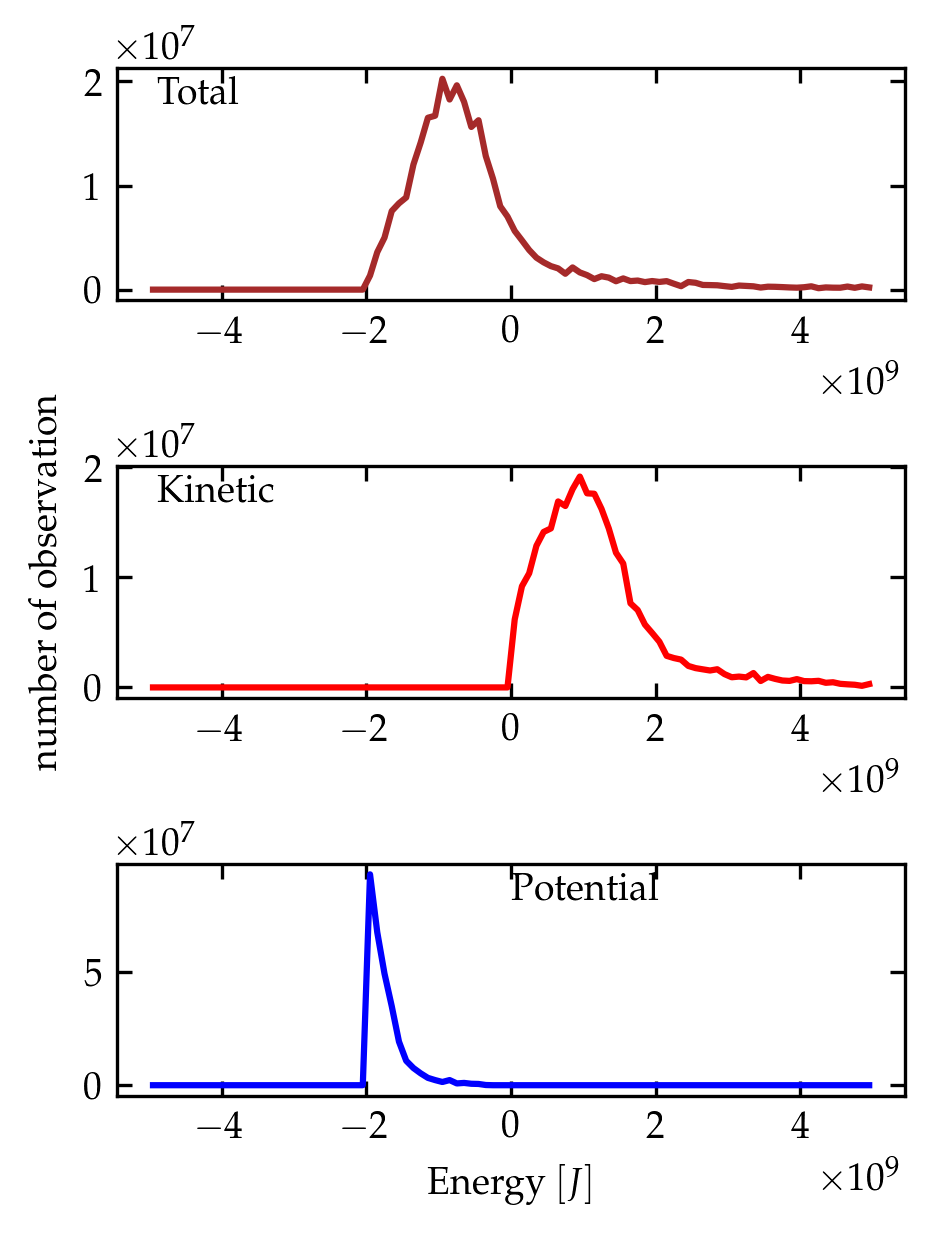

In [77]:
#plot the histogram of energy distribution
bins = 100
rangemaxE = abs(discharged[(discharged.time == time_arr2[-1])]['Etotal'].max())
rangemaxU = abs(discharged[(discharged.time == time_arr2[-1])]['U'].max())
rangemaxK = abs(discharged[(discharged.time == time_arr2[-1])]['K'].max())


# for all discharged gas
#total energy
y, x = np.histogram(discharged[(discharged.time == time_arr2[-1])]['Etotal'], bins=bins, weights=discharged[(discharged.time == time_arr2[-1])]['mass'], range = [-0.5e10, 0.5e10])
# only kinetic
y1, x1 = np.histogram(discharged[(discharged.time == time_arr2[-1])]['K'], bins=bins, weights=discharged[(discharged.time == time_arr2[-1])]['mass'], range = [-0.5e10, 0.5e10])
#only potential
y2, x2 = np.histogram(discharged[(discharged.time == time_arr2[-1])]['U'], bins=bins, weights=discharged[(discharged.time == time_arr2[-1])]['mass'], range = [-0.5e10, 0.5e10])

fig, axes = plt.subplots(3, 1, dpi=300, figsize=(3,4), constrained_layout=True)

bincenters = 0.5*(x[1:] + x[:-1])
axes[0].plot(bincenters, y, label='total', c='brown')
axes[0].annotate('Total', (0.05, 0.96), xycoords='axes fraction', va='top', zorder=1000)

bincenters1 = 0.5*(x1[1:] + x1[:-1])
axes[1].plot(bincenters1, y1, label='Kinetic', c='Red')
axes[1].annotate('Kinetic', (0.05, 0.96), xycoords='axes fraction', va='top', zorder=1000)

bincenters2 = 0.5*(x2[1:] + x2[:-1])
axes[2].plot(bincenters2, y2, label='Potential', c='Blue')
axes[2].annotate('Potential', (0.5, 0.96), xycoords='axes fraction', va='top', zorder=1000)

axes[2].set_xlabel(r'Energy $[J]$')
axes[1].set_ylabel('number of observation')

#ax.tick_params(direction='in',which='both',top=True)
plt.savefig(f'plots/energy_distribution.pdf')

/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


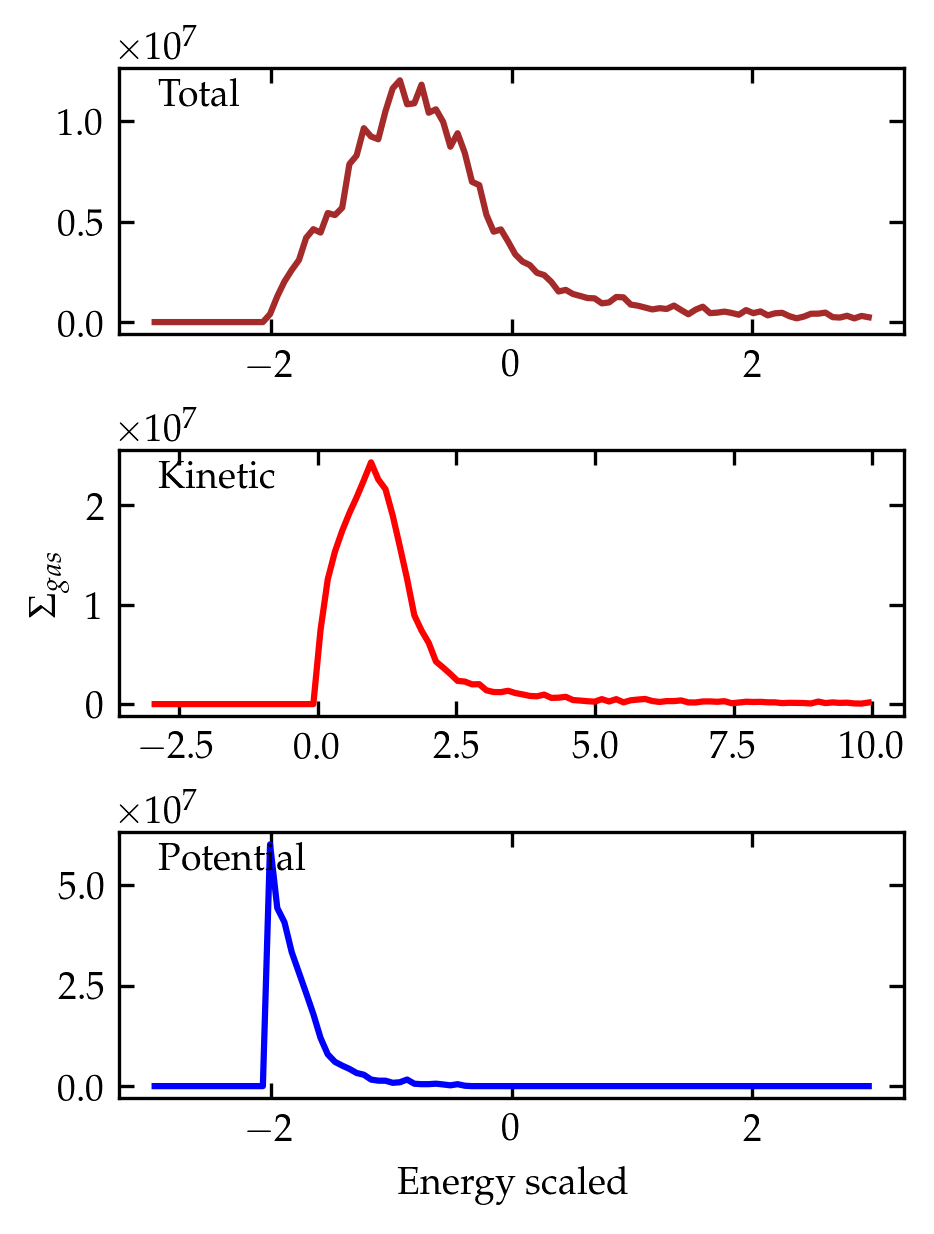

In [83]:
#scaled

#plot the histogram of energy distribution
bins = 100
rangemaxE = abs(discharged[(discharged.time == time_arr2[-1])]['Etotal'].max())
rangemaxU = abs(discharged[(discharged.time == time_arr2[-1])]['U'].max())
rangemaxK = abs(discharged[(discharged.time == time_arr2[-1])]['K'].max())


# for all discharged gas
#total energy
y, x = np.histogram(discharged[(discharged.time == time_arr2[-1])]['Etotalscaled'], bins=bins, weights=discharged[(discharged.time == time_arr2[-1])]['mass'], range = [-3, 3])
y1, x1 = np.histogram(discharged[(discharged.time == time_arr2[-1])]['Kscaled'], bins=bins, weights=discharged[(discharged.time == time_arr2[-1])]['mass'], range = [-3, 10])
#only potential
y2, x2 = np.histogram(discharged[(discharged.time == time_arr2[-1])]['Uscaled'], bins=bins, weights=discharged[(discharged.time == time_arr2[-1])]['mass'], range = [-3, 3])

fig, axes = plt.subplots(3, 1, dpi=300, figsize=(3,4), constrained_layout=True)

bincenters = 0.5*(x[1:] + x[:-1])
axes[0].plot(bincenters, y, label='total', c='brown')
axes[0].annotate('Total', (0.05, 0.96), xycoords='axes fraction', va='top', zorder=1000)

bincenters1 = 0.5*(x1[1:] + x1[:-1])
axes[1].plot(bincenters1, y1, label='Kinetic', c='Red')
axes[1].annotate('Kinetic', (0.05, 0.96), xycoords='axes fraction', va='top', zorder=1000)

bincenters2 = 0.5*(x2[1:] + x2[:-1])
axes[2].plot(bincenters2, y2, label='Potential', c='Blue')
axes[2].annotate('Potential', (0.05, 0.96), xycoords='axes fraction', va='top', zorder=1000)

axes[2].set_xlabel(r'Energy scaled')
axes[1].set_ylabel('$\Sigma_{gas}$')

#ax.tick_params(direction='in',which='both',top=True)
plt.savefig(f'plots/energy_distribution.pdf')

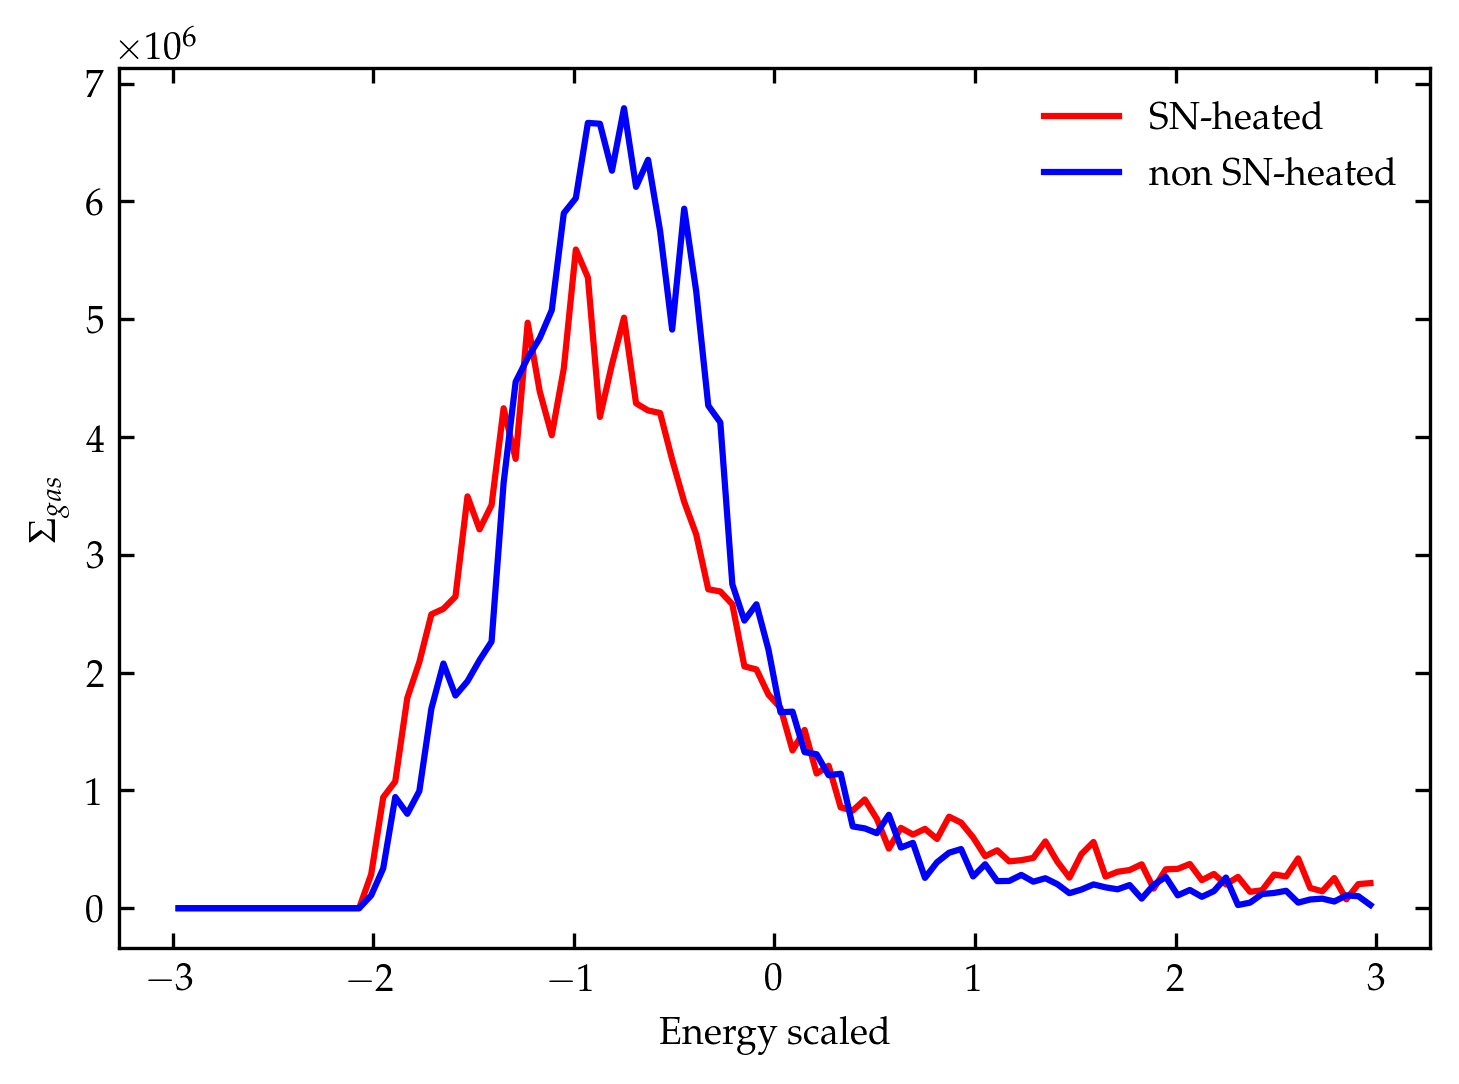

In [84]:
#compare sn-heated and non sn-heated discharged gas energy distributions
heated = discharged[(discharged.time == time_arr2[-1]) & (discharged.snHeated == True)]
nonheated = discharged[(discharged.time == time_arr2[-1]) & (discharged.snHeated == False)]

#plot
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(4.75,3.5), constrained_layout=True)

bins = 100
y1, x1 = np.histogram(heated['Etotalscaled'], bins=bins, weights=heated['mass'], range = [-3, 3])
y2, x2 = np.histogram(nonheated['Etotalscaled'], bins=bins, weights=nonheated['mass'], range = [-3, 3])

bincenters1 = 0.5*(x1[1:] + x1[:-1])
bincenters2 = 0.5*(x2[1:] + x2[:-1])

ax.plot(bincenters1, y1, label='SN-heated', c='red')
ax.plot(bincenters2, y2, label='non SN-heated', c='blue')

ax.set_xlabel(r'Energy scaled')
ax.set_ylabel('$\Sigma_{gas}$')

plt.legend()
#ax.tick_params(direction='in',which='both',top=True)
plt.savefig(f'plots/energy_distribution_sn.pdf')

In [66]:
print(np.max(heated['Etotal'])/1e10)

4.041575332843099


I will do this for all the timesteps now

In [3]:
def read_nfw_info(sim,filepath):

    # read in each timestep sim data, then calculate variables needed for NFW profile based on matched haloid 
    # (which maybe different from z0haloid)
    halo_info = read_timesteps(sim)
    print(f'Found the halo information')

    time_arr = halo_info['t'].unique() # this is looking back, first one is z0
    for time in time_arr:

        #load the sim data
        timestep = time*4096/13.8
        s = pynbody.load(filepath)
        s.physical_units()
        h = s.halos(dummy=True)

        #calculate Msat, Rvir, Rs, and rho0 for NFW profile
        z0haloid_arr = halo_info[np.isclose(halo_info['t'],time,atol = 0.001)]['z0haloid']
        haloid_arr = halo_info[np.isclose(halo_info['t'],time,atol = 0.001)]['haloid']
        for z0haloid, haloid in zip(z0haloid_arr,haloid_arr):
            Msat = h[haloid].properties['mass']*(1.98847*10**30) # satellite mass in units of kg
            Rvir = (h[haloid].properties['Rvir']/s.properties['h'])*(3.08568*10**19) # Virial Radius and center coordinates, in units of m
            conct = h[haloid].properties['cNFW'] # concentration parameter
            Rs = Rvir/conct # scale radius
            rho0 = (Msat/(4*np.pi*Rs**3))*(1/(np.log(1+conct)-conct/(1+conct))) #density 0
            #print(z0haloid, haloid, rho0)

            # save the outputs
            halo_info.loc[(halo_info.t == time) & (halo_info.z0haloid == z0haloid), 'Rvir_in_m'] = Rvir
            halo_info.loc[(halo_info.t == time) & (halo_info.z0haloid == z0haloid), 'Msat_in_kg'] = Msat
            halo_info.loc[(halo_info.t == time) & (halo_info.z0haloid == z0haloid), 'conct'] = conct
            halo_info.loc[(halo_info.t == time) & (halo_info.z0haloid == z0haloid), 'Rs'] = Rs
            halo_info.loc[(halo_info.t == time) & (halo_info.z0haloid == z0haloid), 'rho0'] = rho0
            
    print(f'> Returning <NFW outputs> for {sim} <')
            
    return halo_info

In [4]:
def calc_discharged_energy(key, discharged, halo_info):
    # this will read discharged tracked gas particles dataset and 
    # calculate energy at each particle at each timestep
    
    sim = str(key[:4])
    haloid = int(key[5:])

    time_arr2 = np.unique(discharged.time)
    #question for future am i double counting?
    #for each timstep, for each gas particle, calculate the energy
    for time in tqdm.tqdm(time_arr2):
        #filter out the discharged data set at each timestep
        discharged_last = discharged[np.isclose(discharged.time,time,atol=0.001)]
        #find the right snapshot from halo_info
        right_snapshot = halo_info[np.isclose(halo_info.t, time, atol=0.001) & (halo_info.z0haloid == haloid)]
        #print(time, right_snapshot.Rs)

        #define local variable names
        Rs = float(right_snapshot.Rs)
        rho0 = float(right_snapshot.rho0)
        #print(Rs)

        #iterate thru each particle
        pids = np.unique(discharged_last['pid'])
        for pid in pids:
            #filter out the discharged data set for each particle
            dat = discharged_last[discharged_last.pid == pid]

            #calculate the energy in terms of distance away, velocity, and mass of particle
            Rmax = float(dat.r*(3.08568*10**19)) #in units of m

            vel = float(dat.v*1000) #in units of m/s
            gmass = float(dat.mass*(1.98847*10**30)) #in units of kg

            #hopefully this should be the same as halo_info.Rvir_in_m
            satRvir = dat.satRvir*(3.08568*10**19) #in units of m

            # mass enclosed, in units of physical units
            Menc = 4*np.pi*rho0*Rs**3*(np.log((Rs+Rmax)/Rs) - Rmax/(Rs+Rmax))
            #print(Menc)

            # total energy at discharging event, kinetic, and potential
            Etotal = (-G*Menc/Rmax + (1/2)*vel**2) #*gmass
            K = (1/2)*vel**2 #*gmass
            U = (-G*Menc/Rmax) #*gmass
            #print(Etotal)
            
            #scaling factor
            eScaleFactor = (G*float(right_snapshot.mass)*(1.98847*10**30))/(float(right_snapshot.Rvir)*(3.08568*10**19))

            #append those to discharged data
            discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'Etotal'] = Etotal
            discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'K'] = K
            discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'U'] = U
            
            discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'Etotalscaled'] = Etotal/eScaleFactor
            discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'Kscaled'] = K/eScaleFactor
            discharged.loc[(discharged.time == time) & (discharged.pid == pid), 'Uscaled'] = U/eScaleFactor
    
    print(f'> Returning <energy results> for {key} <')
    
    return discharged

In [5]:
# quick calc. for ubiquitous weights in plotting.
@pynbody.derived_array
def wt(*gas):
    if len(gas) == 1:
        return np.array(gas[0]['mass'] / gas[0]['mass'].sum())
    
    else:
        return np.array(gas[0]['mass'] / gas[1]['mass'].sum())

100%|███████████████████████████████████████████| 20/20 [13:50<00:00, 41.50s/it]


> Returning <energy results> for h148_10 <


/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


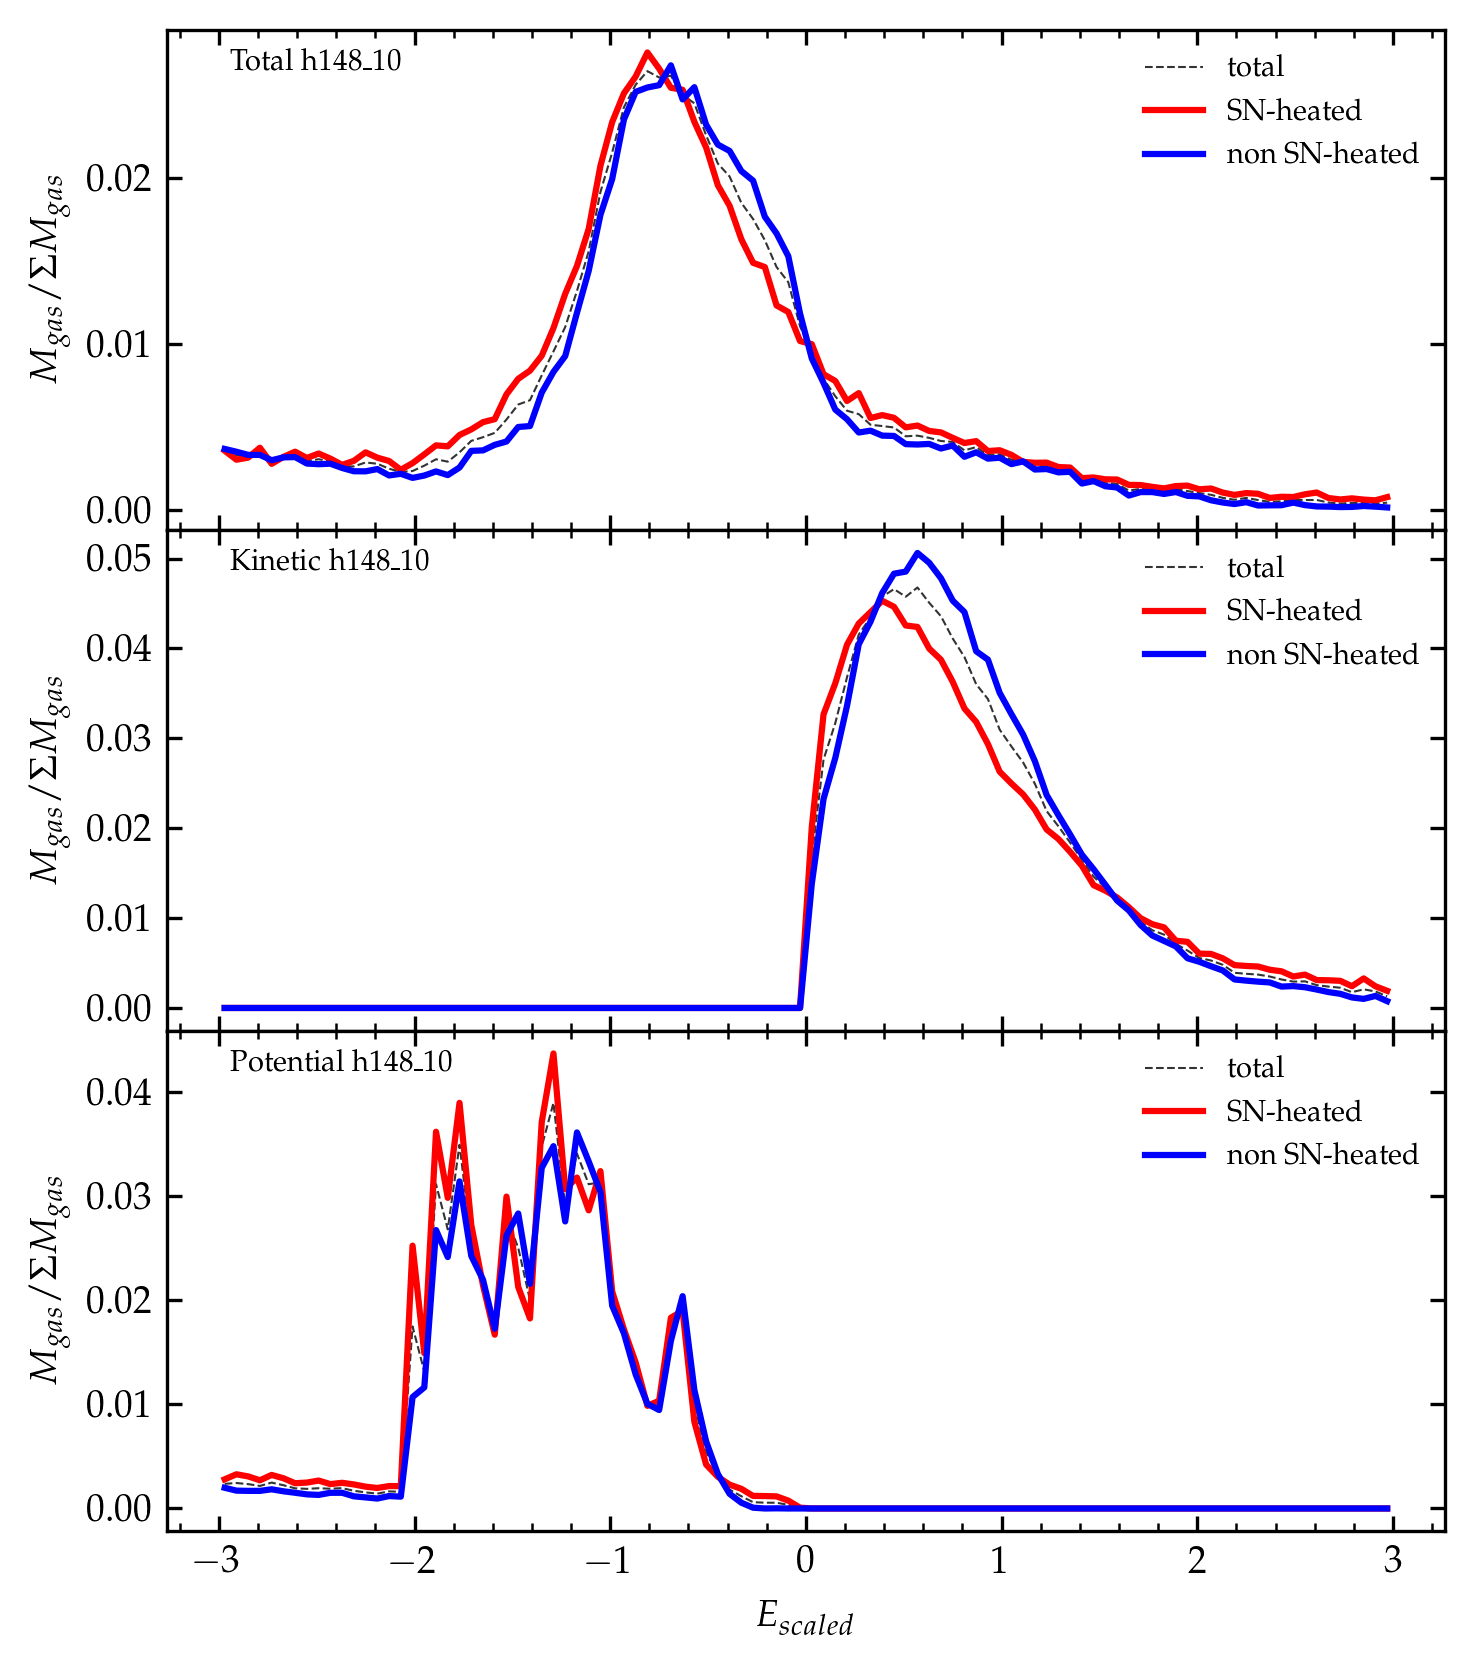

100%|███████████████████████████████████████████| 18/18 [00:37<00:00,  2.06s/it]
/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')


> Returning <energy results> for h148_12 <


/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


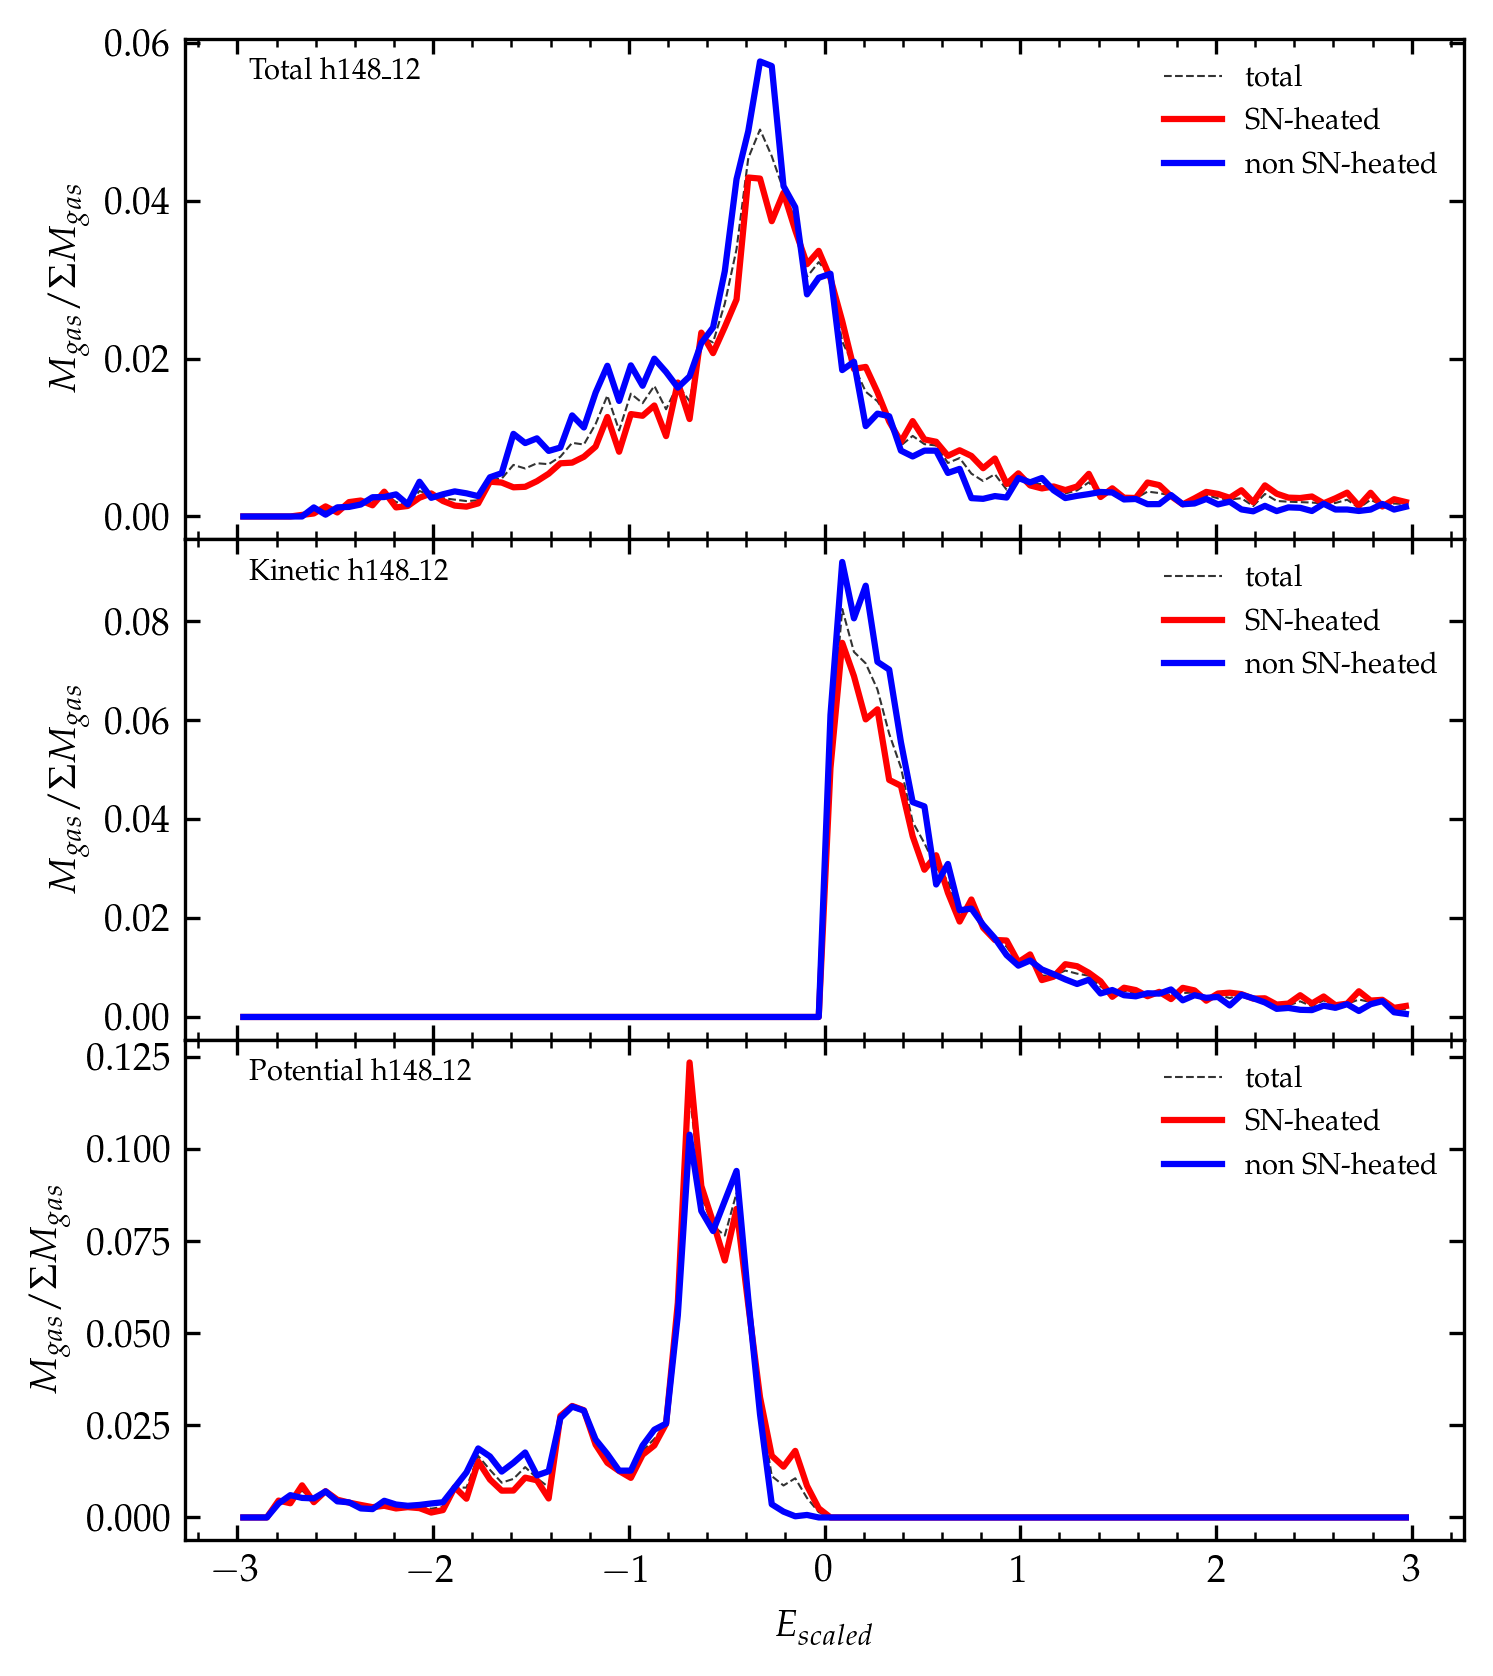

100%|███████████████████████████████████████████| 10/10 [00:27<00:00,  2.72s/it]
/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')


> Returning <energy results> for h148_249 <


/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


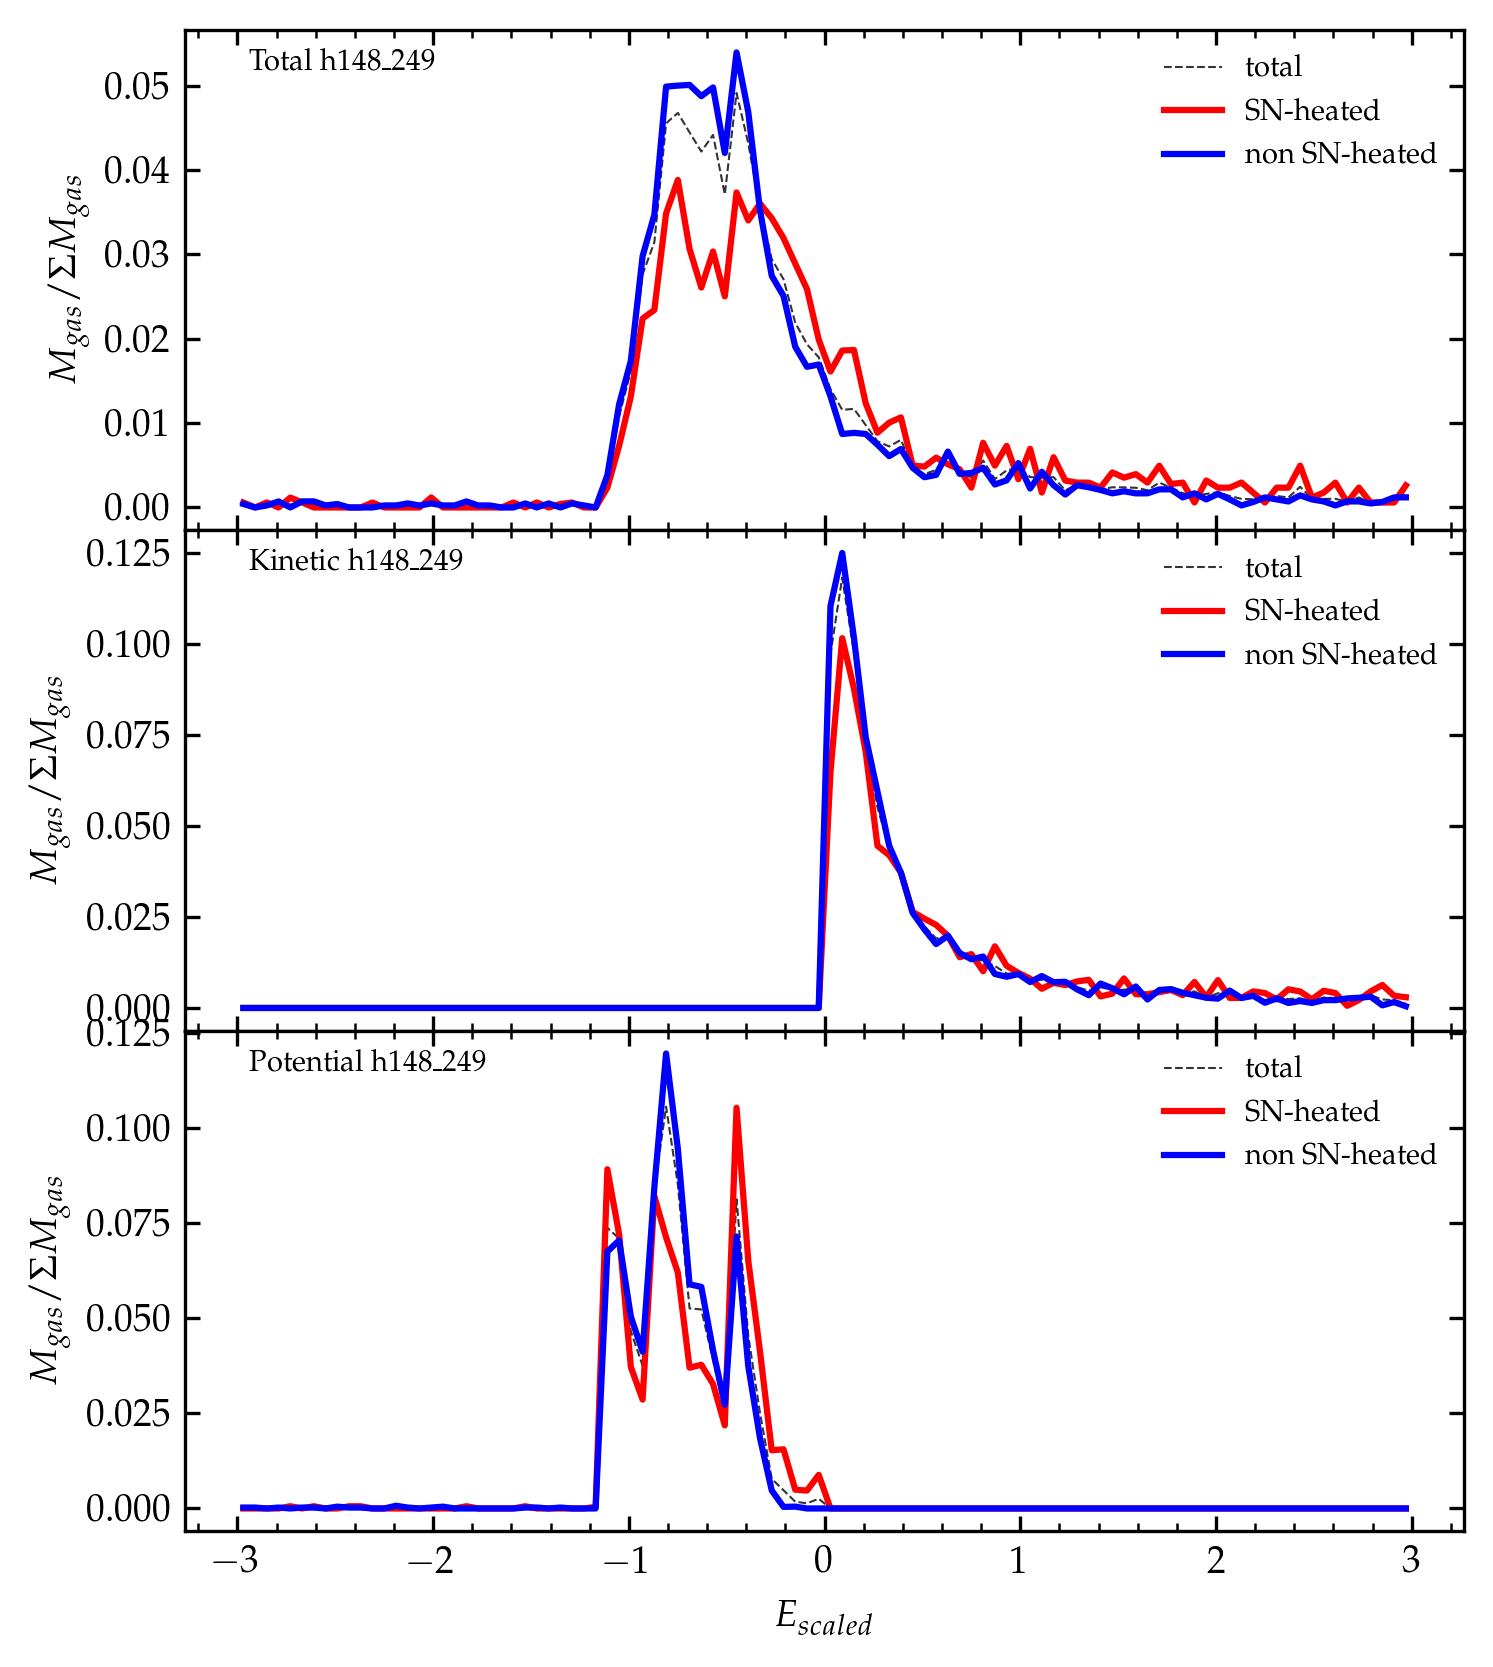

100%|█████████████████████████████████████████████| 6/6 [00:18<00:00,  3.07s/it]
/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')


> Returning <energy results> for h148_251 <


/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


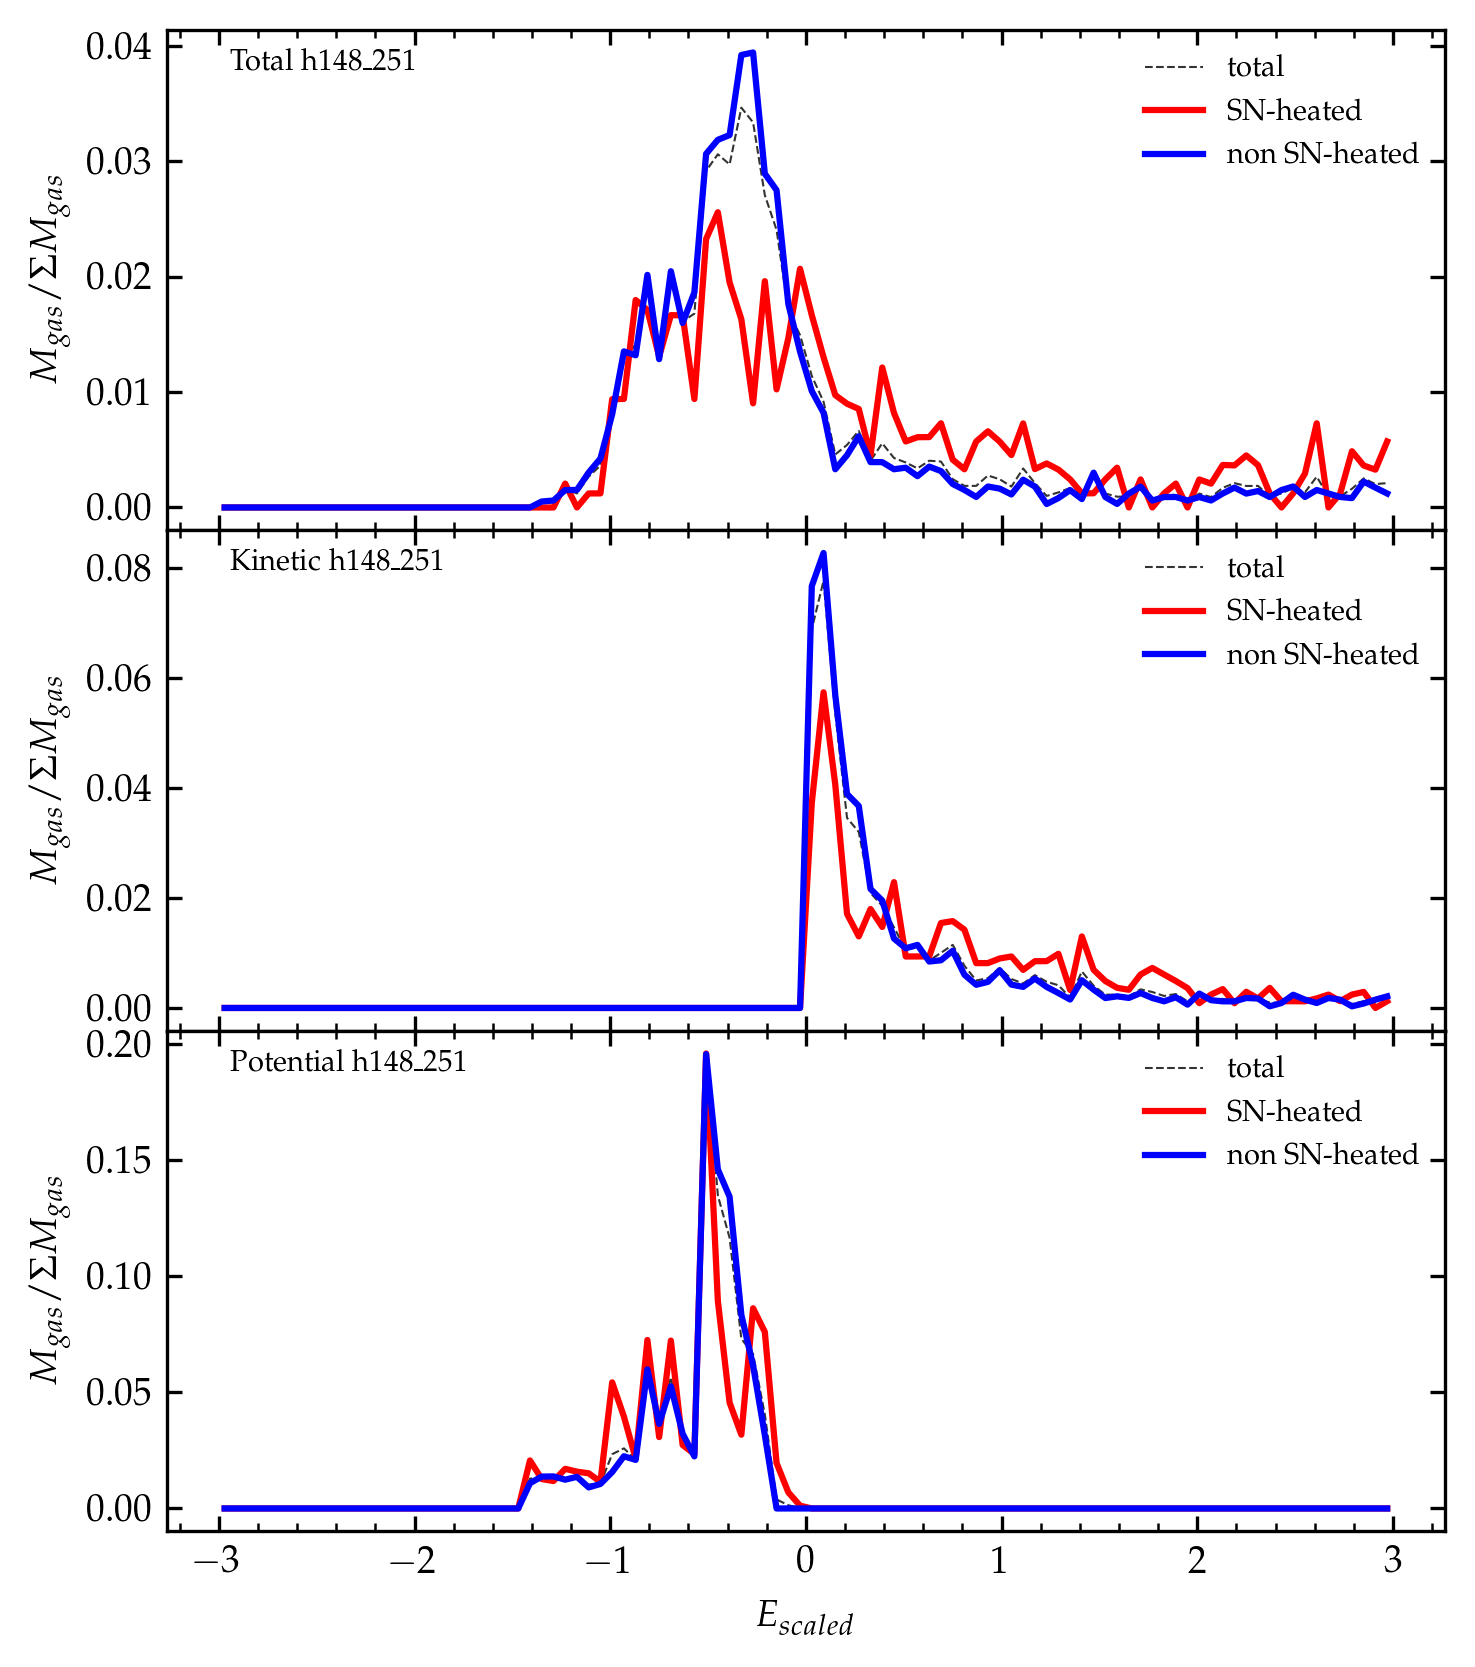

100%|███████████████████████████████████████████| 23/23 [05:16<00:00, 13.75s/it]
/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')


> Returning <energy results> for h148_27 <


/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


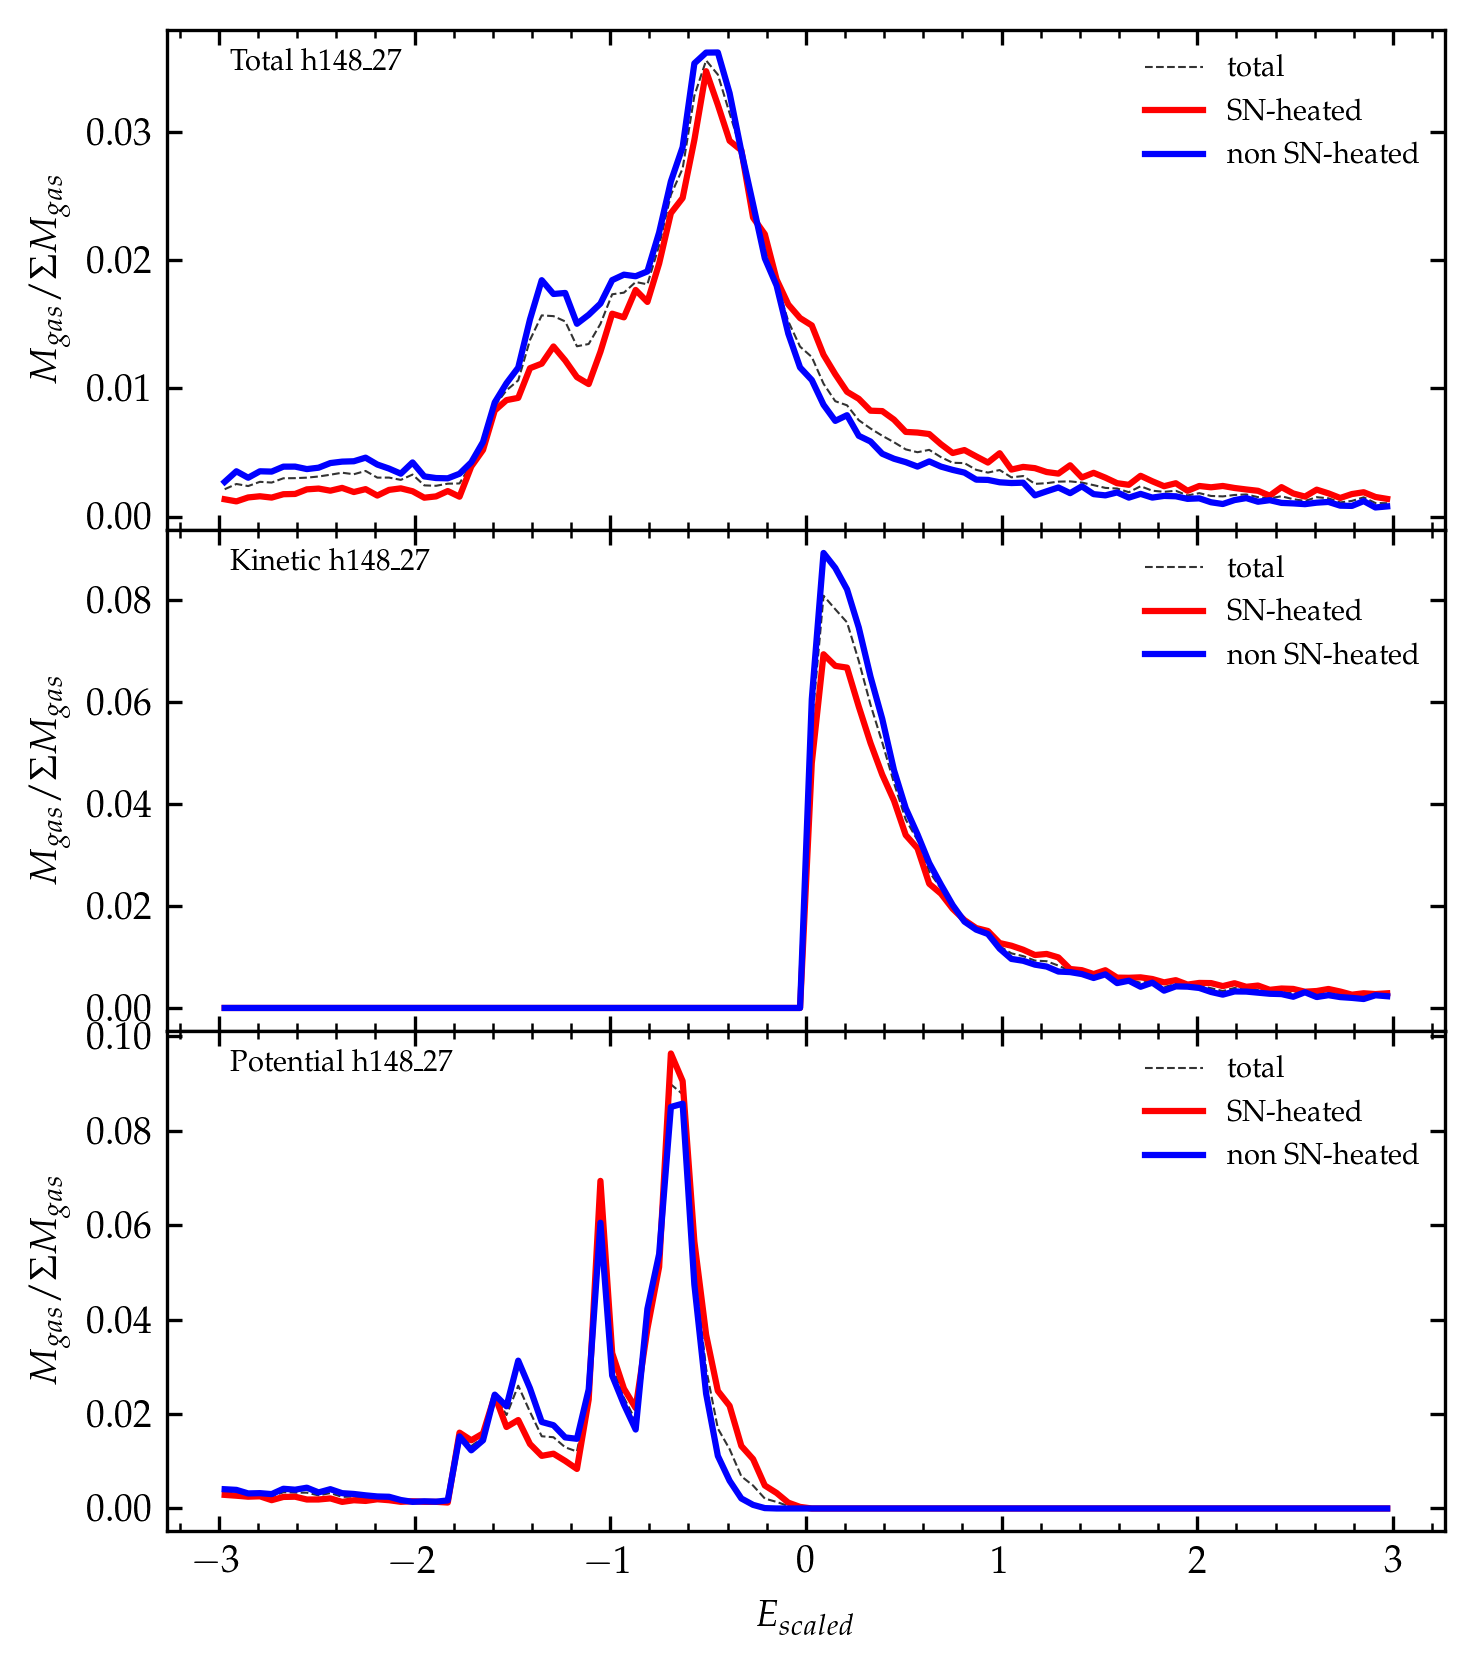

100%|█████████████████████████████████████████████| 5/5 [00:18<00:00,  3.67s/it]
/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')


> Returning <energy results> for h148_282 <


/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


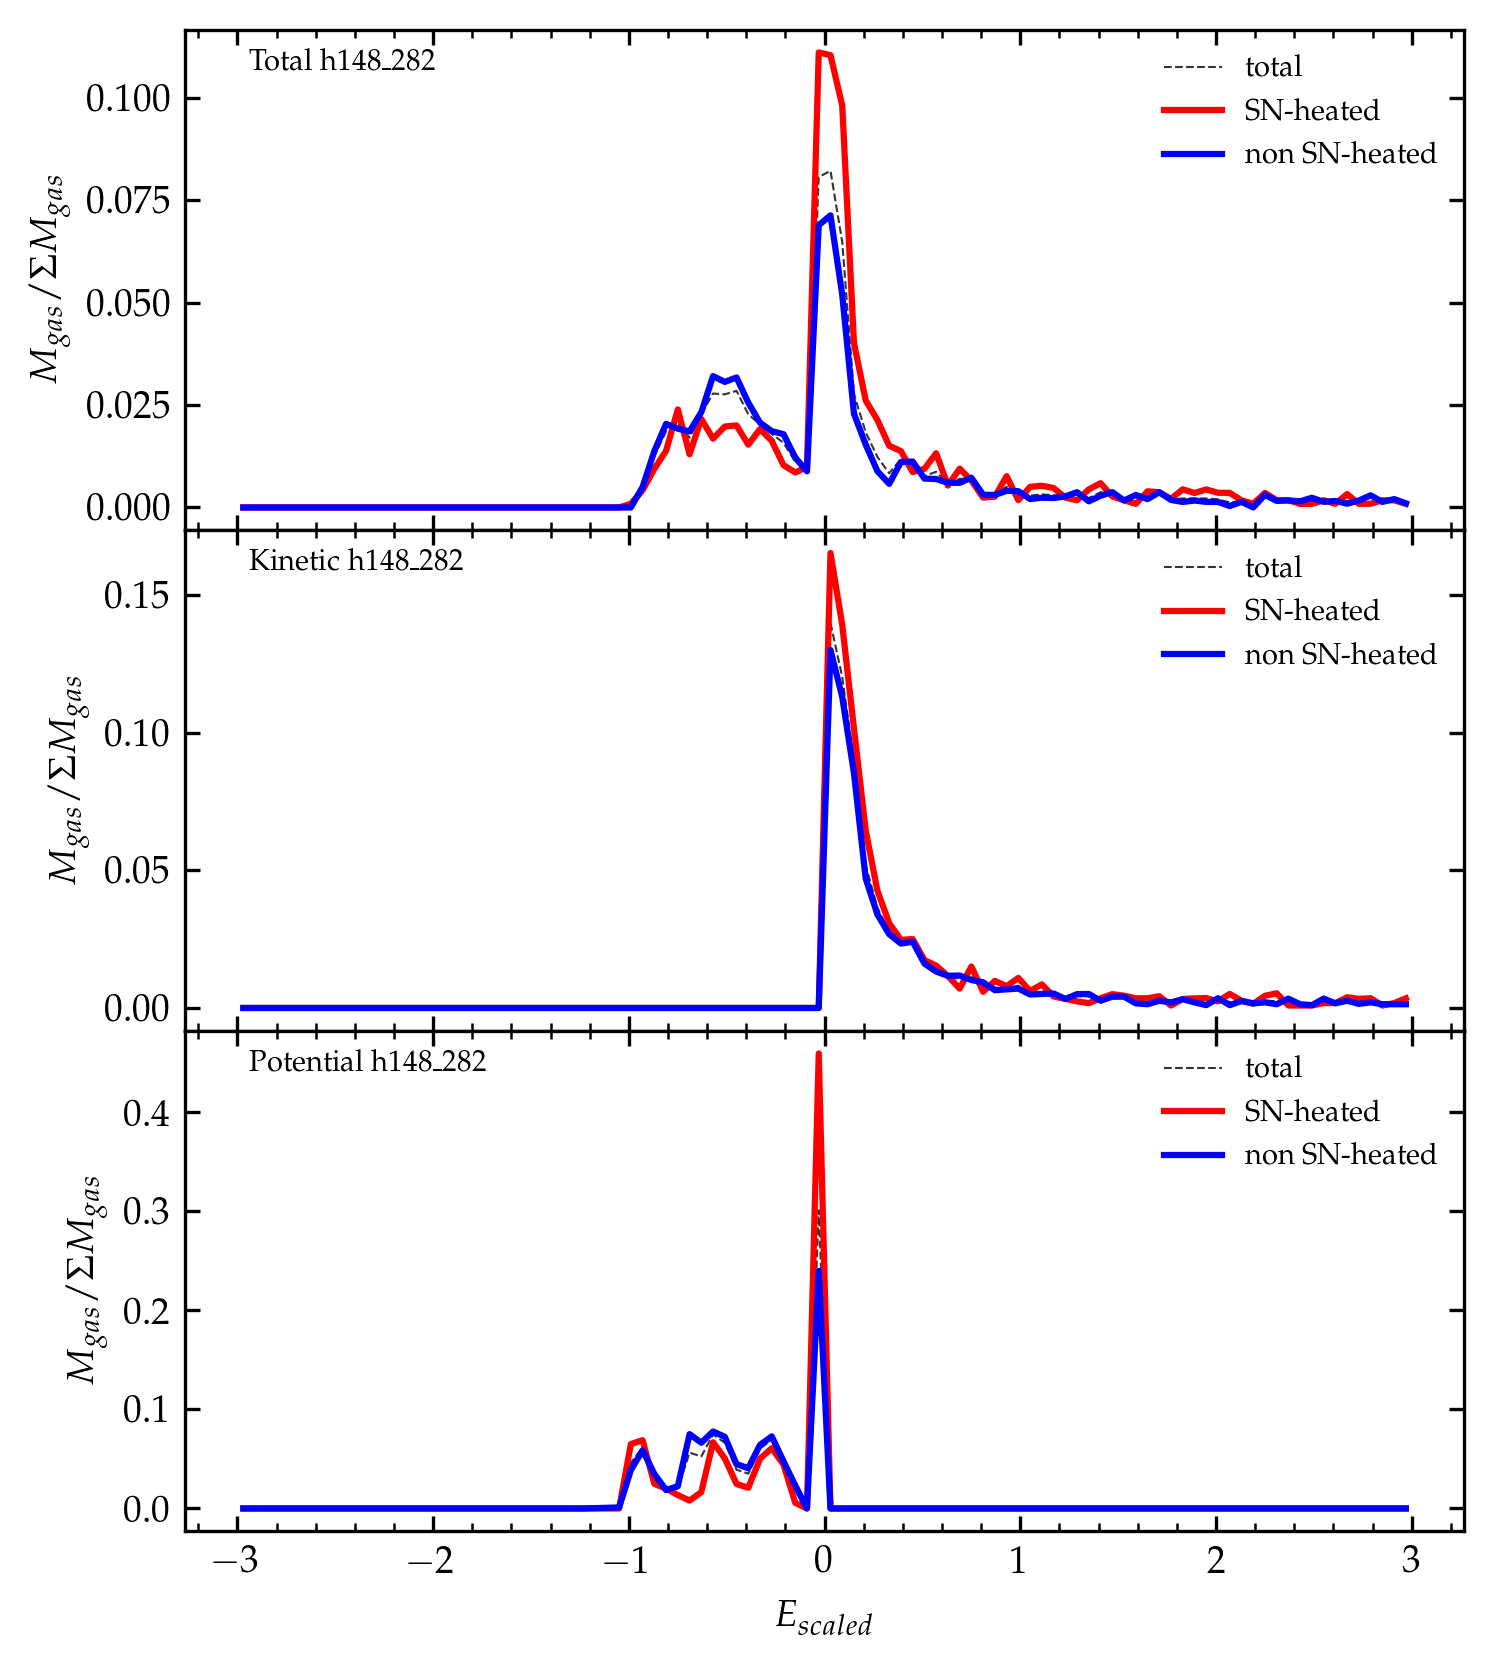

100%|████████████████████████████████████████| 16/16 [1:07:58<00:00, 254.91s/it]


> Returning <energy results> for h148_3 <


/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


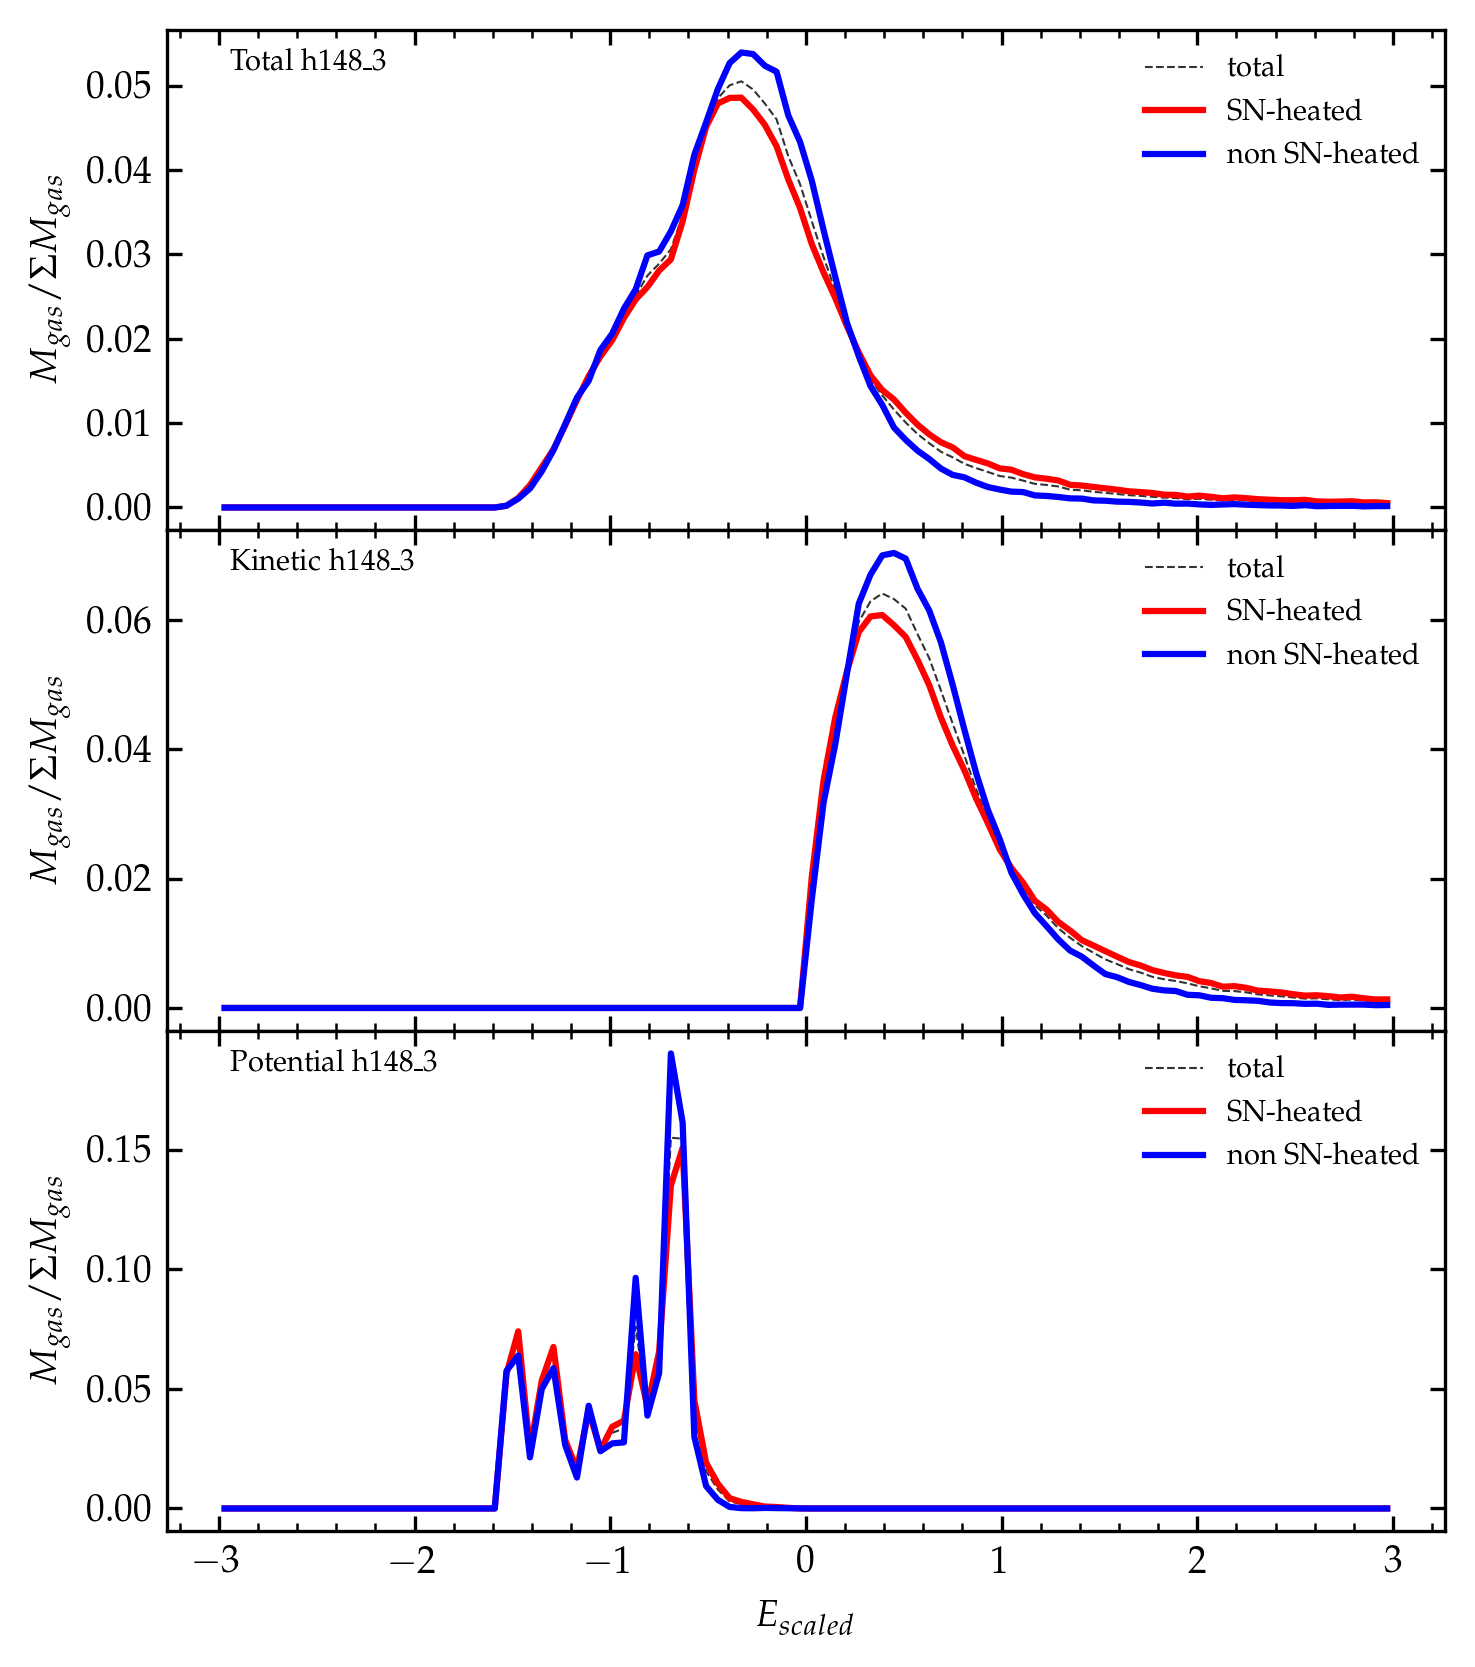

100%|███████████████████████████████████████████| 16/16 [00:54<00:00,  3.40s/it]


> Returning <energy results> for h148_34 <


/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


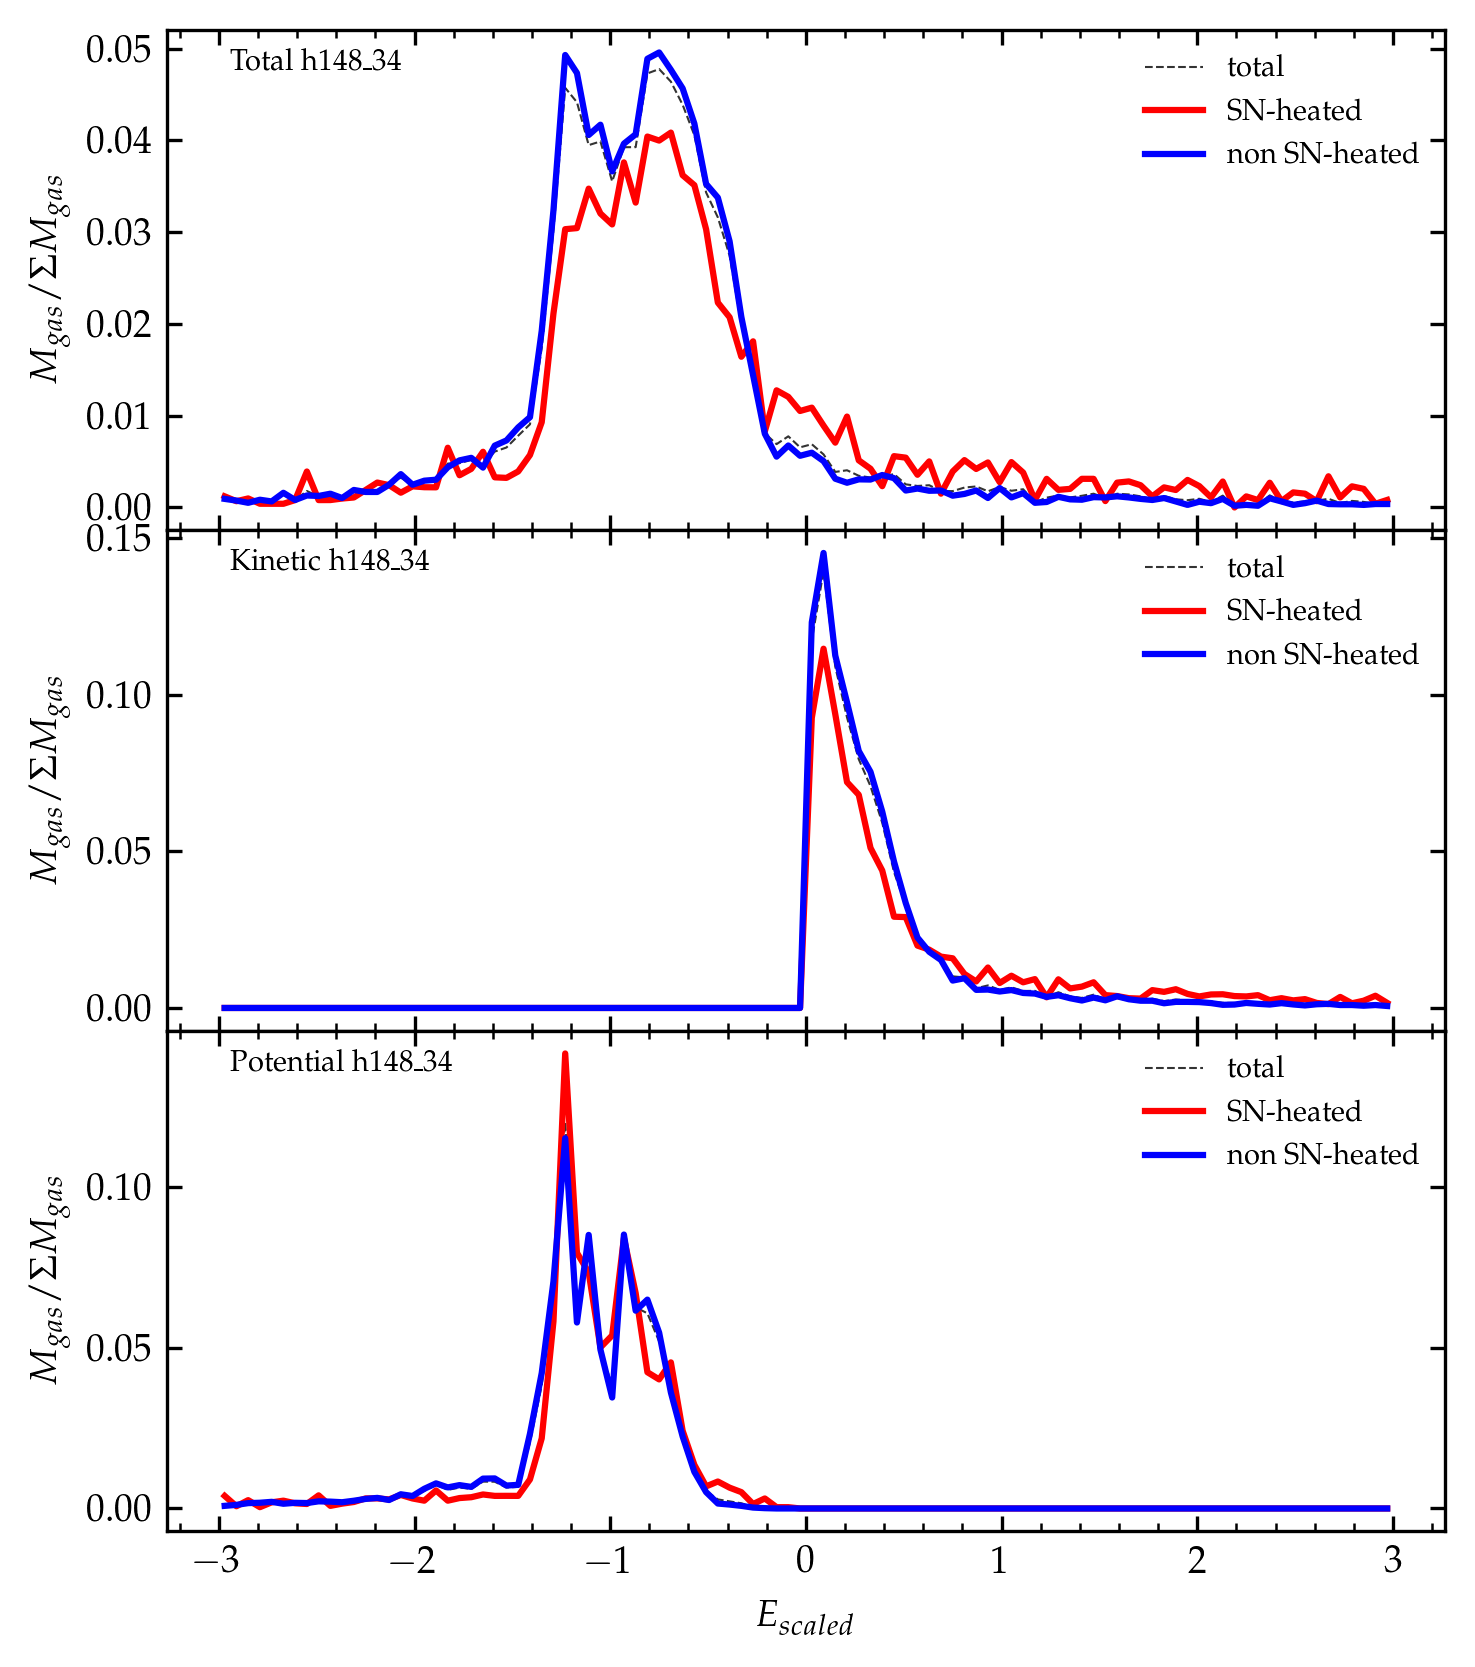

100%|███████████████████████████████████████████| 18/18 [00:49<00:00,  2.78s/it]


> Returning <energy results> for h148_38 <


/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


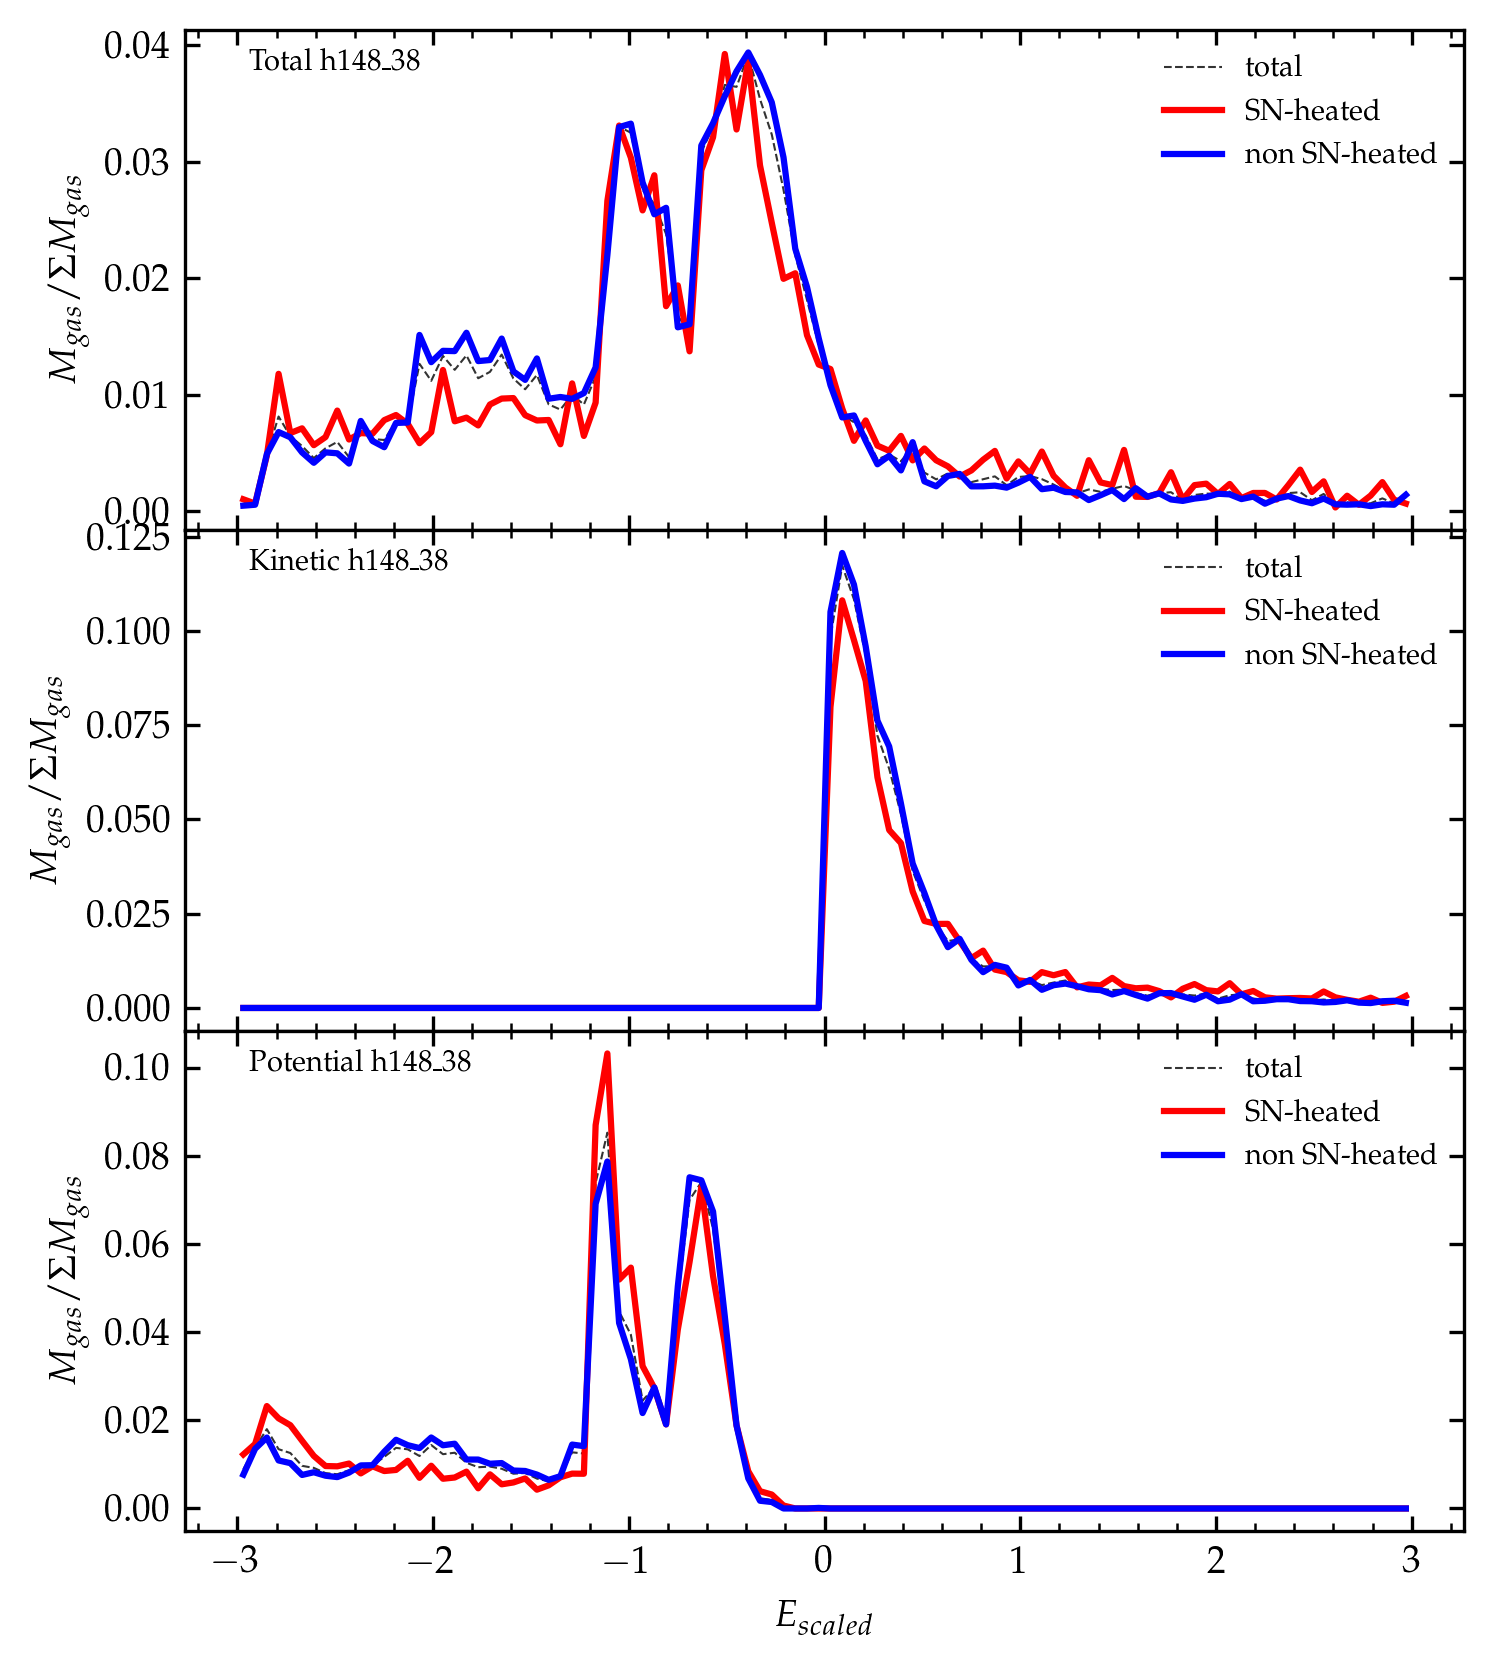

100%|███████████████████████████████████████████| 14/14 [13:13<00:00, 56.67s/it]


> Returning <energy results> for h148_4 <


/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


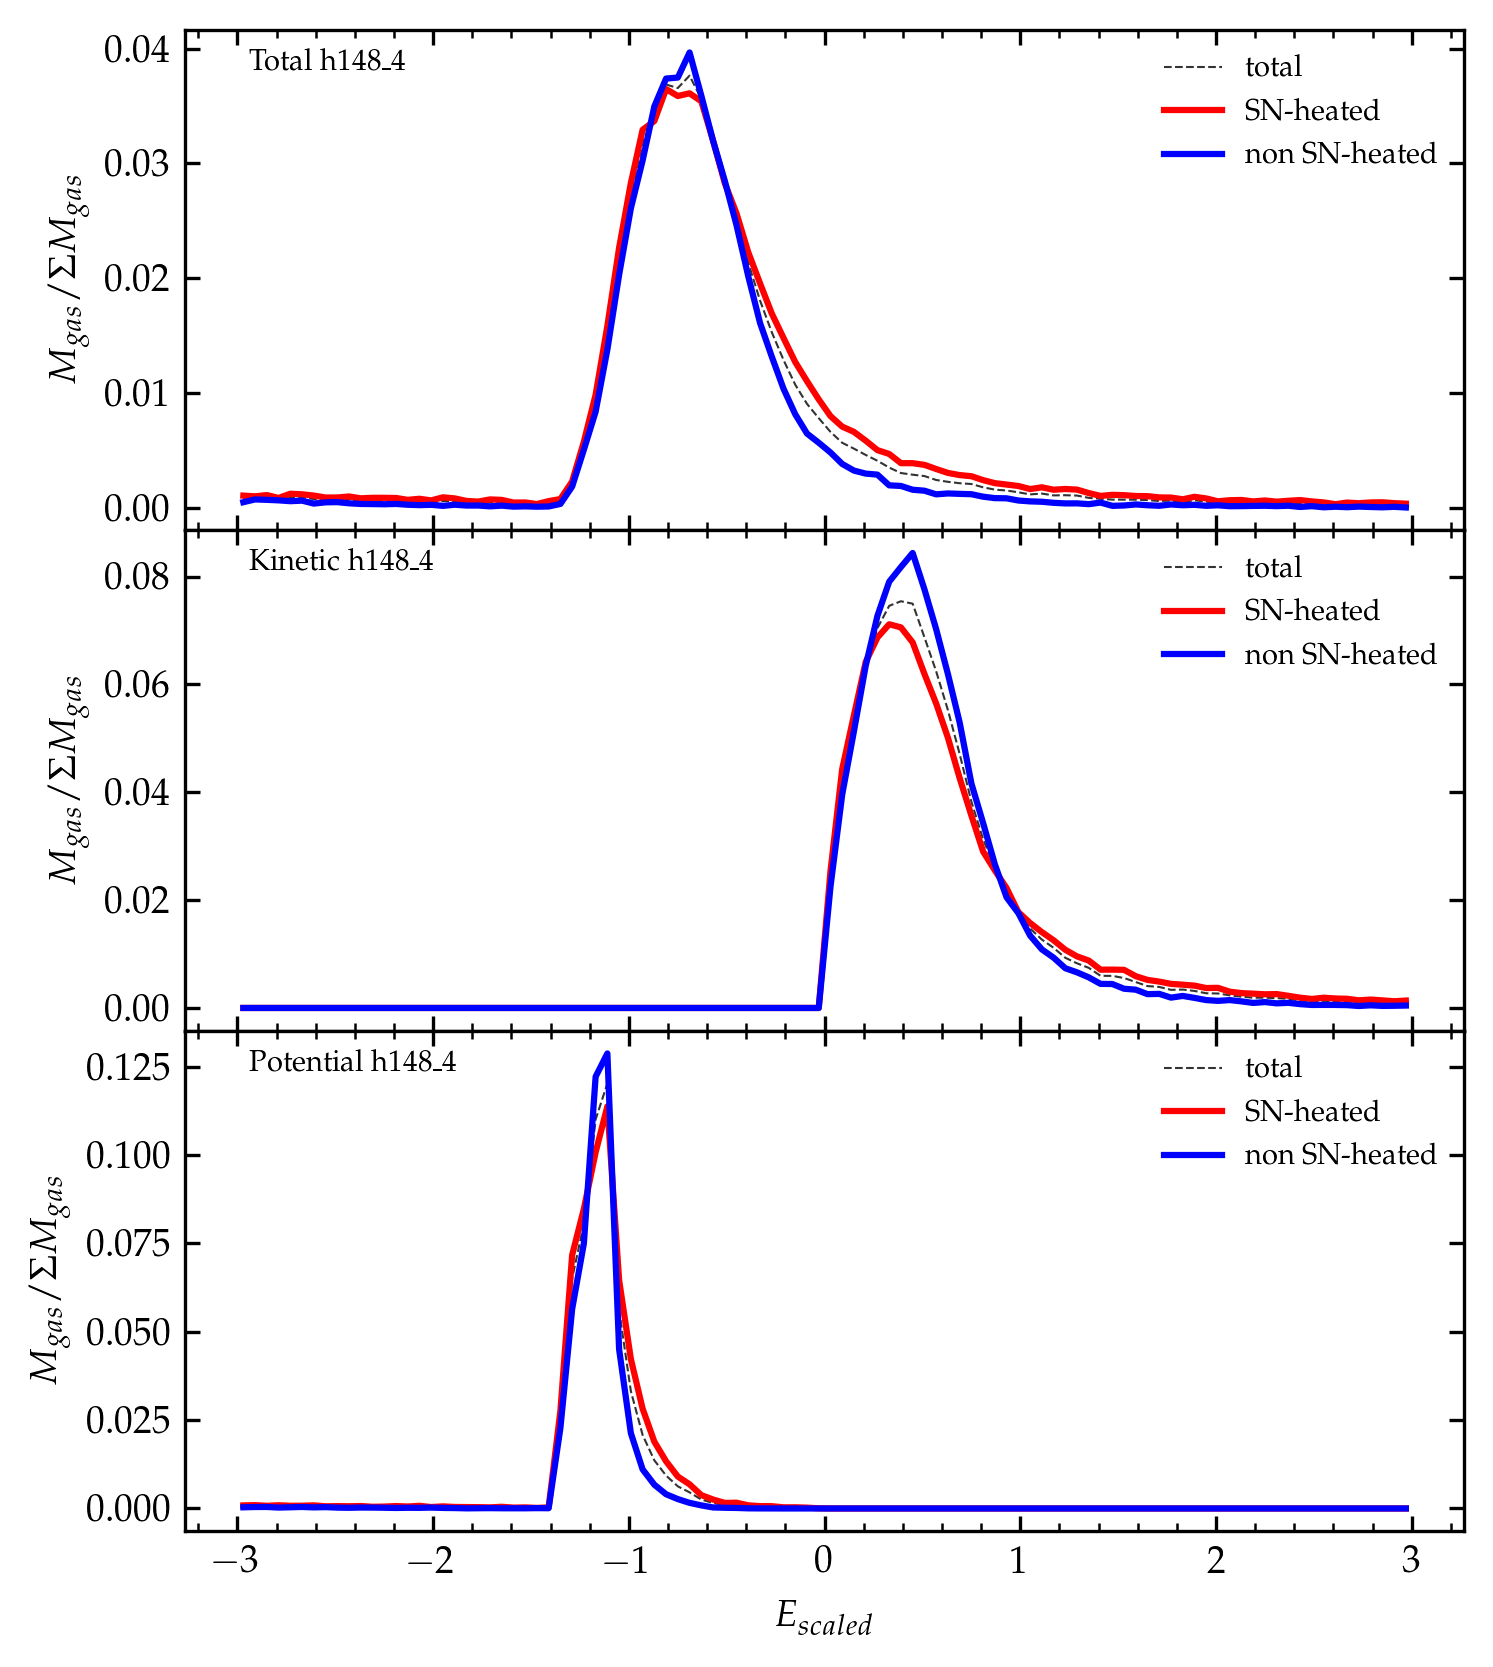

100%|███████████████████████████████████████████| 18/18 [00:51<00:00,  2.87s/it]


> Returning <energy results> for h148_55 <


/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


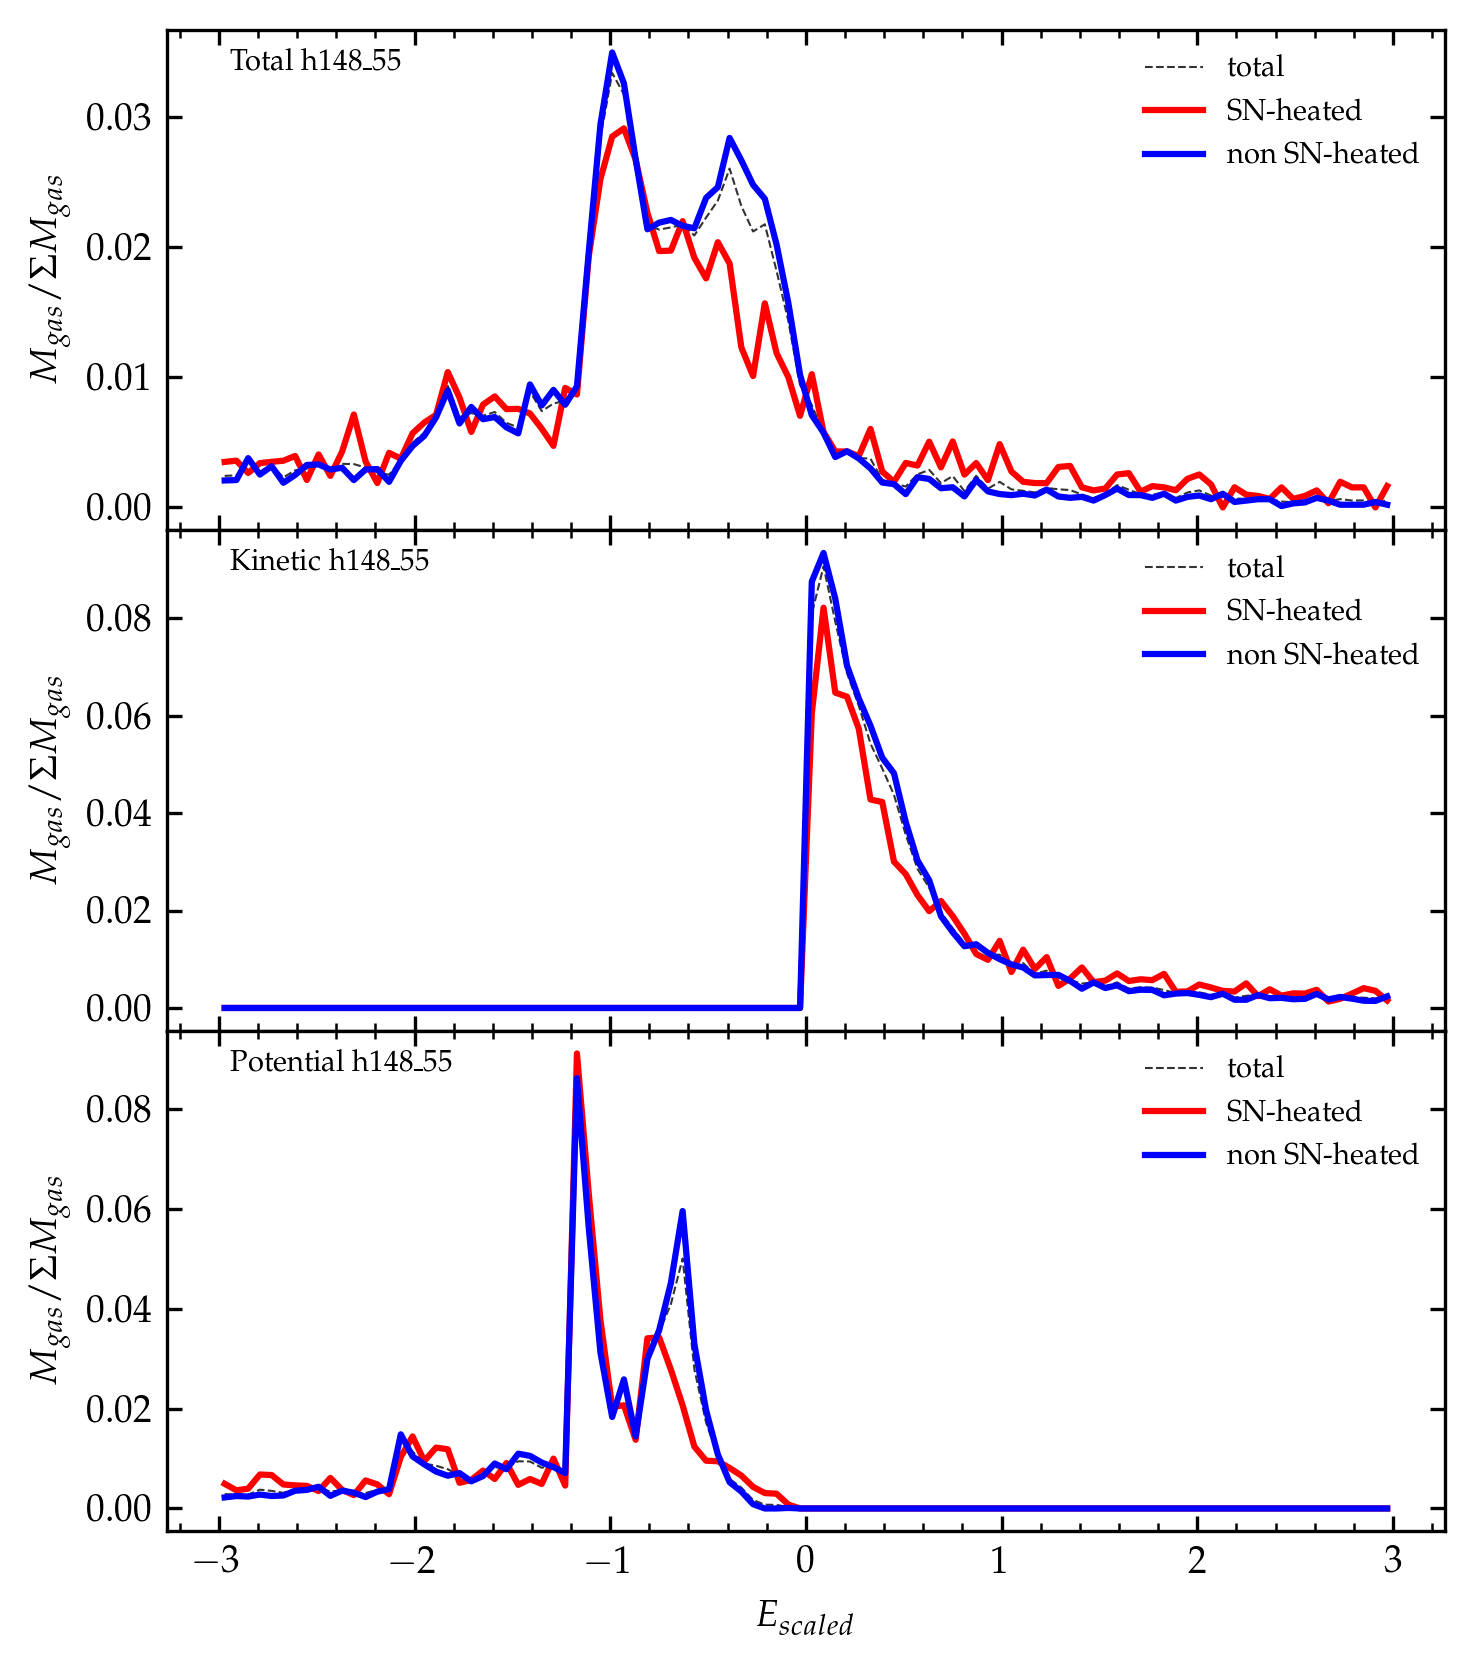

100%|███████████████████████████████████████████| 12/12 [10:14<00:00, 51.22s/it]


> Returning <energy results> for h148_6 <


/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


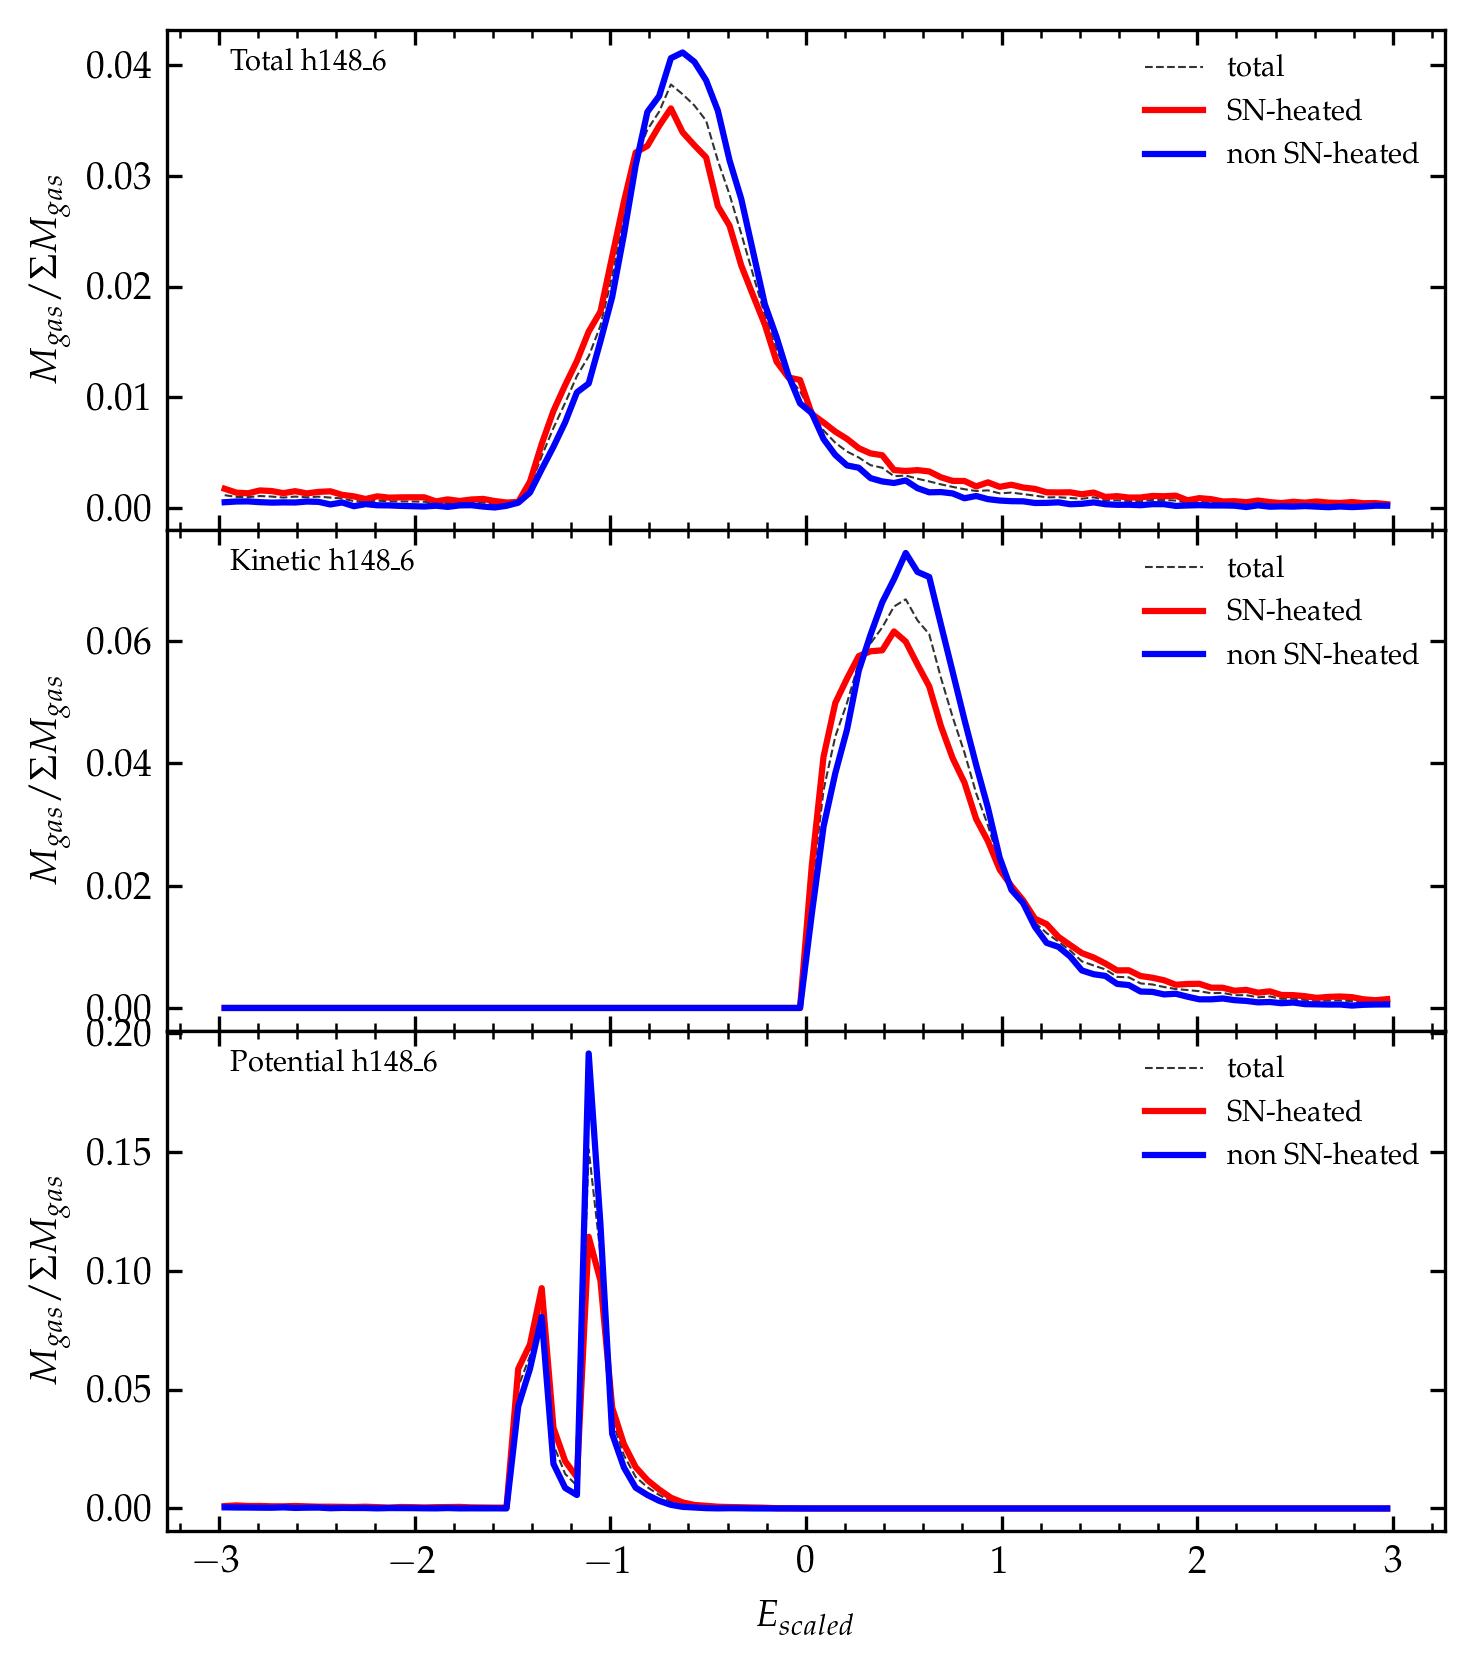

100%|█████████████████████████████████████████████| 7/7 [00:21<00:00,  3.14s/it]


> Returning <energy results> for h148_65 <


/tmp/ipykernel_55244/2718841007.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{key}_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


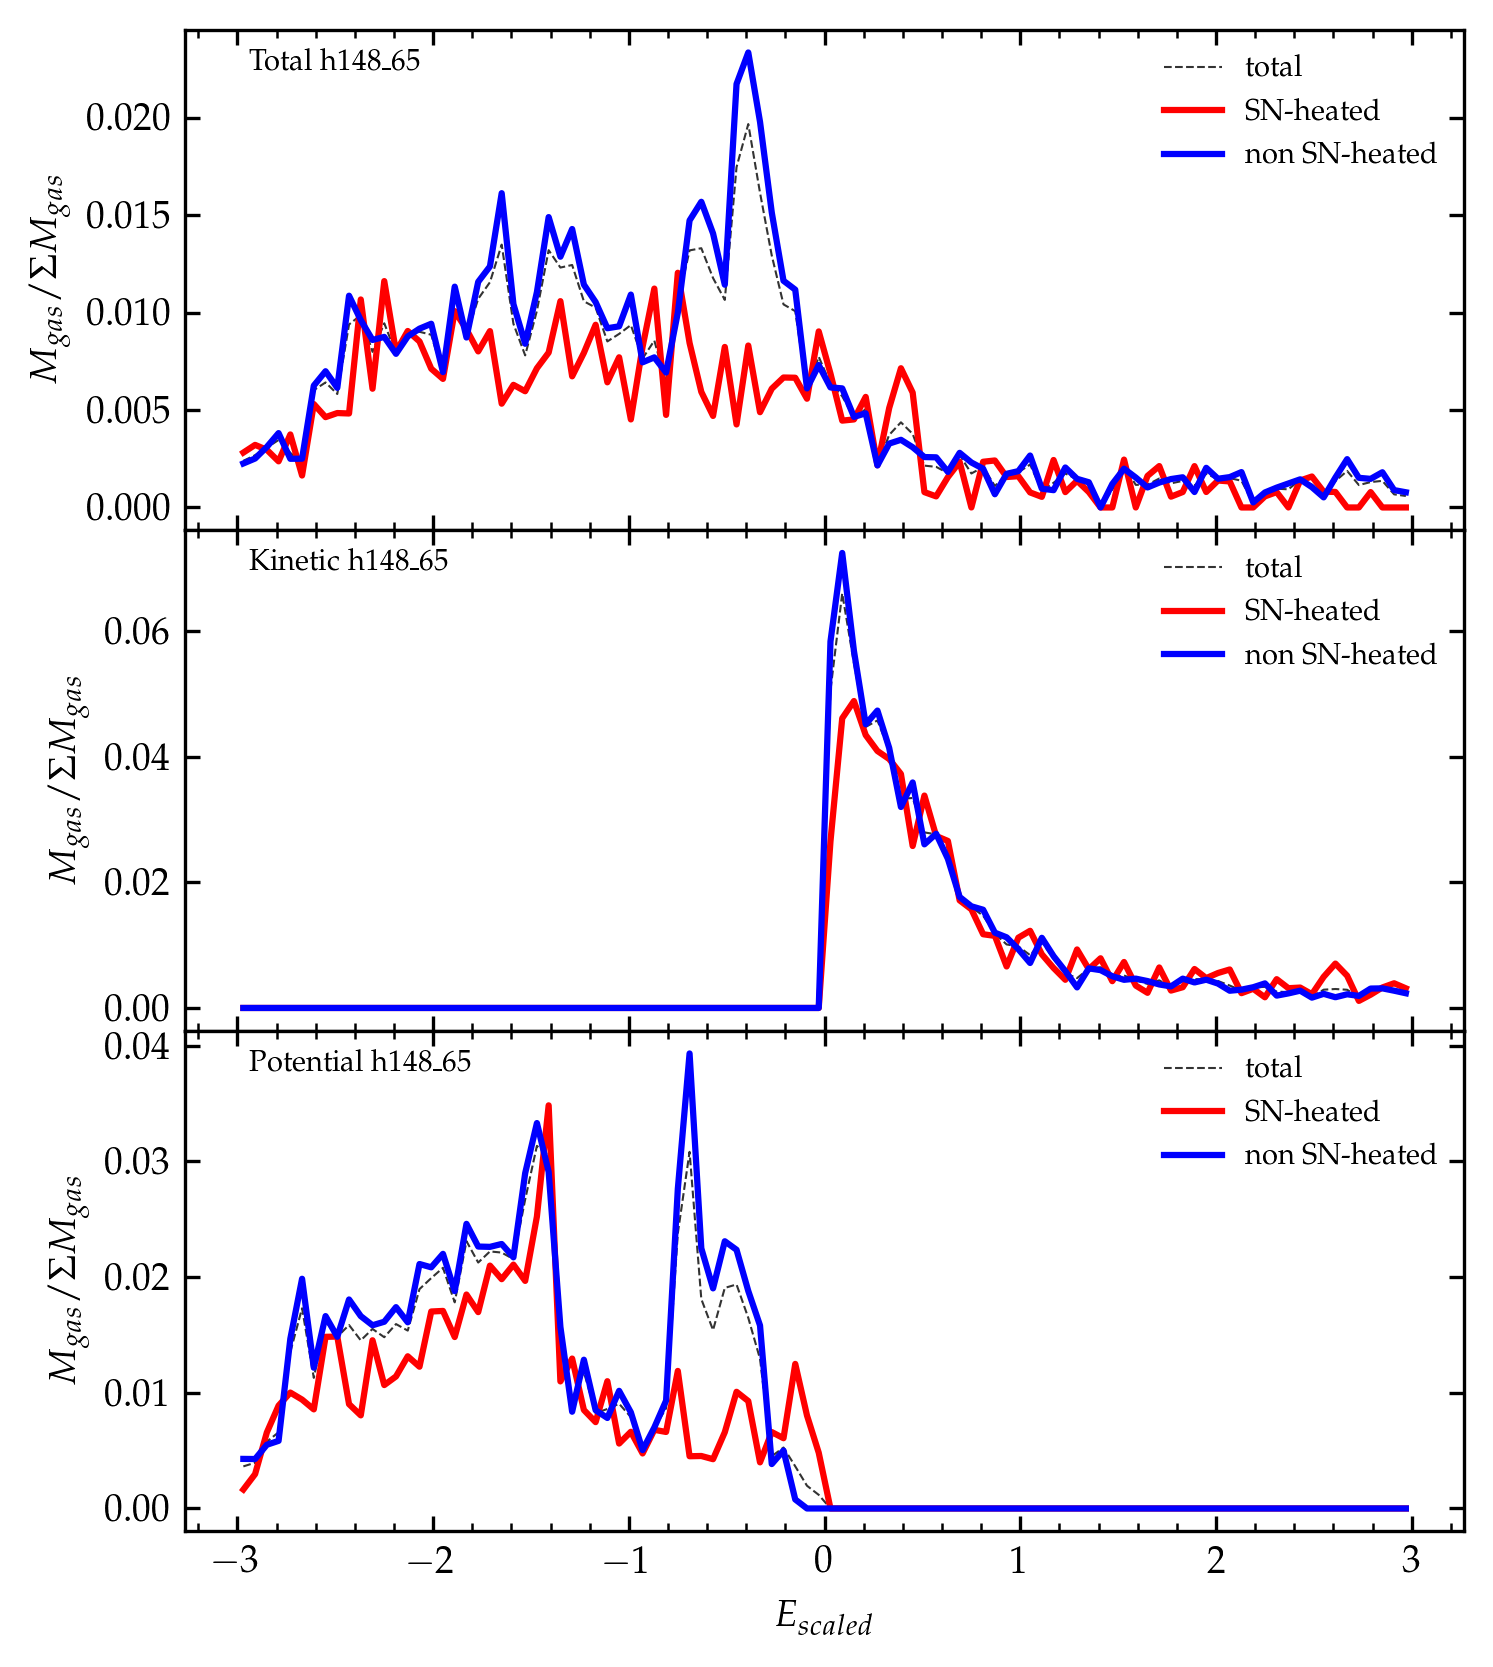

/tmp/ipykernel_55244/2718841007.py:146: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig('plots/h148_all_energy_distribution.pdf')


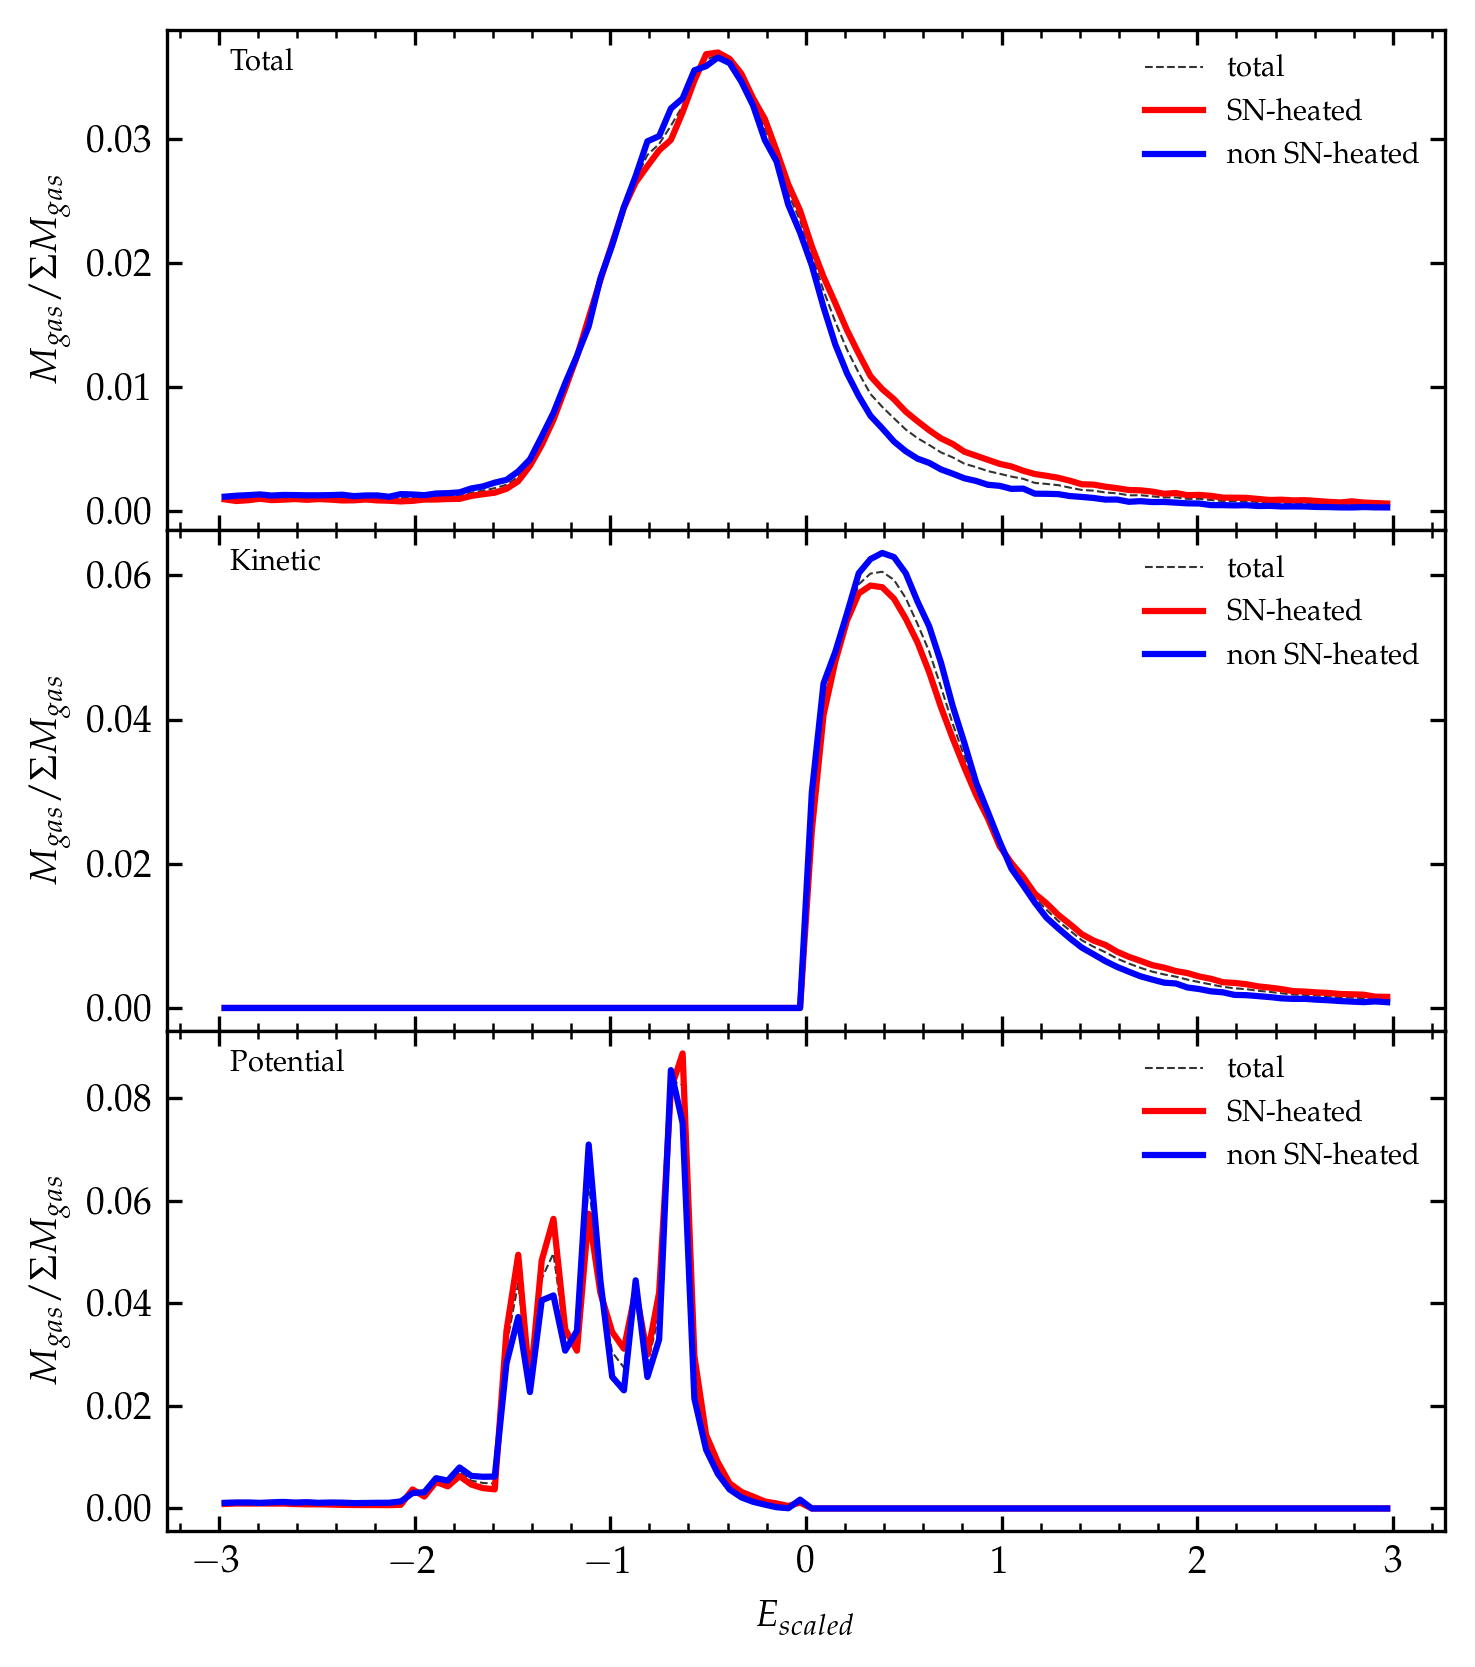

In [32]:
import tqdm
#run thru all h148 
keys = ['h148_10', 'h148_12', 'h148_249', 'h148_251', 'h148_27', 'h148_282', 'h148_3', 'h148_34', 'h148_38', 'h148_4', 'h148_55',
        'h148_6', 'h148_65']

#skip this process because I already have
#halo_info_h148 = read_nfw_info('h148',filenames['h148'])
path = f'{rootPath}SNe-heated_Gas_Flow/SNeData/discharged_particles.hdf5'
discharged_concat,heated_concat,nonheated_concat = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

for key in keys:
    
    #find discharged gas particle and calculate its energy
    discharged_h148 = pd.read_hdf(path, key=key)
    discharged_h148_calc = calc_discharged_energy(key, discharged_h148, halo_info_h148)
    #classify by SN-heated status
    heated = discharged_h148_calc[discharged_h148_calc.snHeated == True]
    nonheated = discharged_h148_calc[discharged_h148_calc.snHeated == False]

    #Data frame concat for plotting all
    discharged_concat = pd.concat([discharged_concat, discharged_h148_calc])
    heated_concat = pd.concat([heated_concat, heated])
    nonheated_concat = pd.concat([nonheated_concat, nonheated])
    
    
    ### plot the histogram of normalized energy distribution, total, kinetic, potential, scaled
    bins = 100

    # for all discharged gas, SN_heated gas, and non SN_heated gas
    #total energy
    yt, xt = np.histogram(discharged_h148_calc['Etotalscaled'], bins=bins, weights = wt(discharged_h148_calc), range = [-3, 3])
    yh, xh = np.histogram(heated['Etotalscaled'], bins=bins, weights = wt(heated), range = [-3, 3])
    yn, xn = np.histogram(nonheated['Etotalscaled'], bins=bins, weights = wt(nonheated), range = [-3, 3])
    #only kinetic
    yk, xk = np.histogram(discharged_h148_calc['Kscaled'], bins=bins, weights = wt(discharged_h148_calc), range = [-3, 3])
    ykh, xkh = np.histogram(heated['Kscaled'], bins=bins, weights = wt(heated), range = [-3, 3])
    ykn, xkn = np.histogram(nonheated['Kscaled'], bins=bins, weights = wt(nonheated), range = [-3, 3])
    #only potential
    yu, xu = np.histogram(discharged_h148_calc['Uscaled'], bins=bins, weights = wt(discharged_h148_calc), range = [-3, 3])
    yuh, xuh = np.histogram(heated['Uscaled'], bins=bins, weights = wt(heated), range = [-3, 3])
    yun, xun = np.histogram(nonheated['Uscaled'], bins=bins, weights = wt(nonheated), range = [-3, 3])

    ## no weight because E_scaled is -m/2r where m is each particle mass (scaled), so already weighted
    
    fig = plt.figure(dpi=300, figsize=(5.5,6.5), constrained_layout=True)
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0) 
    ax0 = fig.add_subplot(gs[0])
    ax1 = fig.add_subplot(gs[1], sharex=ax0)
    ax2= fig.add_subplot(gs[2], sharex=ax1)
    
    bincenterst = 0.5*(xt[1:] + xt[:-1])
    bincentersh = 0.5*(xh[1:] + xh[:-1])
    bincentersn = 0.5*(xn[1:] + xn[:-1])
    ax0.plot(bincenterst, yt, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
    ax0.plot(bincentersh, yh, label='SN-heated', c='Red', zorder = 2)
    ax0.plot(bincentersn, yn, label='non SN-heated', c='Blue', zorder = 2)
    ax0.annotate(f'Total {key}', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize = 7, zorder=1000)

    bincentersk = 0.5*(xk[1:] + xk[:-1])
    bincenterskh = 0.5*(xkh[1:] + xkh[:-1])
    bincenterskn = 0.5*(xkn[1:] + xkn[:-1])
    ax1.plot(bincentersk, yk, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
    ax1.plot(bincenterskh, ykh, label='SN-heated', c='Red', zorder = 2)
    ax1.plot(bincenterskn, ykn, label='non SN-heated', c='Blue', zorder = 2)
    ax1.annotate(f'Kinetic {key}', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize = 7, zorder=1000)

    bincentersu = 0.5*(xu[1:] + xu[:-1])
    bincentersuh = 0.5*(xuh[1:] + xuh[:-1])
    bincentersun = 0.5*(xun[1:] + xun[:-1])
    ax2.plot(bincentersu, yu, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
    ax2.plot(bincentersuh, yuh, label='SN-heated', c='Red', zorder = 2)
    ax2.plot(bincentersun, yun, label='non SN-heated', c='Blue', zorder = 2)
    ax2.annotate(f'Potential {key}', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize = 7, zorder=1000)

    ax2.set_xlabel(r'$E_{scaled}$') #unitless
    ax0.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
    ax1.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
    ax2.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
    ax0.legend(frameon=False, fontsize = 7)
    ax1.legend(frameon=False, fontsize = 7)
    ax2.legend(frameon=False, fontsize = 7)
    ax0.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
    ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
    ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))

    plt.savefig(f'plots/{key}_energy_distribution.pdf')
    plt.show()
    
# then plot for all
bins = 100

#total energy
yt, xt = np.histogram(discharged_concat['Etotalscaled'], bins=bins, weights = wt(discharged_concat), range = [-3, 3])
yh, xh = np.histogram(heated_concat['Etotalscaled'], bins=bins, weights = wt(heated_concat), range = [-3, 3])
yn, xn = np.histogram(nonheated_concat['Etotalscaled'], bins=bins, weights = wt(nonheated_concat), range = [-3, 3])
#only kinetic
yk, xk = np.histogram(discharged_concat['Kscaled'], bins=bins, weights = wt(discharged_concat), range = [-3, 3])
ykh, xkh = np.histogram(heated_concat['Kscaled'], bins=bins, weights = wt(heated_concat), range = [-3, 3])
ykn, xkn = np.histogram(nonheated_concat['Kscaled'], bins=bins, weights = wt(nonheated_concat), range = [-3, 3])
#only potential
yu, xu = np.histogram(discharged_concat['Uscaled'], bins=bins, weights = wt(discharged_concat), range = [-3, 3])
yuh, xuh = np.histogram(heated_concat['Uscaled'], bins=bins, weights = wt(heated_concat), range = [-3, 3])
yun, xun = np.histogram(nonheated_concat['Uscaled'], bins=bins, weights = wt(nonheated_concat), range = [-3, 3])

fig = plt.figure(dpi=300, figsize=(5.5,6.5), constrained_layout=True)
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0) 
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1], sharex=ax0)
ax2= fig.add_subplot(gs[2], sharex=ax1)

bincenterst = 0.5*(xt[1:] + xt[:-1])
bincentersh = 0.5*(xh[1:] + xh[:-1])
bincentersn = 0.5*(xn[1:] + xn[:-1])
ax0.plot(bincenterst, yt, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
ax0.plot(bincentersh, yh, label='SN-heated', c='Red', zorder = 2)
ax0.plot(bincentersn, yn, label='non SN-heated', c='Blue', zorder = 2)
ax0.annotate('Total', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

bincentersk = 0.5*(xk[1:] + xk[:-1])
bincenterskh = 0.5*(xkh[1:] + xkh[:-1])
bincenterskn = 0.5*(xkn[1:] + xkn[:-1])
ax1.plot(bincentersk, yk, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
ax1.plot(bincenterskh, ykh, label='SN-heated', c='Red', zorder = 2)
ax1.plot(bincenterskn, ykn, label='non SN-heated', c='Blue', zorder = 2)
ax1.annotate('Kinetic', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

bincentersu = 0.5*(xu[1:] + xu[:-1])
bincentersuh = 0.5*(xuh[1:] + xuh[:-1])
bincentersun = 0.5*(xun[1:] + xun[:-1])
ax2.plot(bincentersu, yu, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
ax2.plot(bincentersuh, yuh, label='SN-heated', c='Red', zorder = 2)
ax2.plot(bincentersun, yun, label='non SN-heated', c='Blue', zorder = 2)
ax2.annotate('Potential', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

ax2.set_xlabel(r'$E_{scaled}$') #unitless
ax0.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
ax1.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
ax2.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
ax0.legend(frameon=False, fontsize=7)
ax1.legend(frameon=False, fontsize=7)
ax2.legend(frameon=False, fontsize=7)
ax0.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))

plt.savefig('plots/h148_all_energy_distribution.pdf')
plt.show()

In [41]:
discharged_concat['Etotalscaled']

1608913     0.339969
1342436    -9.046874
1697121    -1.454817
1431374    -9.485476
1520259    -5.077290
             ...    
12191      -0.441061
18289      -7.969081
24387       5.881629
18291     -11.840210
18292     -26.247321
Name: Etotalscaled, Length: 1010500, dtype: float64

Found the halo information
> Returning <NFW outputs> for h229 <


100%|███████████████████████████████████████████| 25/25 [00:51<00:00,  2.06s/it]


> Returning <energy results> for h229_14 <


100%|███████████████████████████████████████████| 27/27 [01:33<00:00,  3.45s/it]


> Returning <energy results> for h229_18 <


100%|███████████████████████████████████████████| 18/18 [00:13<00:00,  1.38it/s]


> Returning <energy results> for h229_20 <


100%|███████████████████████████████████████████| 15/15 [00:10<00:00,  1.50it/s]


> Returning <energy results> for h229_22 <


100%|███████████████████████████████████████████| 14/14 [00:19<00:00,  1.36s/it]


> Returning <energy results> for h229_49 <


/tmp/ipykernel_55244/1873146736.py:95: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{sim}_all_energy_distribution.pdf')
/tmp/ipykernel_55244/1873146736.py:95: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{sim}_all_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


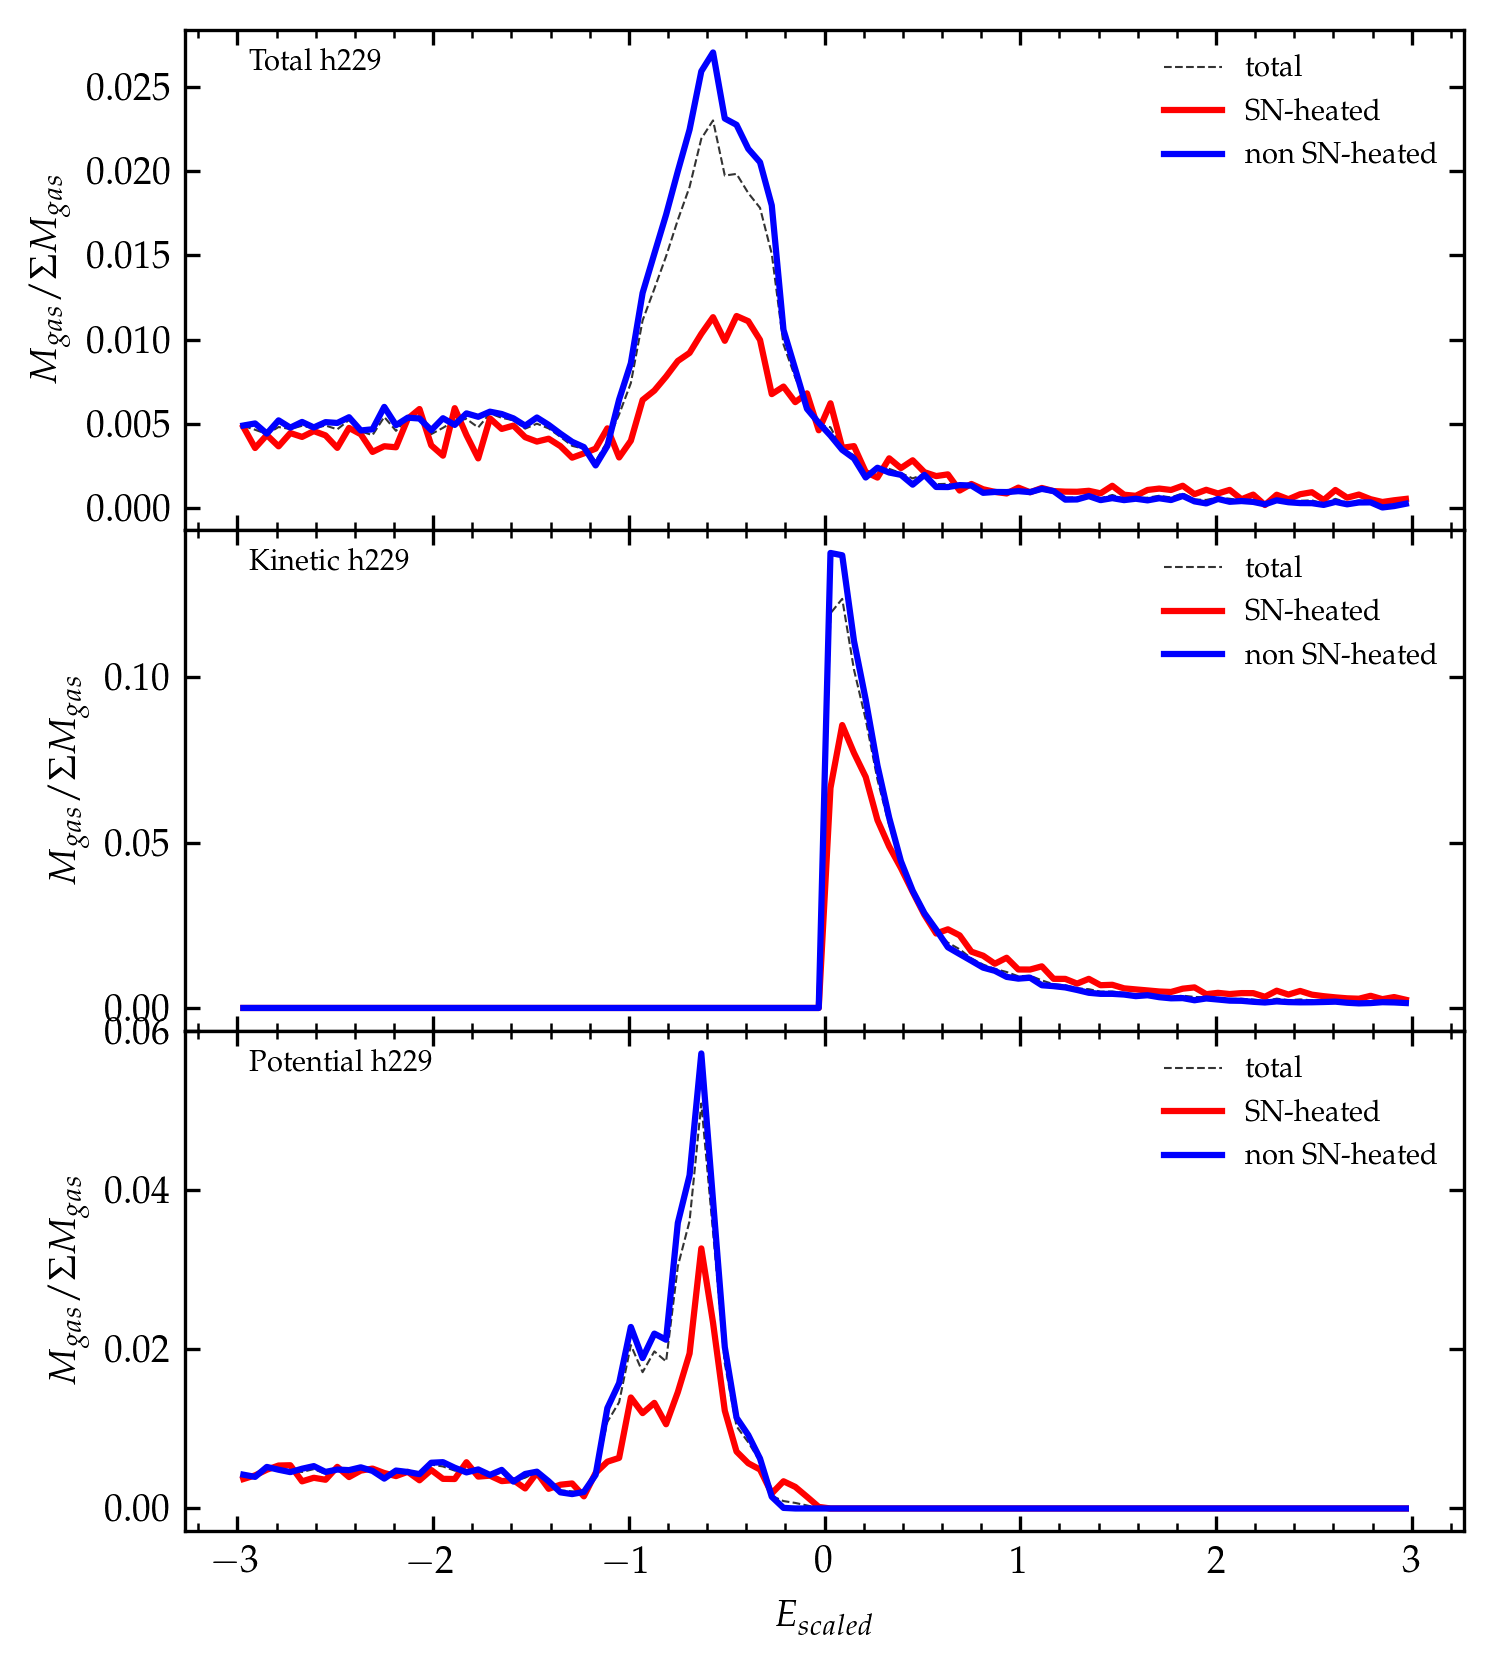

Found the halo information
> Returning <NFW outputs> for h242 <


100%|███████████████████████████████████████████| 36/36 [52:21<00:00, 87.26s/it]


> Returning <energy results> for h242_10 <


100%|███████████████████████████████████████████| 25/25 [00:59<00:00,  2.38s/it]


> Returning <energy results> for h242_21 <


100%|█████████████████████████████████████████████| 8/8 [00:15<00:00,  1.95s/it]


> Returning <energy results> for h242_30 <


100%|███████████████████████████████████████████| 10/10 [00:07<00:00,  1.36it/s]


> Returning <energy results> for h242_38 <


100%|███████████████████████████████████████████| 23/23 [01:23<00:00,  3.63s/it]


> Returning <energy results> for h242_69 <


100%|████████████████████████████████████████| 36/36 [1:26:41<00:00, 144.48s/it]


> Returning <energy results> for h242_8 <


/tmp/ipykernel_55244/1873146736.py:95: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{sim}_all_energy_distribution.pdf')
/tmp/ipykernel_55244/1873146736.py:95: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{sim}_all_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


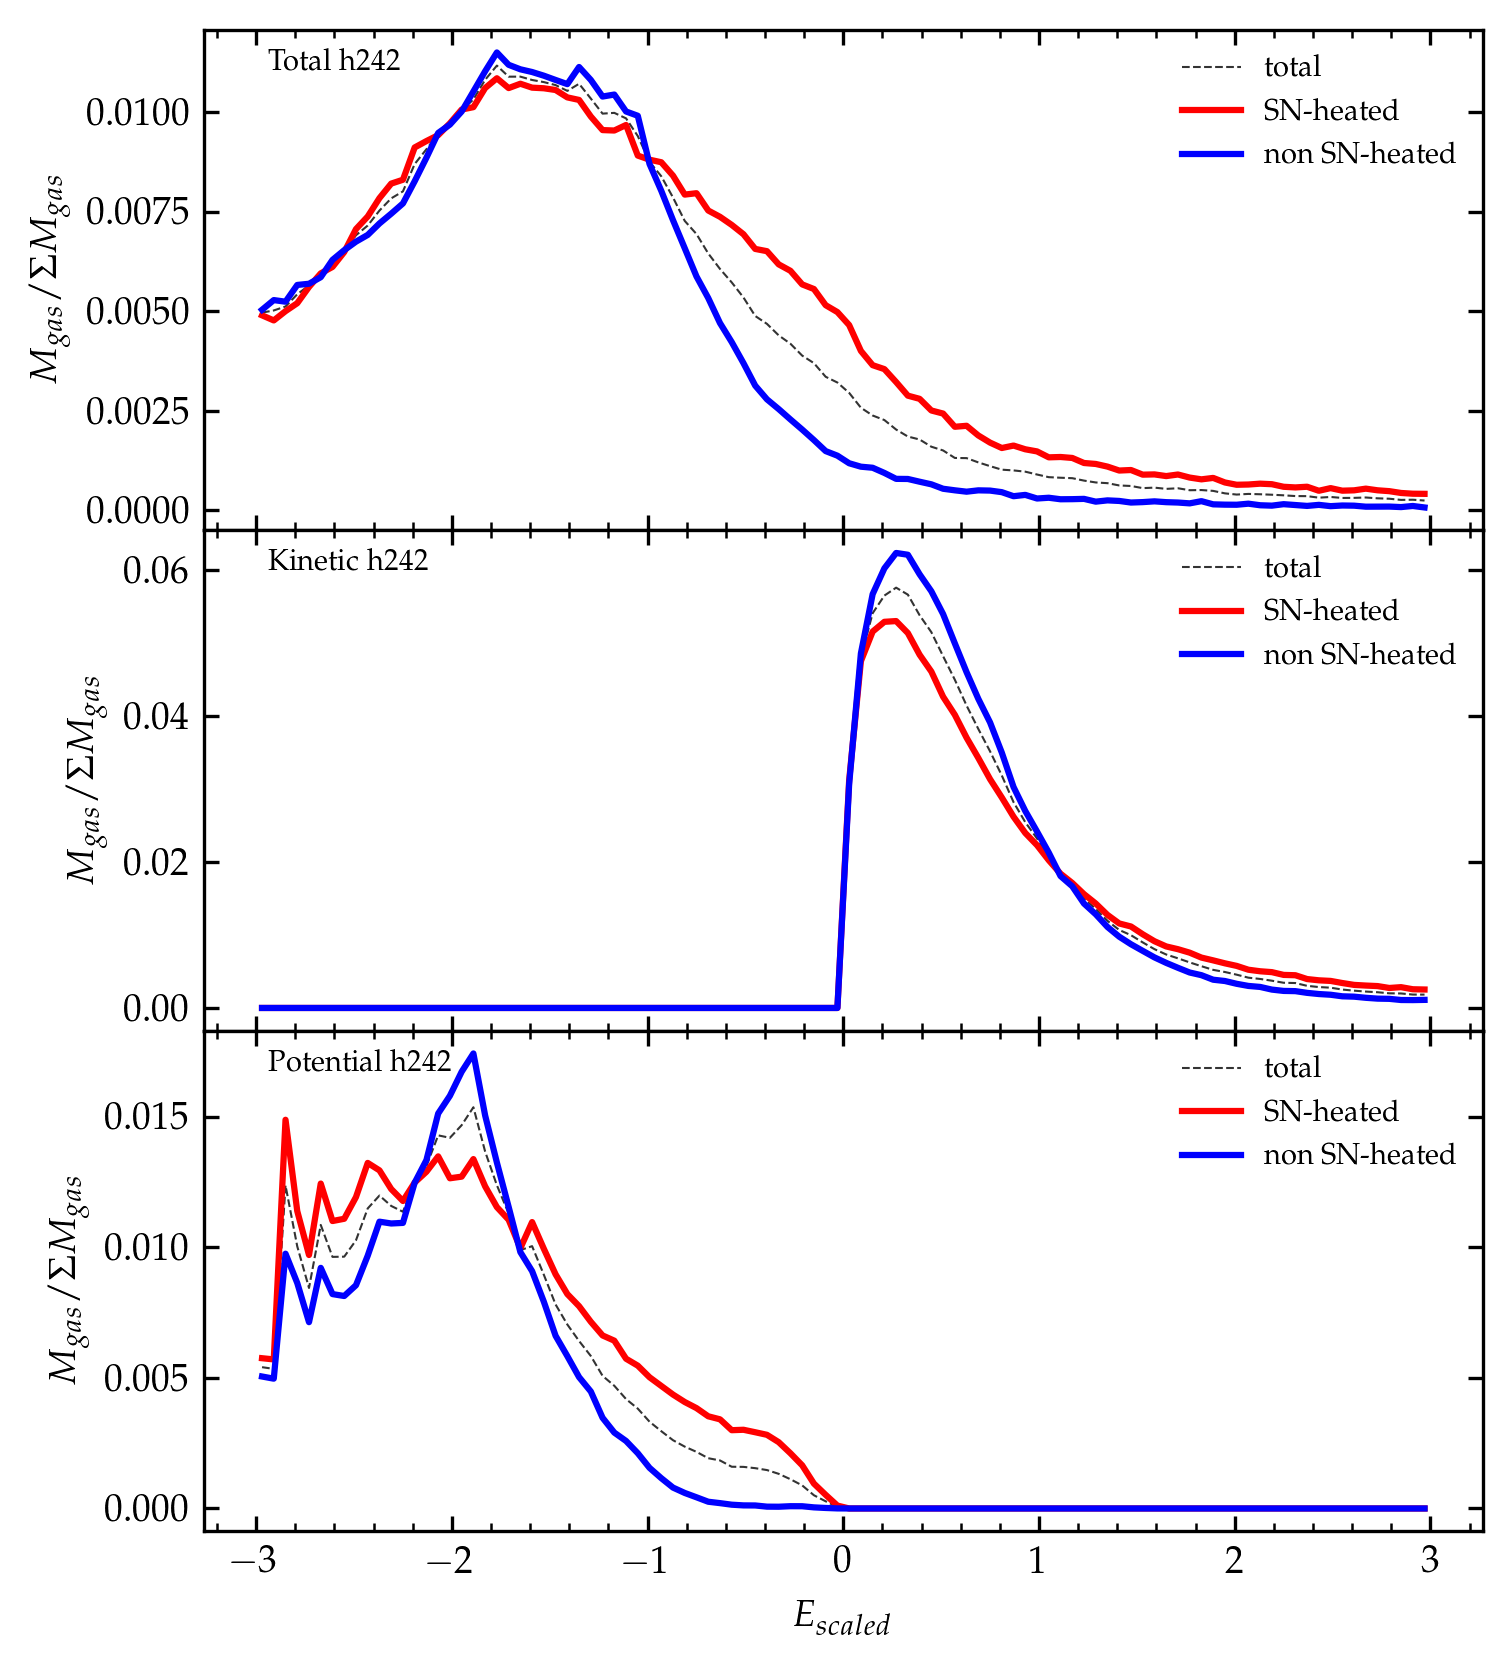

Found the halo information
> Returning <NFW outputs> for h329 <


100%|█████████████████████████████████████████████| 7/7 [00:07<00:00,  1.03s/it]


> Returning <energy results> for h329_117 <


100%|█████████████████████████████████████████████| 8/8 [00:08<00:00,  1.10s/it]


> Returning <energy results> for h329_29 <


100%|█████████████████████████████████████████████| 9/9 [00:45<00:00,  5.08s/it]


> Returning <energy results> for h329_7 <


/tmp/ipykernel_55244/1873146736.py:95: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{sim}_all_energy_distribution.pdf')
/tmp/ipykernel_55244/1873146736.py:95: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{sim}_all_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


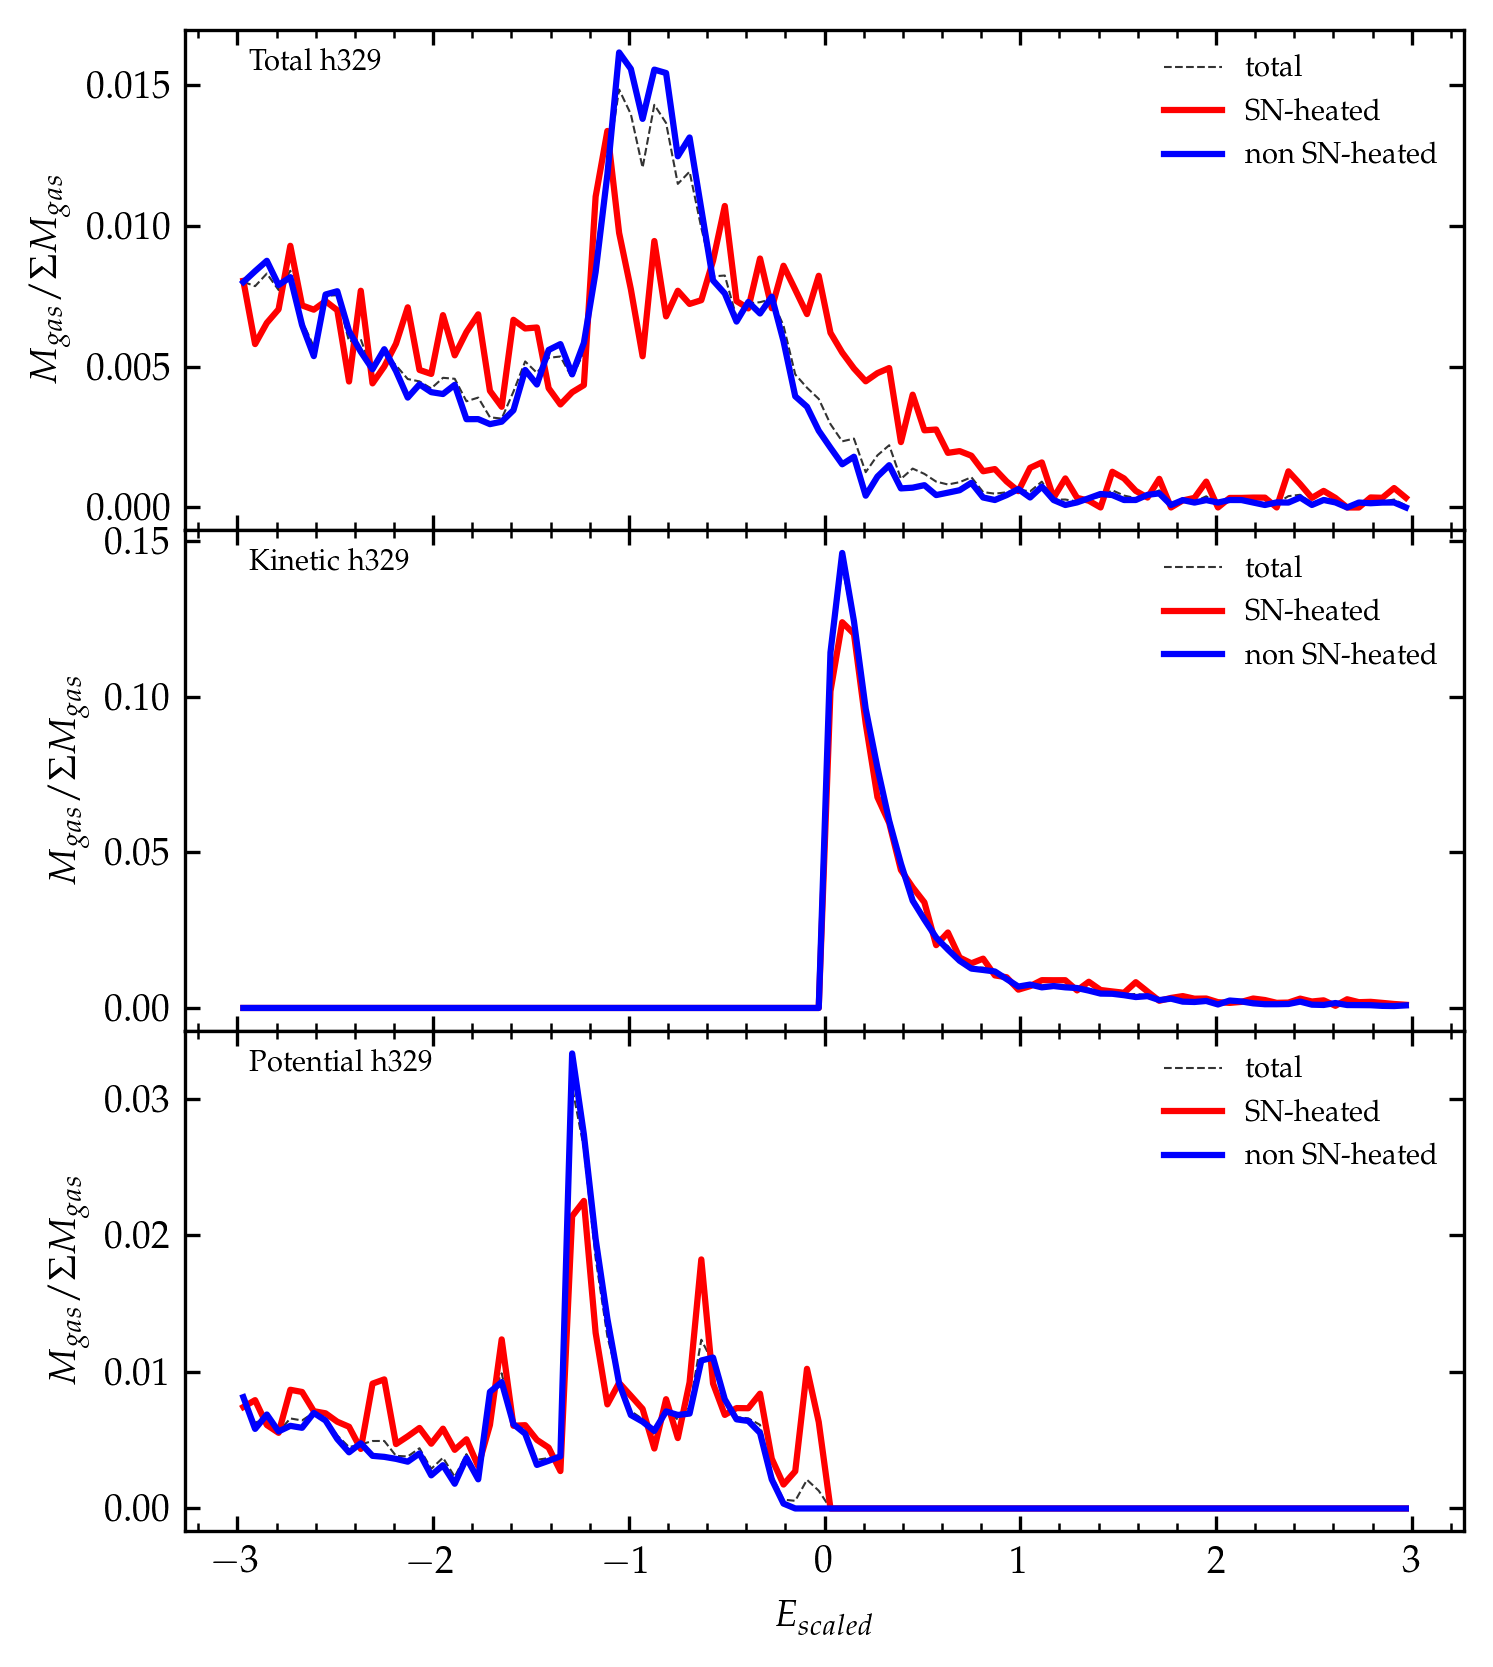

/tmp/ipykernel_55244/1873146736.py:155: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig('plots/all_energy_distribution.pdf')
/tmp/ipykernel_55244/1873146736.py:155: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig('plots/all_energy_distribution.pdf')
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


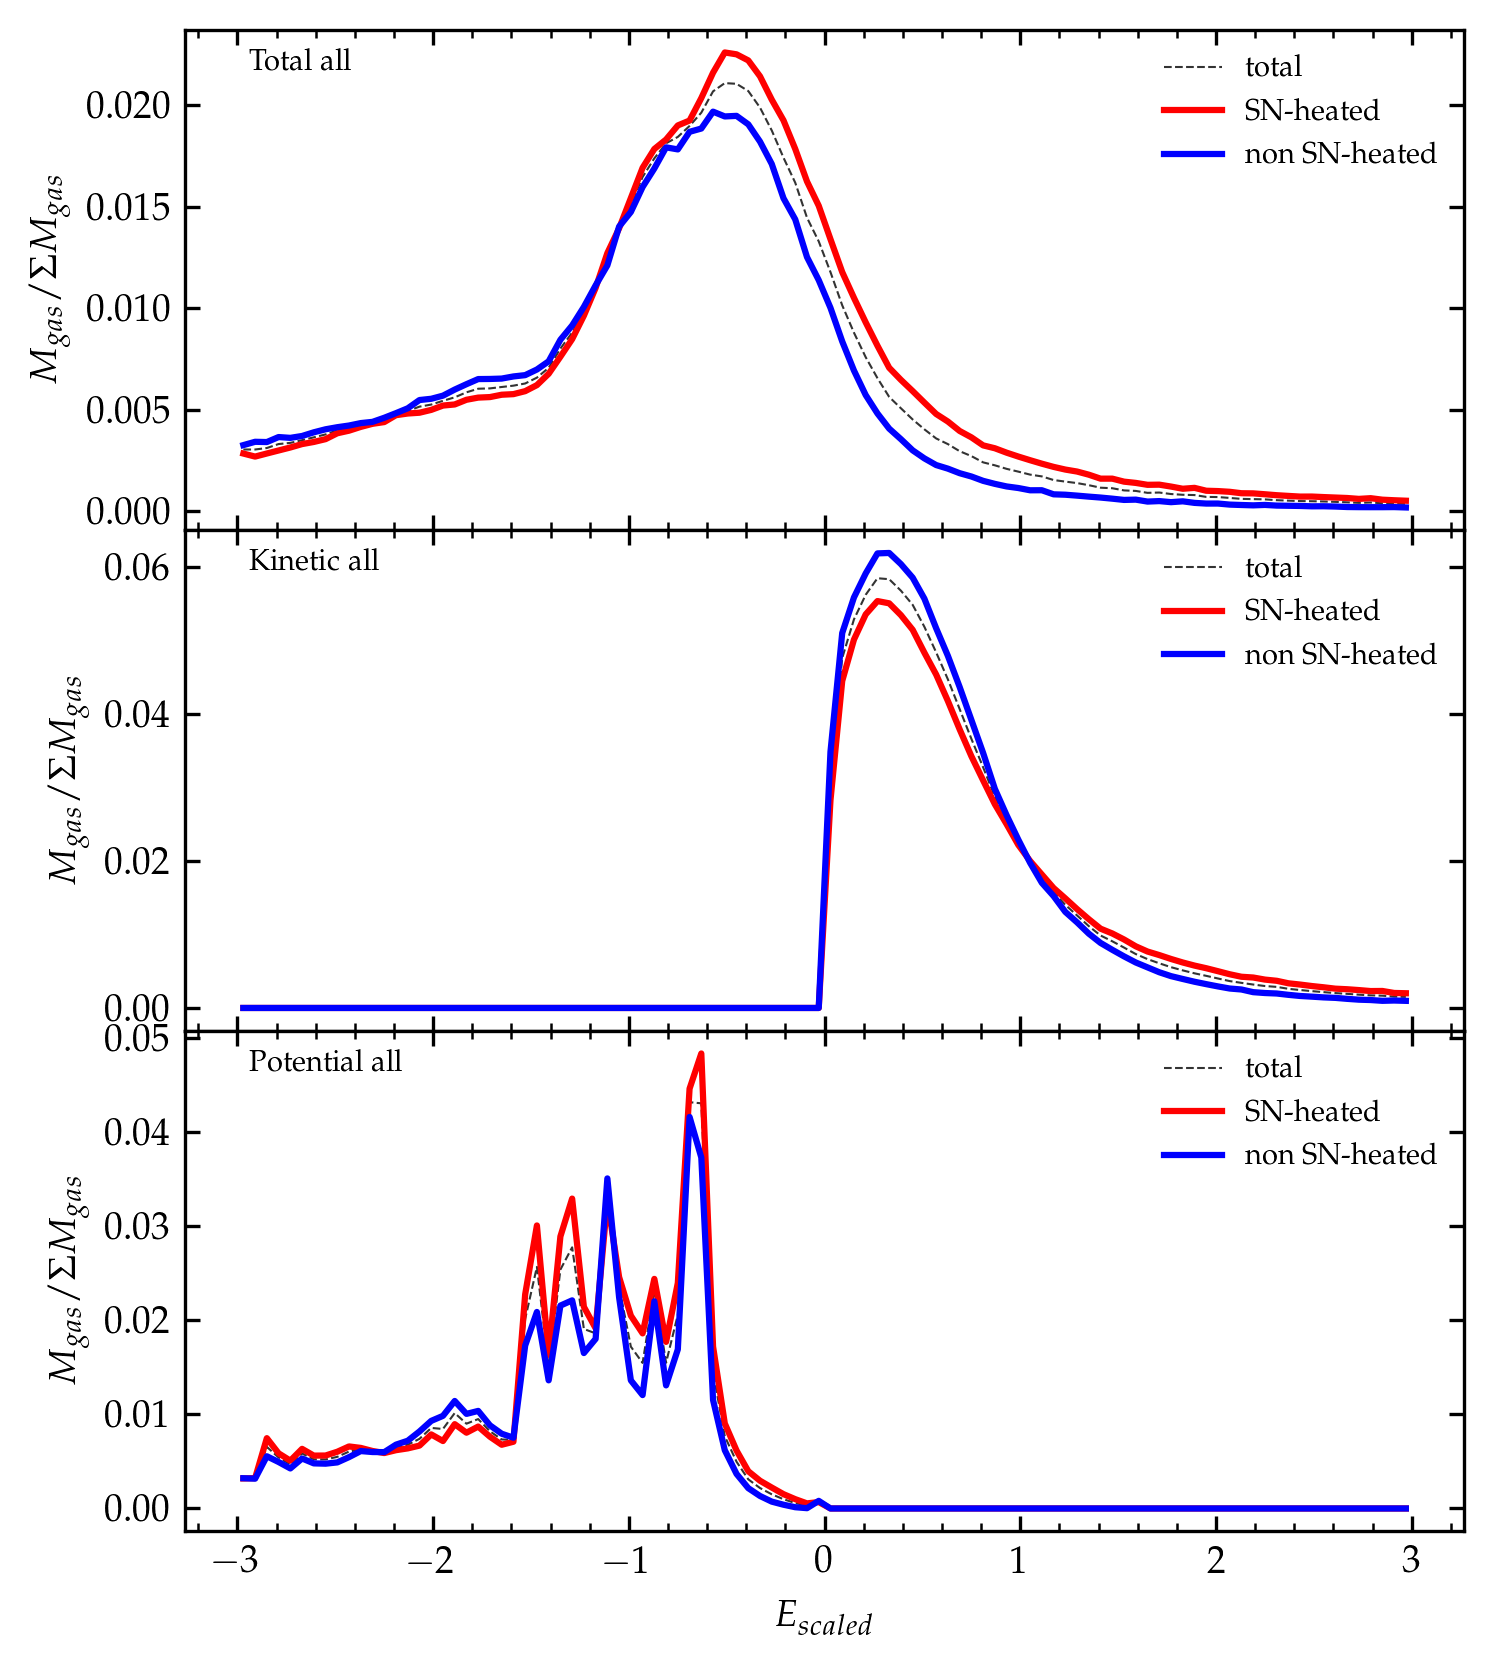

In [44]:
#now run for all the data (archive)

sims = ['h148', 'h229', 'h242', 'h329']
path = f'{rootPath}SNe-heated_Gas_Flow/SNeData/discharged_particles.hdf5'

for sim in sims:
    if sim == 'h148':
        continue
    #read variables for NFW profile
    halo_info = read_nfw_info(sim,filenames[sim])
    discharged_local,heated_local,nonheated_local = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    
    if sim == 'h148':
        keys = ['h148_10', 'h148_12', 'h148_249', 'h148_251', 'h148_27', 'h148_282', 'h148_3', 'h148_34', 'h148_38', 'h148_4', 'h148_55',
        'h148_6', 'h148_65']
    if sim == 'h229':
        keys = ['h229_14', 'h229_18', 'h229_20', 'h229_22', 'h229_49']
    elif sim == 'h242':
        keys = ['h242_10', 'h242_21', 'h242_30', 'h242_38', 'h242_69', 'h242_8']
    elif sim == 'h329':
        keys = ['h329_117', 'h329_29', 'h329_7']
        
    for key in keys:

        #find discharged gas particle and calculate its energy
        discharged = pd.read_hdf(path, key=key)
        discharged_calc = calc_discharged_energy(key, discharged, halo_info)
        #classify by SN-heated status
        heated = discharged_calc[discharged_calc.snHeated == True]
        nonheated = discharged_calc[discharged_calc.snHeated == False]

        #Data frame concat for plotting local sim (h148, h229, etc.)
        discharged_local = pd.concat([discharged_local, discharged_calc])
        heated_local = pd.concat([heated_local, heated])
        nonheated_local = pd.concat([nonheated_local, nonheated])
        #Data frame concat for plotting all
        discharged_concat = pd.concat([discharged_concat, discharged_calc])
        heated_concat = pd.concat([heated_concat, heated])
        nonheated_concat = pd.concat([nonheated_concat, nonheated])
        
    # then plot for local sim
    bins = 100

    #total energy
    yt, xt = np.histogram(discharged_local['Etotalscaled'], bins=bins, weights = wt(discharged_local), range = [-3, 3])
    yh, xh = np.histogram(heated_local['Etotalscaled'], bins=bins, weights = wt(heated_local), range = [-3, 3])
    yn, xn = np.histogram(nonheated_local['Etotalscaled'], bins=bins, weights = wt(nonheated_local), range = [-3, 3])
    #only kinetic
    yk, xk = np.histogram(discharged_local['Kscaled'], bins=bins, weights = wt(discharged_local), range = [-3, 3])
    ykh, xkh = np.histogram(heated_local['Kscaled'], bins=bins, weights = wt(heated_local), range = [-3, 3])
    ykn, xkn = np.histogram(nonheated_local['Kscaled'], bins=bins, weights = wt(nonheated_local), range = [-3, 3])
    #only potential
    yu, xu = np.histogram(discharged_local['Uscaled'], bins=bins, weights = wt(discharged_local), range = [-3, 3])
    yuh, xuh = np.histogram(heated_local['Uscaled'], bins=bins, weights = wt(heated_local), range = [-3, 3])
    yun, xun = np.histogram(nonheated_local['Uscaled'], bins=bins, weights = wt(nonheated_local), range = [-3, 3])

    fig = plt.figure(dpi=300, figsize=(5.5,6.5), constrained_layout=True)
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0) 
    ax0 = fig.add_subplot(gs[0])
    ax1 = fig.add_subplot(gs[1], sharex=ax0)
    ax2= fig.add_subplot(gs[2], sharex=ax1)

    bincenterst = 0.5*(xt[1:] + xt[:-1])
    bincentersh = 0.5*(xh[1:] + xh[:-1])
    bincentersn = 0.5*(xn[1:] + xn[:-1])
    ax0.plot(bincenterst, yt, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
    ax0.plot(bincentersh, yh, label='SN-heated', c='Red', zorder = 2)
    ax0.plot(bincentersn, yn, label='non SN-heated', c='Blue', zorder = 2)
    ax0.annotate(f'Total {sim}', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

    bincentersk = 0.5*(xk[1:] + xk[:-1])
    bincenterskh = 0.5*(xkh[1:] + xkh[:-1])
    bincenterskn = 0.5*(xkn[1:] + xkn[:-1])
    ax1.plot(bincentersk, yk, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
    ax1.plot(bincenterskh, ykh, label='SN-heated', c='Red', zorder = 2)
    ax1.plot(bincenterskn, ykn, label='non SN-heated', c='Blue', zorder = 2)
    ax1.annotate(f'Kinetic {sim}', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

    bincentersu = 0.5*(xu[1:] + xu[:-1])
    bincentersuh = 0.5*(xuh[1:] + xuh[:-1])
    bincentersun = 0.5*(xun[1:] + xun[:-1])
    ax2.plot(bincentersu, yu, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
    ax2.plot(bincentersuh, yuh, label='SN-heated', c='Red', zorder = 2)
    ax2.plot(bincentersun, yun, label='non SN-heated', c='Blue', zorder = 2)
    ax2.annotate(f'Potential {sim}', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

    ax2.set_xlabel(r'$E_{scaled}$') #unitless
    ax0.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
    ax1.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
    ax2.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
    ax0.legend(frameon=False, fontsize=7)
    ax1.legend(frameon=False, fontsize=7)
    ax2.legend(frameon=False, fontsize=7)
    ax0.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
    ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
    ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))

    plt.savefig(f'plots/{sim}_all_energy_distribution.pdf')
    plt.show()
    
#then plot for all
bins = 100

#total energy
yt, xt = np.histogram(discharged_concat['Etotalscaled'], bins=bins, weights = wt(discharged_concat), range = [-3, 3])
yh, xh = np.histogram(heated_concat['Etotalscaled'], bins=bins, weights = wt(heated_concat), range = [-3, 3])
yn, xn = np.histogram(nonheated_concat['Etotalscaled'], bins=bins, weights = wt(nonheated_concat), range = [-3, 3])
#only kinetic
yk, xk = np.histogram(discharged_concat['Kscaled'], bins=bins, weights = wt(discharged_concat), range = [-3, 3])
ykh, xkh = np.histogram(heated_concat['Kscaled'], bins=bins, weights = wt(heated_concat), range = [-3, 3])
ykn, xkn = np.histogram(nonheated_concat['Kscaled'], bins=bins, weights = wt(nonheated_concat), range = [-3, 3])
#only potential
yu, xu = np.histogram(discharged_concat['Uscaled'], bins=bins, weights = wt(discharged_concat), range = [-3, 3])
yuh, xuh = np.histogram(heated_concat['Uscaled'], bins=bins, weights = wt(heated_concat), range = [-3, 3])
yun, xun = np.histogram(nonheated_concat['Uscaled'], bins=bins, weights = wt(nonheated_concat), range = [-3, 3])

fig = plt.figure(dpi=300, figsize=(5.5,6.5), constrained_layout=True)
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0) 
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1], sharex=ax0)
ax2= fig.add_subplot(gs[2], sharex=ax1)

bincenterst = 0.5*(xt[1:] + xt[:-1])
bincentersh = 0.5*(xh[1:] + xh[:-1])
bincentersn = 0.5*(xn[1:] + xn[:-1])
ax0.plot(bincenterst, yt, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
ax0.plot(bincentersh, yh, label='SN-heated', c='Red', zorder = 2)
ax0.plot(bincentersn, yn, label='non SN-heated', c='Blue', zorder = 2)
ax0.annotate('Total all', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

bincentersk = 0.5*(xk[1:] + xk[:-1])
bincenterskh = 0.5*(xkh[1:] + xkh[:-1])
bincenterskn = 0.5*(xkn[1:] + xkn[:-1])
ax1.plot(bincentersk, yk, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
ax1.plot(bincenterskh, ykh, label='SN-heated', c='Red', zorder = 2)
ax1.plot(bincenterskn, ykn, label='non SN-heated', c='Blue', zorder = 2)
ax1.annotate('Kinetic all', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

bincentersu = 0.5*(xu[1:] + xu[:-1])
bincentersuh = 0.5*(xuh[1:] + xuh[:-1])
bincentersun = 0.5*(xun[1:] + xun[:-1])
ax2.plot(bincentersu, yu, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
ax2.plot(bincentersuh, yuh, label='SN-heated', c='Red', zorder = 2)
ax2.plot(bincentersun, yun, label='non SN-heated', c='Blue', zorder = 2)
ax2.annotate('Potential all', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

ax2.set_xlabel(r'$E_{scaled}$') #unitless
ax0.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
ax1.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
ax2.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
ax0.legend(frameon=False, fontsize=7)
ax1.legend(frameon=False, fontsize=7)
ax2.legend(frameon=False, fontsize=7)
ax0.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))

plt.savefig('plots/all_energy_distribution.pdf')
plt.show()

In [8]:
#run for all satellites (include h148_2), and plot based on stellar mass sizes
sims = ['h148', 'h229', 'h242', 'h329']
#categorizing satellites by stellar mass (see README)
massive = ['h148_10', 'h148_12', 'h148_2', 'h148_3', 'h148_4', 'h148_6', 'h242_10', 'h242_8']
intermediate = ['h148_27', 'h148_38', 'h148_65', 'h229_18', 'h242_21', 'h242_69', 'h329_7']
small = ['h148_249', 'h148_251', 'h148_282', 'h148_34', 'h148_55', 'h229_14', 'h229_20', 'h229_22', 'h229_49', 
         'h242_30', 'h242_38', 'h329_117', 'h329_29']
 
path = f'{rootPath}SNe-heated_Gas_Flow/SNeData/discharged_particles.hdf5'
discharged_concat,heated_concat,nonheated_concat = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
discharged_massive,heated_massive,nonheated_massive = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
discharged_intermediate,heated_intermediate,nonheated_intermediate = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
discharged_small,heated_small,nonheated_small = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for sim in sims:
    #read variables for NFW profile
    halo_info = read_nfw_info(sim,filenames[sim])
    
    if sim == 'h148':
        keys = ['h148_10', 'h148_12', 'h148_2', 'h148_249', 'h148_251', 'h148_27', 'h148_282', 'h148_3', 'h148_34', 'h148_38', 'h148_4', 'h148_55',
        'h148_6', 'h148_65']
    if sim == 'h229':
        keys = ['h229_14', 'h229_18', 'h229_20', 'h229_22', 'h229_49']
    elif sim == 'h242':
        keys = ['h242_10', 'h242_21', 'h242_30', 'h242_38', 'h242_69', 'h242_8']
    elif sim == 'h329':
        keys = ['h329_117', 'h329_29', 'h329_7']
    
    for key in keys:
        #find discharged gas particle and calculate its energy
        discharged = pd.read_hdf(path, key=key)
        discharged_calc = calc_discharged_energy(key, discharged, halo_info)
        #classify by SN-heated status
        heated = discharged_calc[discharged_calc.snHeated == True]
        nonheated = discharged_calc[discharged_calc.snHeated == False]

        #Data frame concat for plotting different mass sizes
        if key in massive:
            discharged_massive = pd.concat([discharged_massive, discharged_calc])
            heated_massive = pd.concat([heated_massive, heated])
            nonheated_massive = pd.concat([nonheated_massive, nonheated])
        elif key in intermediate:
            discharged_intermediate = pd.concat([discharged_intermediate, discharged_calc])
            heated_intermediate = pd.concat([heated_intermediate, heated])
            nonheated_intermediate = pd.concat([nonheated_intermediate, nonheated])
        elif key in small:
            discharged_small = pd.concat([discharged_small, discharged_calc])
            heated_small = pd.concat([heated_small, heated])
            nonheated_small = pd.concat([nonheated_small, nonheated])
        
        #Data frame concat for plotting all
        discharged_concat = pd.concat([discharged_concat, discharged_calc])
        heated_concat = pd.concat([heated_concat, heated])
        nonheated_concat = pd.concat([nonheated_concat, nonheated])

Found the halo information
> Returning <NFW outputs> for h148 <


100%|███████████████████████████████████████████| 20/20 [14:10<00:00, 42.53s/it]


> Returning <energy results> for h148_10 <


100%|███████████████████████████████████████████| 18/18 [00:34<00:00,  1.90s/it]


> Returning <energy results> for h148_12 <


100%|████████████████████████████████████████| 11/11 [1:38:05<00:00, 535.08s/it]


> Returning <energy results> for h148_2 <


100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.61s/it]


> Returning <energy results> for h148_249 <


100%|█████████████████████████████████████████████| 6/6 [00:17<00:00,  2.97s/it]


> Returning <energy results> for h148_251 <


100%|███████████████████████████████████████████| 23/23 [05:15<00:00, 13.73s/it]


> Returning <energy results> for h148_27 <


100%|█████████████████████████████████████████████| 5/5 [00:17<00:00,  3.46s/it]


> Returning <energy results> for h148_282 <


100%|████████████████████████████████████████| 16/16 [1:07:58<00:00, 254.92s/it]


> Returning <energy results> for h148_3 <


100%|███████████████████████████████████████████| 16/16 [00:56<00:00,  3.54s/it]


> Returning <energy results> for h148_34 <


100%|███████████████████████████████████████████| 18/18 [00:48<00:00,  2.72s/it]


> Returning <energy results> for h148_38 <


100%|███████████████████████████████████████████| 14/14 [12:51<00:00, 55.11s/it]


> Returning <energy results> for h148_4 <


100%|███████████████████████████████████████████| 18/18 [00:53<00:00,  2.98s/it]


> Returning <energy results> for h148_55 <


100%|███████████████████████████████████████████| 12/12 [10:30<00:00, 52.51s/it]


> Returning <energy results> for h148_6 <


100%|█████████████████████████████████████████████| 7/7 [00:22<00:00,  3.16s/it]


> Returning <energy results> for h148_65 <
Found the halo information
> Returning <NFW outputs> for h229 <


100%|███████████████████████████████████████████| 25/25 [00:44<00:00,  1.80s/it]


> Returning <energy results> for h229_14 <


100%|███████████████████████████████████████████| 27/27 [01:29<00:00,  3.33s/it]


> Returning <energy results> for h229_18 <


100%|███████████████████████████████████████████| 18/18 [00:10<00:00,  1.64it/s]


> Returning <energy results> for h229_20 <


100%|███████████████████████████████████████████| 15/15 [00:08<00:00,  1.68it/s]


> Returning <energy results> for h229_22 <


100%|███████████████████████████████████████████| 14/14 [00:16<00:00,  1.15s/it]


> Returning <energy results> for h229_49 <
Found the halo information
> Returning <NFW outputs> for h242 <


100%|███████████████████████████████████████████| 36/36 [53:00<00:00, 88.34s/it]


> Returning <energy results> for h242_10 <


100%|███████████████████████████████████████████| 25/25 [00:49<00:00,  2.00s/it]


> Returning <energy results> for h242_21 <


100%|█████████████████████████████████████████████| 8/8 [00:13<00:00,  1.63s/it]


> Returning <energy results> for h242_30 <


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.75it/s]


> Returning <energy results> for h242_38 <


100%|███████████████████████████████████████████| 23/23 [01:12<00:00,  3.17s/it]


> Returning <energy results> for h242_69 <


100%|████████████████████████████████████████| 36/36 [1:25:44<00:00, 142.89s/it]


> Returning <energy results> for h242_8 <
Found the halo information
> Returning <NFW outputs> for h329 <


100%|█████████████████████████████████████████████| 7/7 [00:08<00:00,  1.21s/it]


> Returning <energy results> for h329_117 <


100%|█████████████████████████████████████████████| 8/8 [00:09<00:00,  1.17s/it]


> Returning <energy results> for h329_29 <


100%|█████████████████████████████████████████████| 9/9 [00:45<00:00,  5.03s/it]


> Returning <energy results> for h329_7 <


In [16]:
def plotting(discharged_local, heated_local, nonheated_local, dataname, cSN, cnonSN, save=True):
    #this function is one stop shop for plotting energy distribution 
    bins = 100

    #total energy
    yt, xt = np.histogram(discharged_local['Etotalscaled'], bins=bins, weights = wt(discharged_local), range = [-3, 3])
    yh, xh = np.histogram(heated_local['Etotalscaled'], bins=bins, weights = wt(heated_local), range = [-3, 3])
    yn, xn = np.histogram(nonheated_local['Etotalscaled'], bins=bins, weights = wt(nonheated_local), range = [-3, 3])
    #only kinetic
    yk, xk = np.histogram(discharged_local['Kscaled'], bins=bins, weights = wt(discharged_local), range = [-3, 3])
    ykh, xkh = np.histogram(heated_local['Kscaled'], bins=bins, weights = wt(heated_local), range = [-3, 3])
    ykn, xkn = np.histogram(nonheated_local['Kscaled'], bins=bins, weights = wt(nonheated_local), range = [-3, 3])
    #only potential
    yu, xu = np.histogram(discharged_local['Uscaled'], bins=bins, weights = wt(discharged_local), range = [-3, 3])
    yuh, xuh = np.histogram(heated_local['Uscaled'], bins=bins, weights = wt(heated_local), range = [-3, 3])
    yun, xun = np.histogram(nonheated_local['Uscaled'], bins=bins, weights = wt(nonheated_local), range = [-3, 3])

    plt.clf()
    fig = plt.figure(dpi=200, figsize=(5.5,6.5), constrained_layout=True)
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0) 
    ax0 = fig.add_subplot(gs[0])
    ax1 = fig.add_subplot(gs[1], sharex=ax0)
    ax2= fig.add_subplot(gs[2], sharex=ax1)

    bincenterst = 0.5*(xt[1:] + xt[:-1])
    bincentersh = 0.5*(xh[1:] + xh[:-1])
    bincentersn = 0.5*(xn[1:] + xn[:-1])
    ax0.plot(bincenterst, yt, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
    ax0.plot(bincentersh, yh, label='SN-heated', c=cSN, zorder = 2)
    ax0.plot(bincentersn, yn, label='non SN-heated', c=cnonSN, zorder = 2)
    ax0.annotate(f'Total {dataname}', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

    bincentersk = 0.5*(xk[1:] + xk[:-1])
    bincenterskh = 0.5*(xkh[1:] + xkh[:-1])
    bincenterskn = 0.5*(xkn[1:] + xkn[:-1])
    ax1.plot(bincentersk, yk, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
    ax1.plot(bincenterskh, ykh, label='SN-heated', c=cSN, zorder = 2)
    ax1.plot(bincenterskn, ykn, label='non SN-heated', c=cnonSN, zorder = 2)
    ax1.annotate(f'Kinetic {dataname}', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

    bincentersu = 0.5*(xu[1:] + xu[:-1])
    bincentersuh = 0.5*(xuh[1:] + xuh[:-1])
    bincentersun = 0.5*(xun[1:] + xun[:-1])
    ax2.plot(bincentersu, yu, label='total', linestyle='--', color='black', alpha = 0.8, linewidth = 0.5, zorder = 1)
    ax2.plot(bincentersuh, yuh, label='SN-heated', c=cSN, zorder = 2)
    ax2.plot(bincentersun, yun, label='non SN-heated', c=cnonSN, zorder = 2)
    ax2.annotate(f'Potential {dataname}', (0.05, 0.96), xycoords='axes fraction', va='top', fontsize=7, zorder=1000)

    ax2.set_xlabel(r'$E_{scaled}$') #unitless
    ax0.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
    ax1.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
    ax2.set_ylabel('$M_{gas} / \Sigma M_{gas}$')
    ax0.legend(frameon=False, fontsize=7)
    ax1.legend(frameon=False, fontsize=7)
    ax2.legend(frameon=False, fontsize=7)
    ax0.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
    ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
    ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))

    if save:
        plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')
    plt.show()

/tmp/ipykernel_51152/2831225967.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')
/tmp/ipykernel_51152/2831225967.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')


<Figure size 1280x960 with 0 Axes>

/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


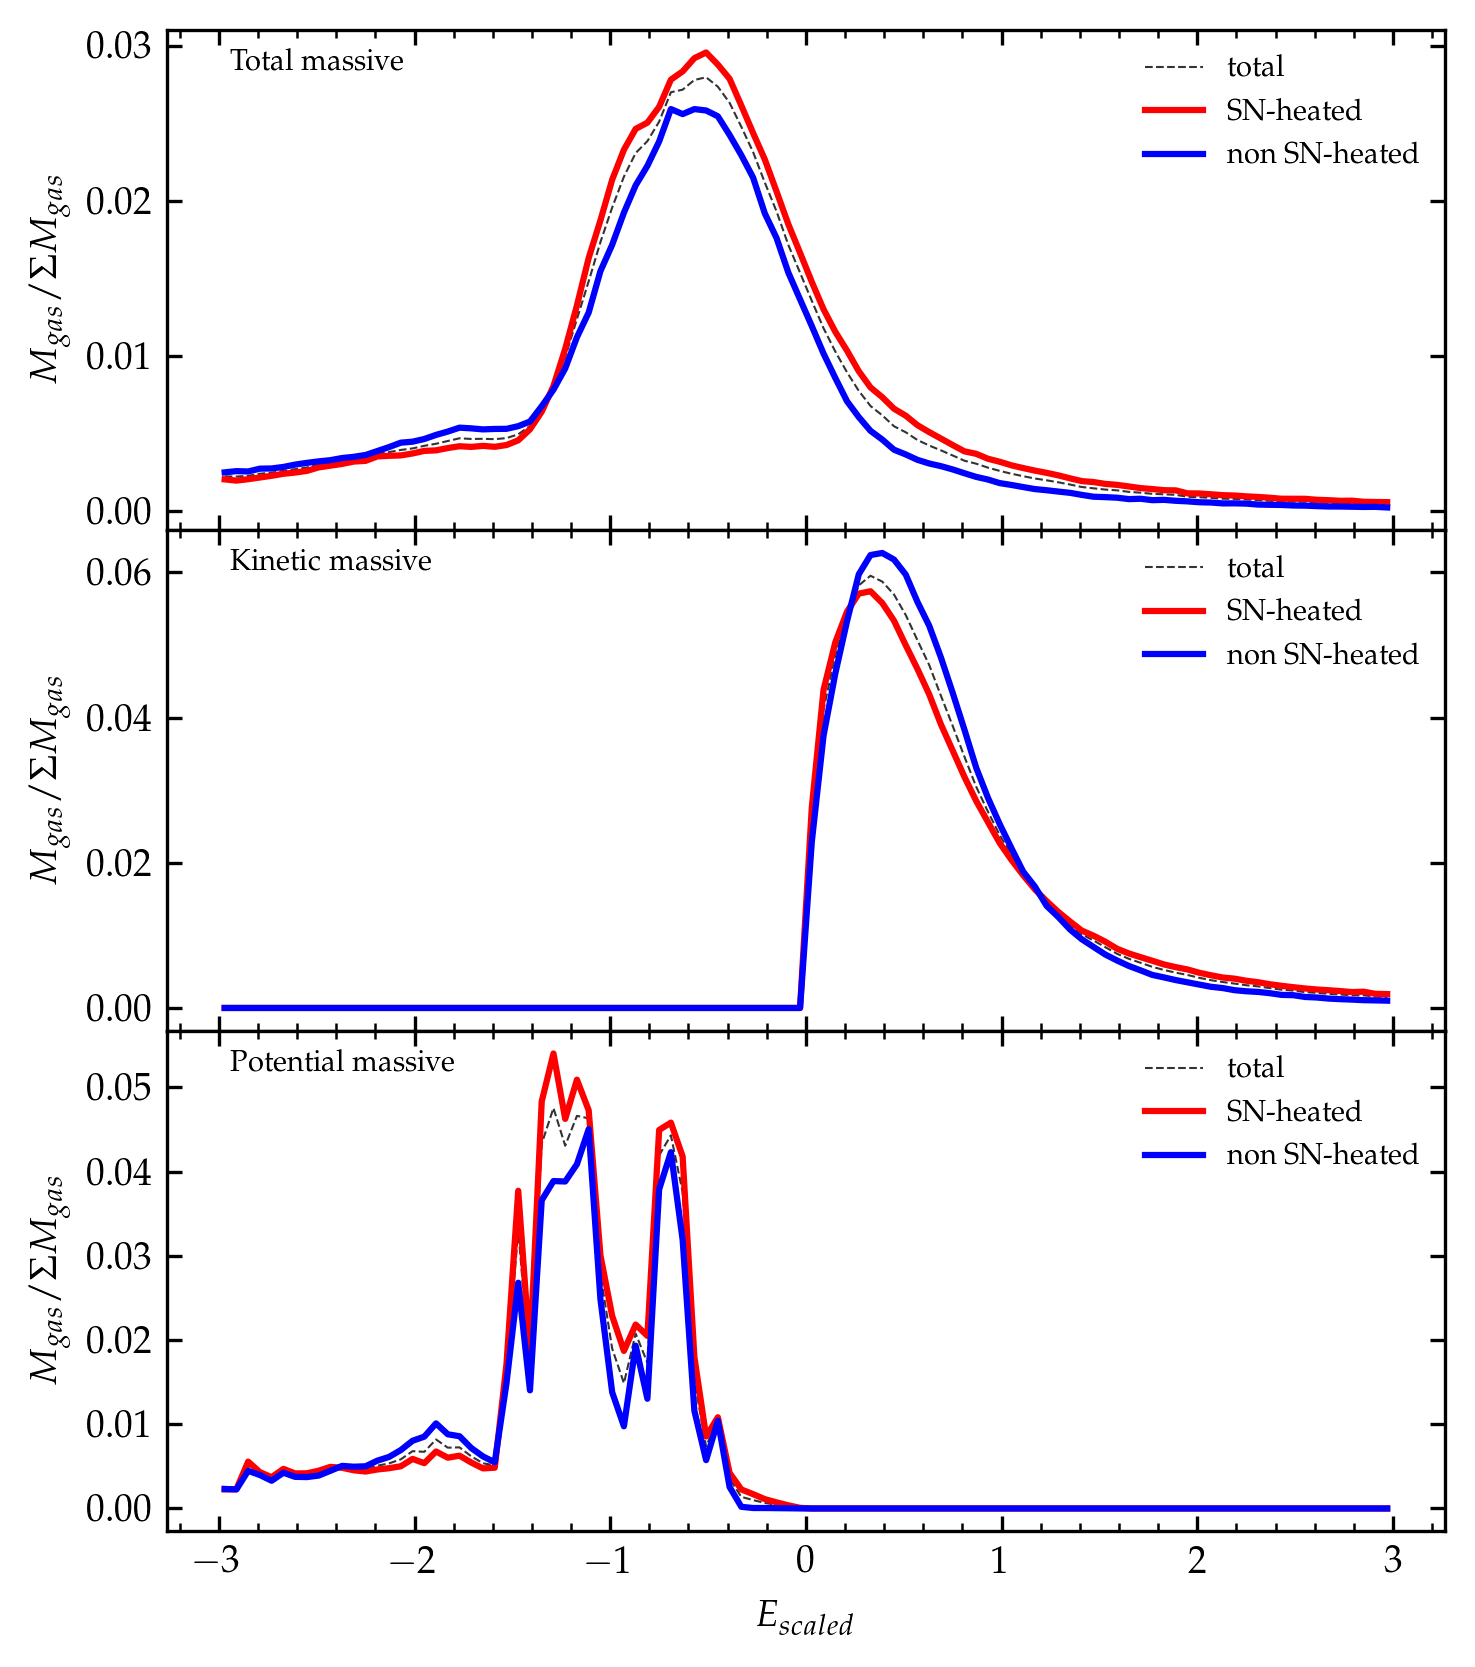

/tmp/ipykernel_51152/2831225967.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')
/tmp/ipykernel_51152/2831225967.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')


<Figure size 1280x960 with 0 Axes>

/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


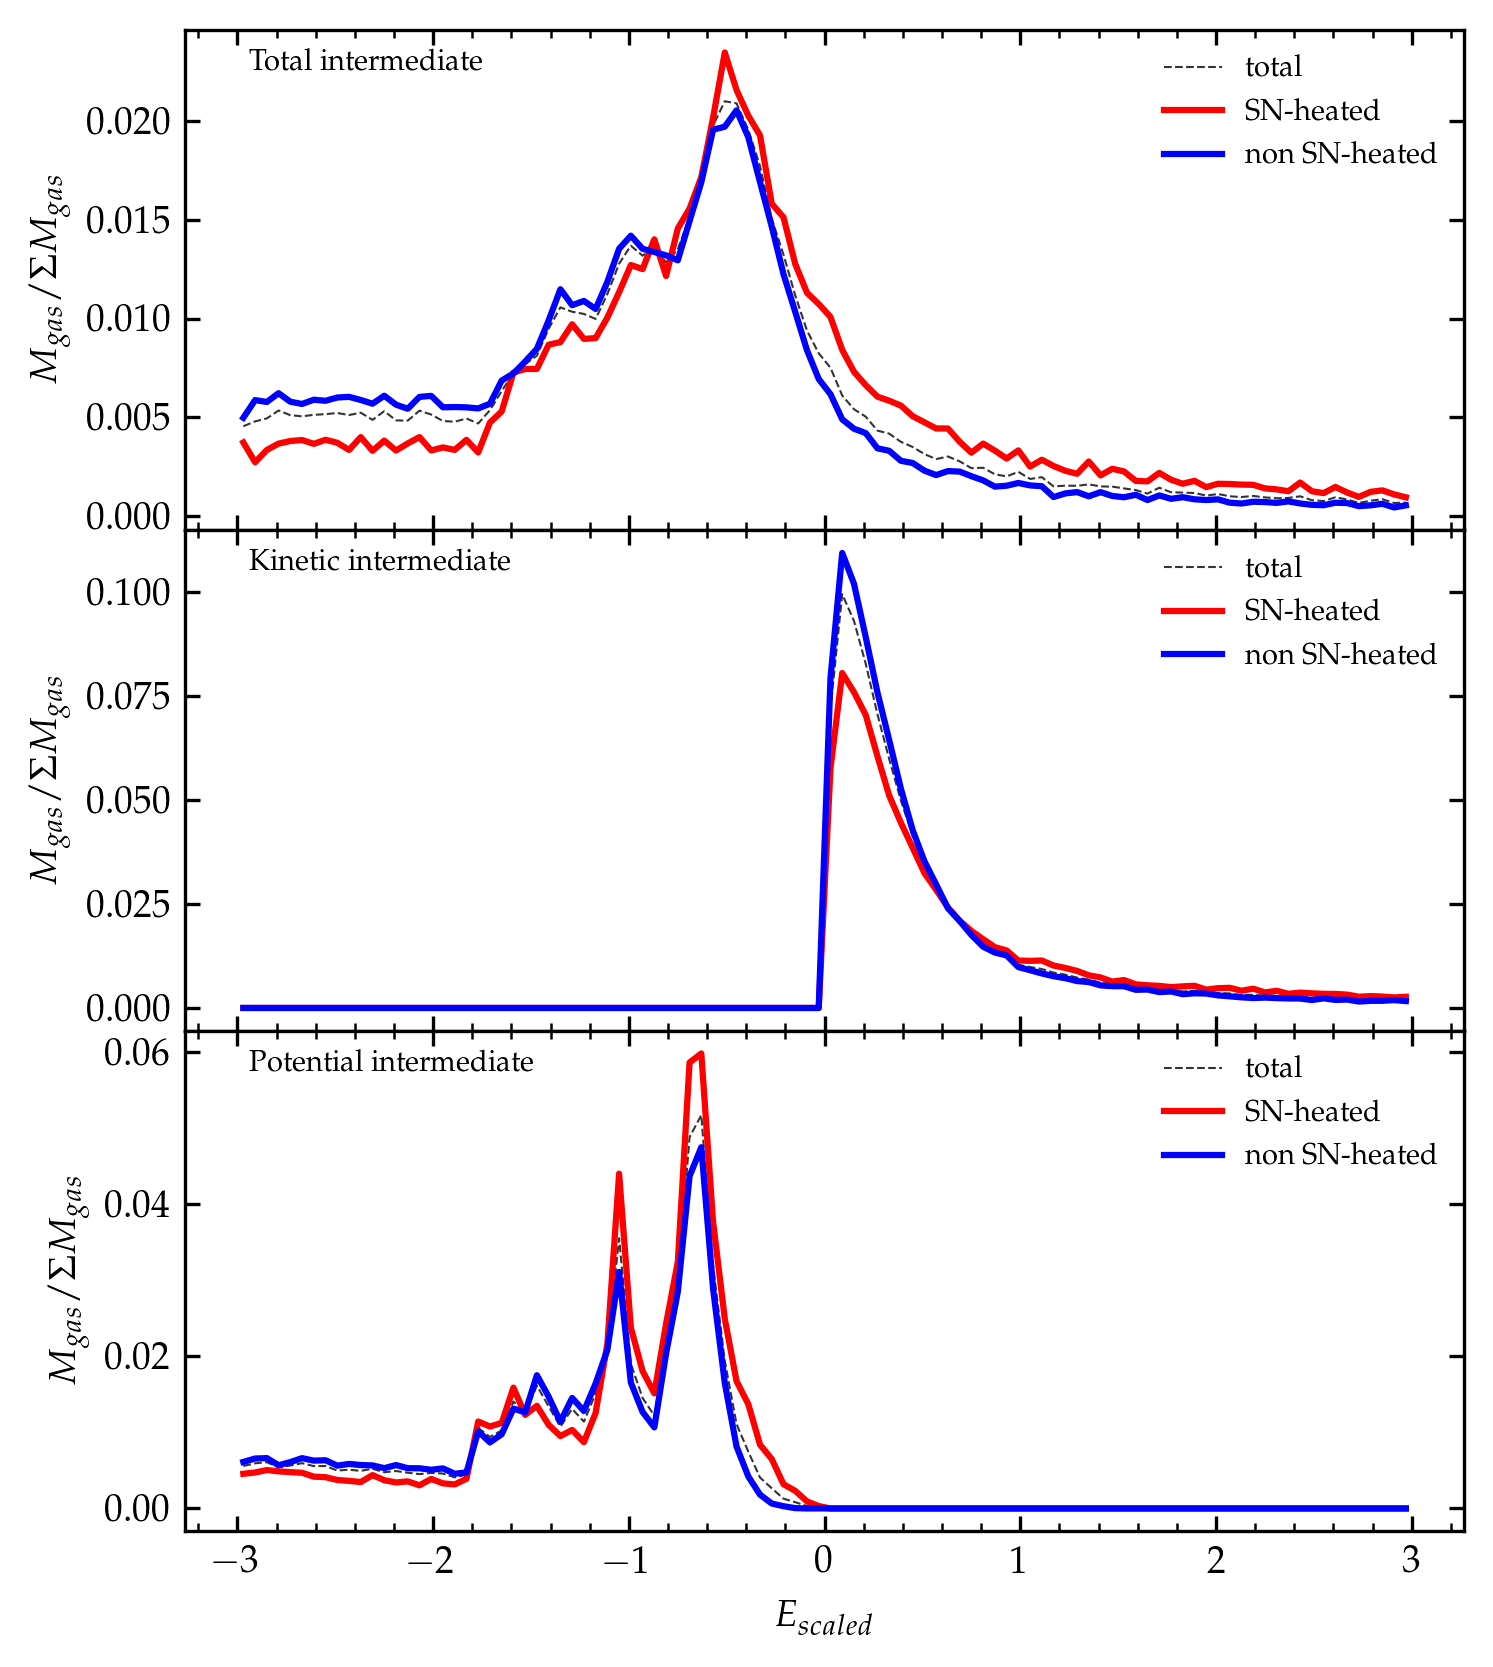

/tmp/ipykernel_51152/2831225967.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')
/tmp/ipykernel_51152/2831225967.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')


<Figure size 1280x960 with 0 Axes>

/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


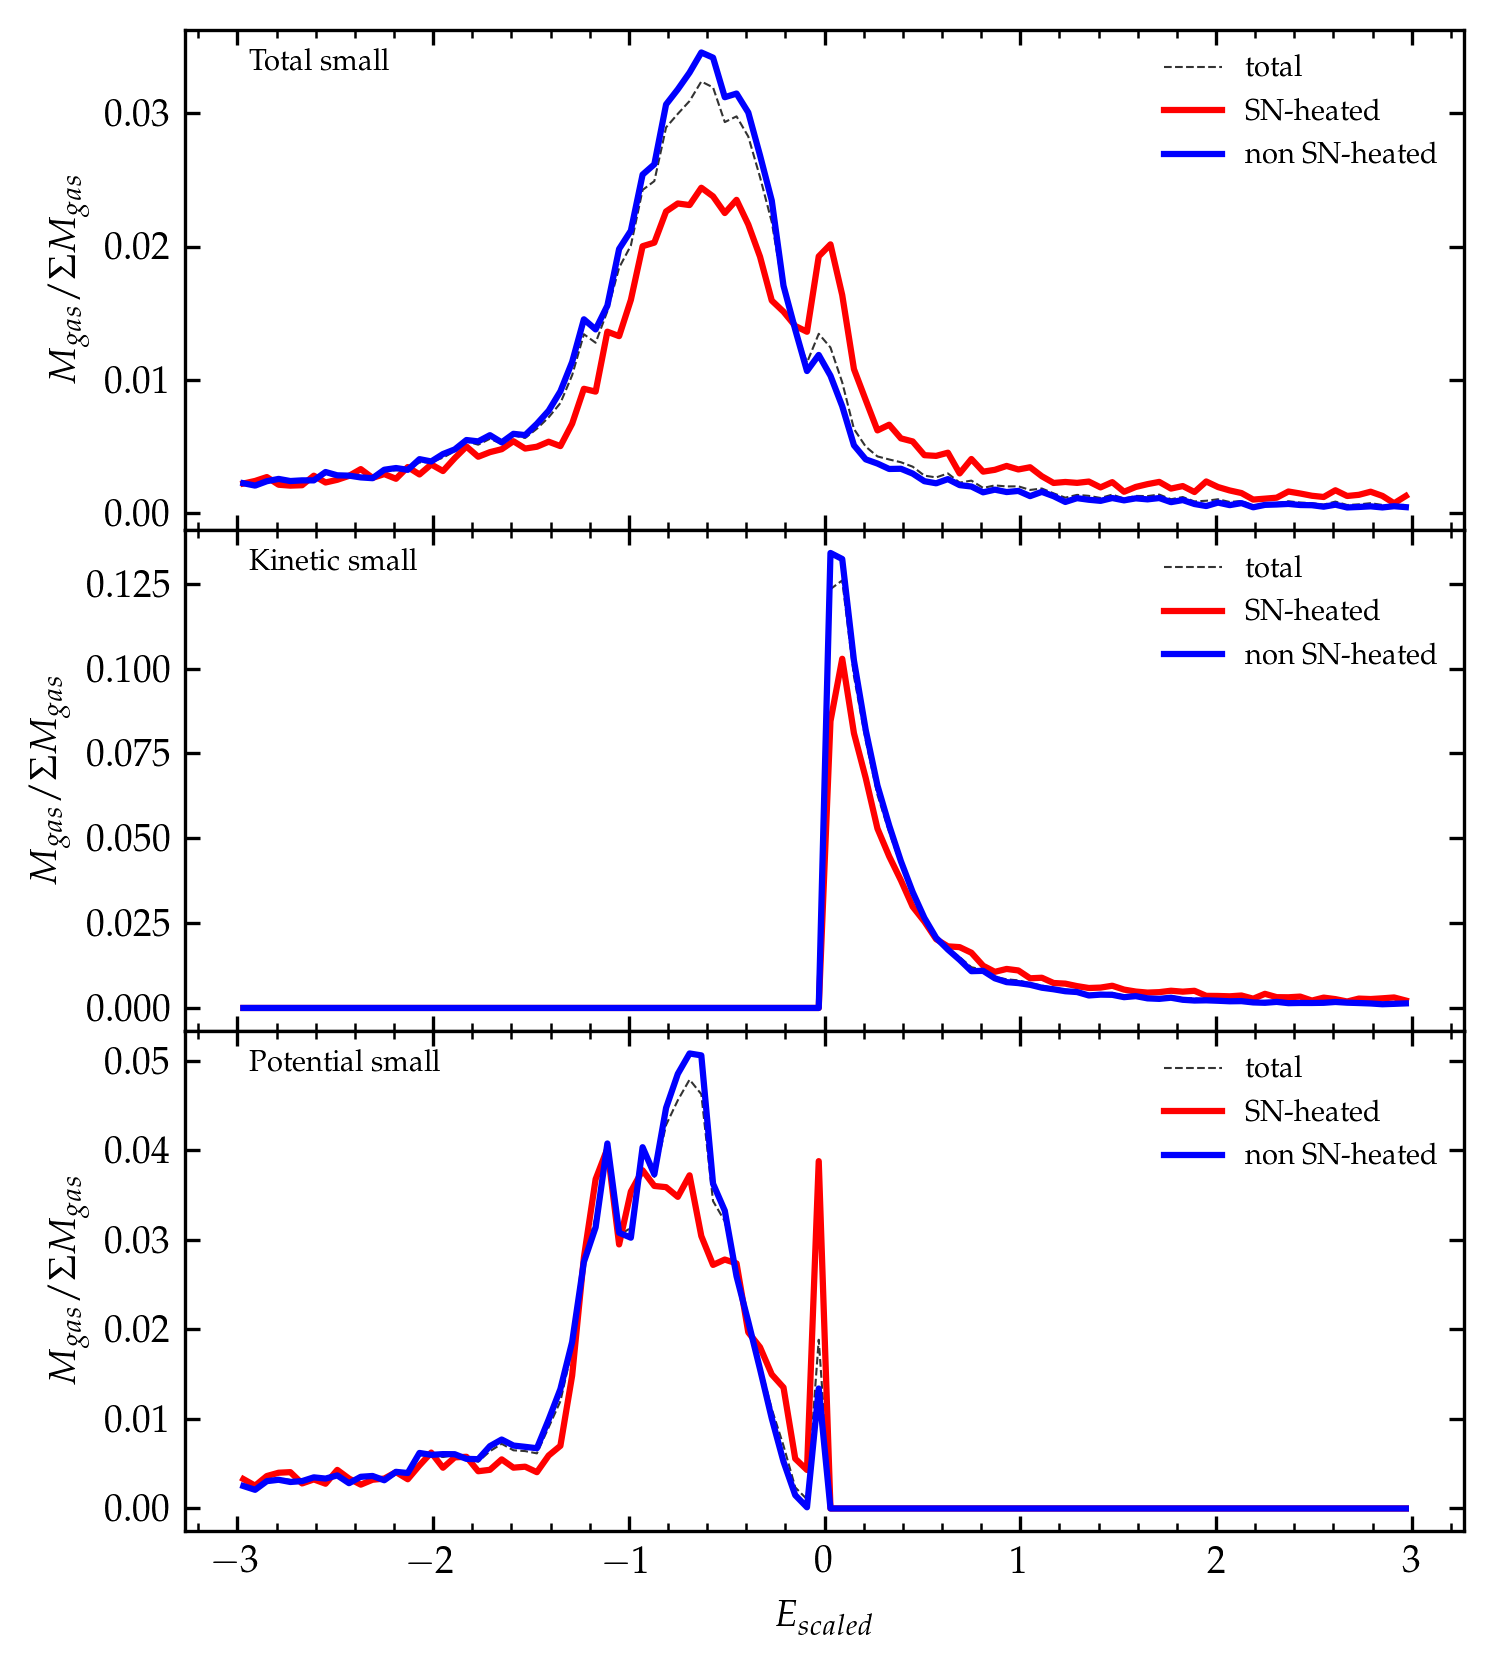

/tmp/ipykernel_51152/2831225967.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')


<Figure size 1280x960 with 0 Axes>

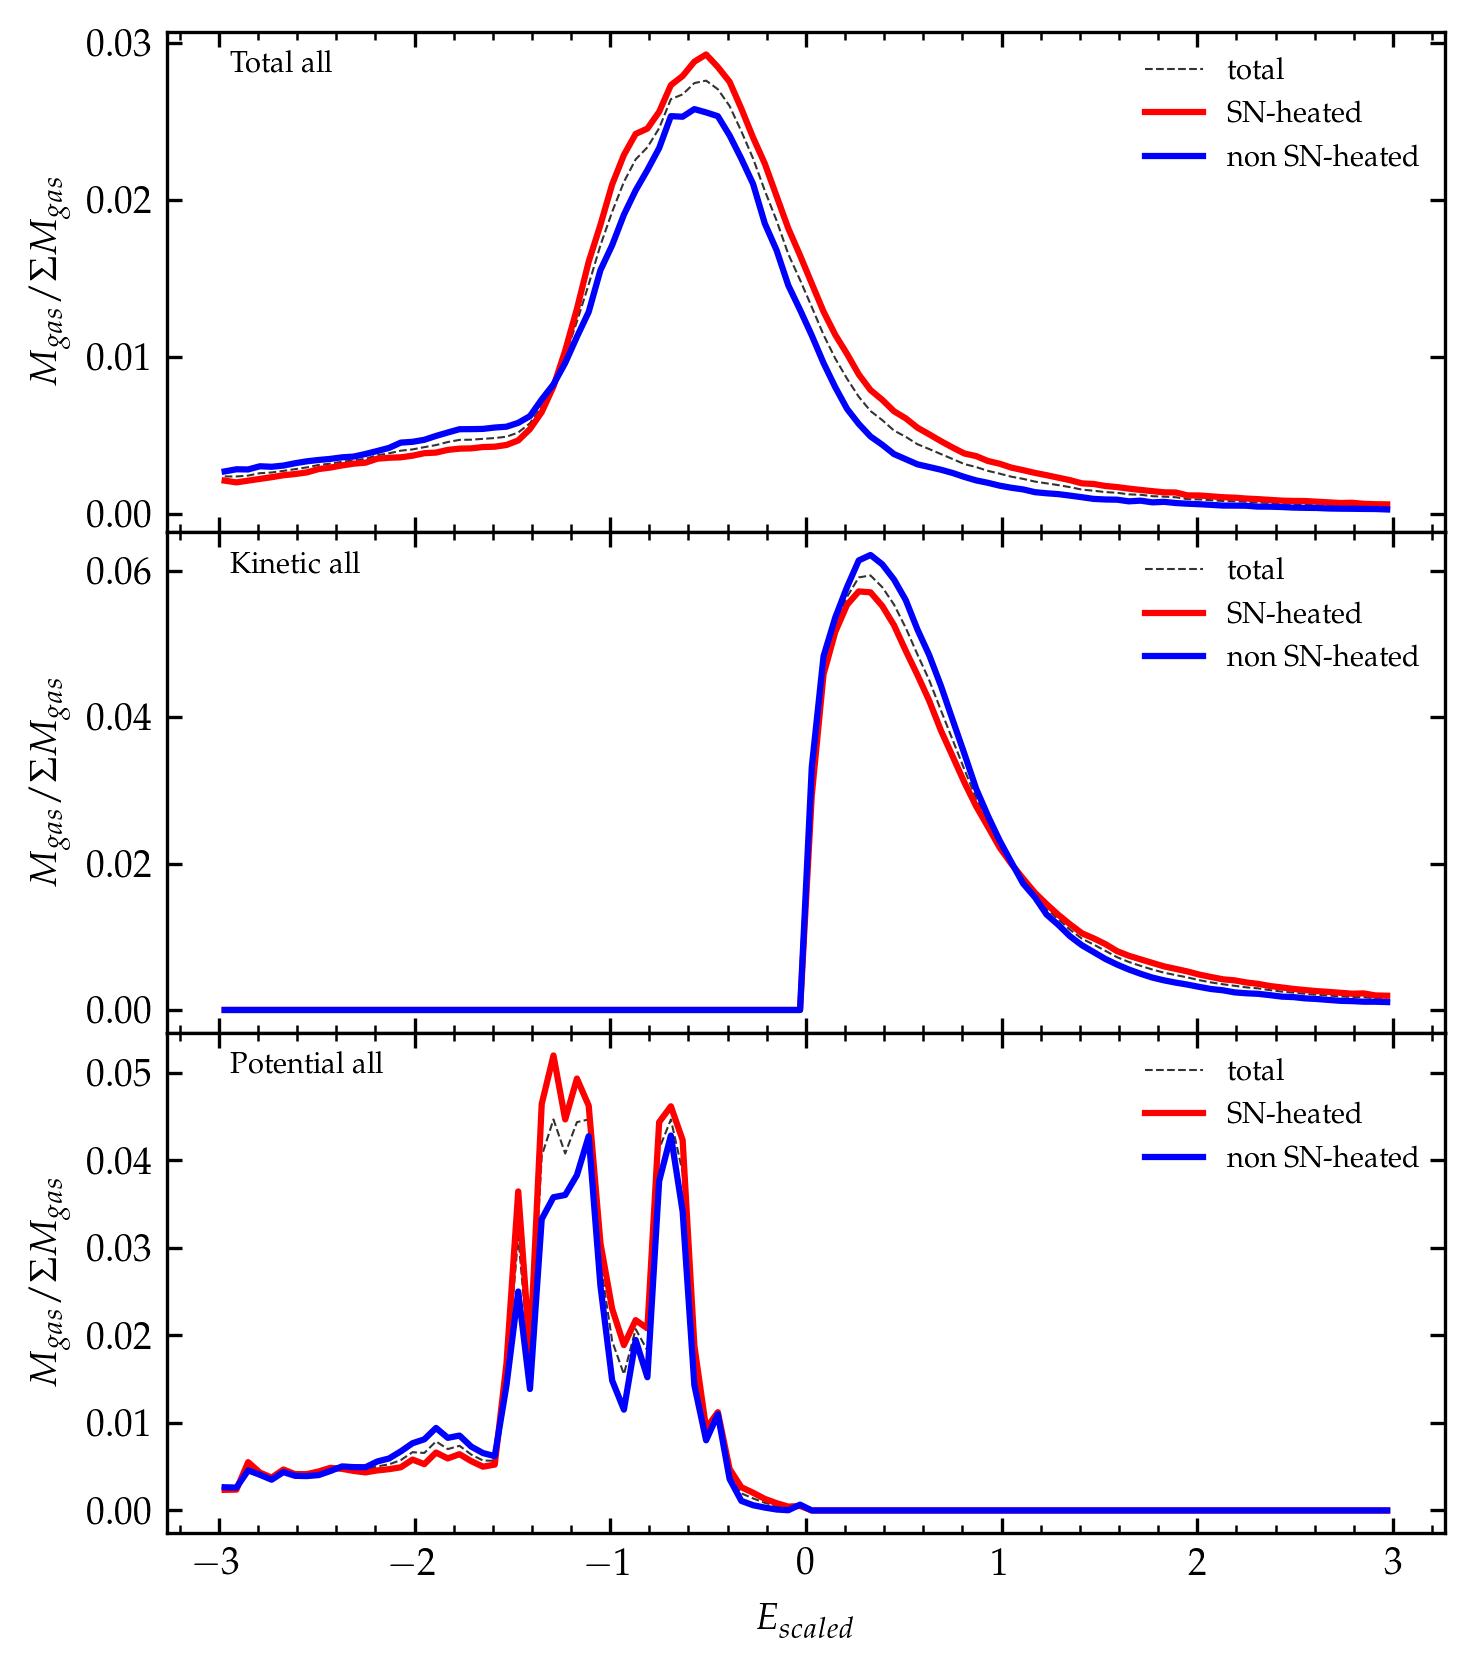

Program finished execution:  22.01137089729309  s


In [15]:
#run the plotting functions
import time
start = time.time()
plotting(discharged_massive, heated_massive, nonheated_massive, 'massive')
plotting(discharged_intermediate, heated_intermediate, nonheated_intermediate, 'intermediate')
plotting(discharged_small, heated_small, nonheated_small, 'small')
plotting(discharged_concat, heated_concat, nonheated_concat, 'all')
end = time.time()
print("Program finished execution: ", end - start, " s")

Found the halo information
> Returning <NFW outputs> for h148 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <


100%|███████████████████████████████████████████| 20/20 [13:55<00:00, 41.78s/it]


> Returning <energy results> for h148_10 <


100%|███████████████████████████████████████████| 20/20 [03:01<00:00,  9.07s/it]


> Returning <energy results> for h148_10 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_12 <


100%|███████████████████████████████████████████| 18/18 [00:33<00:00,  1.84s/it]


> Returning <energy results> for h148_12 <


100%|███████████████████████████████████████████| 18/18 [00:19<00:00,  1.09s/it]


> Returning <energy results> for h148_12 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_2 <


100%|████████████████████████████████████████| 11/11 [1:37:23<00:00, 531.24s/it]


> Returning <energy results> for h148_2 <


100%|███████████████████████████████████████████| 11/11 [15:51<00:00, 86.50s/it]


> Returning <energy results> for h148_2 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_249 <


100%|███████████████████████████████████████████| 10/10 [00:25<00:00,  2.50s/it]


> Returning <energy results> for h148_249 <


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


> Returning <energy results> for h148_249 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_251 <


100%|█████████████████████████████████████████████| 6/6 [00:16<00:00,  2.77s/it]


> Returning <energy results> for h148_251 <


100%|█████████████████████████████████████████████| 6/6 [00:12<00:00,  2.15s/it]


> Returning <energy results> for h148_251 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_27 <


100%|███████████████████████████████████████████| 23/23 [05:25<00:00, 14.17s/it]


> Returning <energy results> for h148_27 <


100%|███████████████████████████████████████████| 23/23 [02:21<00:00,  6.17s/it]


> Returning <energy results> for h148_27 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_282 <


100%|█████████████████████████████████████████████| 5/5 [00:17<00:00,  3.49s/it]


> Returning <energy results> for h148_282 <


100%|█████████████████████████████████████████████| 5/5 [00:15<00:00,  3.18s/it]


> Returning <energy results> for h148_282 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_3 <


100%|████████████████████████████████████████| 16/16 [1:10:07<00:00, 262.96s/it]


> Returning <energy results> for h148_3 <


100%|███████████████████████████████████████████| 16/16 [10:39<00:00, 39.98s/it]


> Returning <energy results> for h148_3 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_34 <


100%|███████████████████████████████████████████| 16/16 [00:58<00:00,  3.67s/it]


> Returning <energy results> for h148_34 <


100%|███████████████████████████████████████████| 16/16 [00:30<00:00,  1.90s/it]


> Returning <energy results> for h148_34 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_38 <


100%|███████████████████████████████████████████| 18/18 [00:47<00:00,  2.64s/it]


> Returning <energy results> for h148_38 <


100%|███████████████████████████████████████████| 18/18 [00:25<00:00,  1.40s/it]


> Returning <energy results> for h148_38 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_4 <


100%|███████████████████████████████████████████| 14/14 [12:28<00:00, 53.47s/it]


> Returning <energy results> for h148_4 <


100%|███████████████████████████████████████████| 14/14 [02:43<00:00, 11.65s/it]


> Returning <energy results> for h148_4 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_55 <


100%|███████████████████████████████████████████| 18/18 [00:52<00:00,  2.90s/it]


> Returning <energy results> for h148_55 <


100%|███████████████████████████████████████████| 18/18 [00:32<00:00,  1.82s/it]


> Returning <energy results> for h148_55 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_6 <


100%|███████████████████████████████████████████| 12/12 [10:14<00:00, 51.20s/it]


> Returning <energy results> for h148_6 <


100%|███████████████████████████████████████████| 12/12 [02:30<00:00, 12.52s/it]


> Returning <energy results> for h148_6 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_65 <


100%|█████████████████████████████████████████████| 7/7 [00:21<00:00,  3.09s/it]


> Returning <energy results> for h148_65 <


100%|█████████████████████████████████████████████| 7/7 [00:17<00:00,  2.56s/it]


> Returning <energy results> for h148_65 <
Found the halo information
> Returning <NFW outputs> for h229 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_14 <


100%|███████████████████████████████████████████| 25/25 [00:45<00:00,  1.83s/it]


> Returning <energy results> for h229_14 <


100%|███████████████████████████████████████████| 25/25 [00:20<00:00,  1.20it/s]


> Returning <energy results> for h229_14 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_18 <


100%|███████████████████████████████████████████| 27/27 [01:30<00:00,  3.36s/it]


> Returning <energy results> for h229_18 <


100%|███████████████████████████████████████████| 27/27 [00:43<00:00,  1.60s/it]


> Returning <energy results> for h229_18 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_20 <


100%|███████████████████████████████████████████| 18/18 [00:10<00:00,  1.65it/s]


> Returning <energy results> for h229_20 <


100%|███████████████████████████████████████████| 17/17 [00:06<00:00,  2.61it/s]


> Returning <energy results> for h229_20 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_22 <


100%|███████████████████████████████████████████| 15/15 [00:08<00:00,  1.71it/s]


> Returning <energy results> for h229_22 <


100%|███████████████████████████████████████████| 15/15 [00:05<00:00,  2.99it/s]


> Returning <energy results> for h229_22 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_49 <


100%|███████████████████████████████████████████| 14/14 [00:16<00:00,  1.20s/it]


> Returning <energy results> for h229_49 <


100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.58it/s]


> Returning <energy results> for h229_49 <
Found the halo information
> Returning <NFW outputs> for h242 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_10 <


100%|███████████████████████████████████████████| 36/36 [53:37<00:00, 89.39s/it]


> Returning <energy results> for h242_10 <


100%|███████████████████████████████████████████| 36/36 [12:58<00:00, 21.63s/it]


> Returning <energy results> for h242_10 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_21 <


100%|███████████████████████████████████████████| 25/25 [00:50<00:00,  2.03s/it]


> Returning <energy results> for h242_21 <


100%|███████████████████████████████████████████| 25/25 [00:24<00:00,  1.04it/s]


> Returning <energy results> for h242_21 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_30 <


100%|█████████████████████████████████████████████| 8/8 [00:13<00:00,  1.67s/it]


> Returning <energy results> for h242_30 <


100%|█████████████████████████████████████████████| 8/8 [00:09<00:00,  1.22s/it]


> Returning <energy results> for h242_30 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_38 <


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.78it/s]


> Returning <energy results> for h242_38 <


100%|███████████████████████████████████████████| 10/10 [00:03<00:00,  2.81it/s]


> Returning <energy results> for h242_38 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_69 <


100%|███████████████████████████████████████████| 23/23 [01:16<00:00,  3.34s/it]


> Returning <energy results> for h242_69 <


100%|███████████████████████████████████████████| 23/23 [00:29<00:00,  1.26s/it]


> Returning <energy results> for h242_69 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_8 <


100%|████████████████████████████████████████| 36/36 [1:28:56<00:00, 148.23s/it]


> Returning <energy results> for h242_8 <


100%|███████████████████████████████████████████| 36/36 [10:32<00:00, 17.57s/it]


> Returning <energy results> for h242_8 <
Found the halo information
> Returning <NFW outputs> for h329 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_117 <


100%|█████████████████████████████████████████████| 7/7 [00:07<00:00,  1.03s/it]


> Returning <energy results> for h329_117 <


100%|█████████████████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


> Returning <energy results> for h329_117 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_29 <


100%|█████████████████████████████████████████████| 8/8 [00:09<00:00,  1.15s/it]


> Returning <energy results> for h329_29 <


100%|█████████████████████████████████████████████| 8/8 [00:06<00:00,  1.16it/s]


> Returning <energy results> for h329_29 <
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_7 <


100%|█████████████████████████████████████████████| 9/9 [00:43<00:00,  4.87s/it]


> Returning <energy results> for h329_7 <


100%|█████████████████████████████████████████████| 9/9 [00:20<00:00,  2.31s/it]


> Returning <energy results> for h329_7 <


/tmp/ipykernel_27283/430338536.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')
/tmp/ipykernel_27283/430338536.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')


<Figure size 1280x960 with 0 Axes>

/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


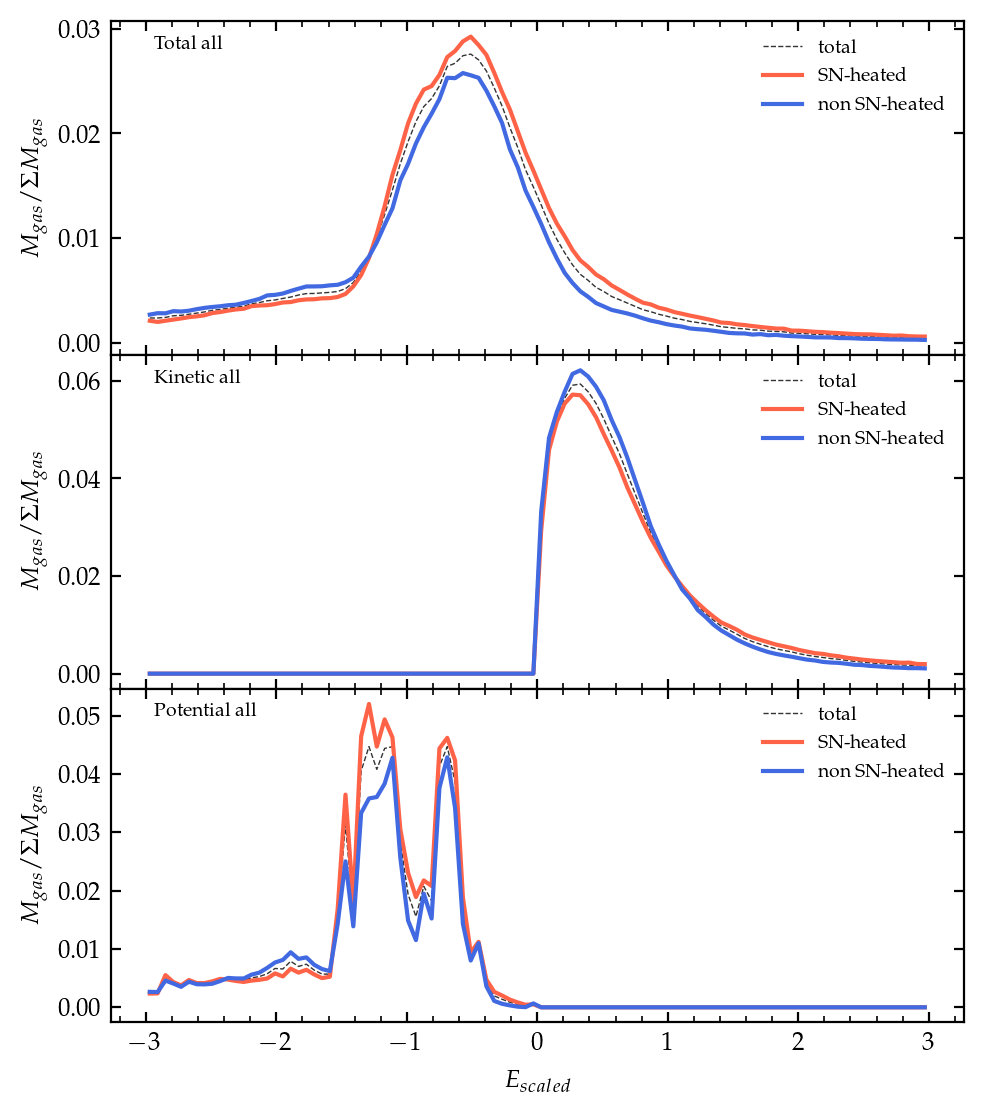

/tmp/ipykernel_27283/430338536.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')
/tmp/ipykernel_27283/430338536.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'plots/{dataname}_all_energy_distribution.pdf')


<Figure size 1280x960 with 0 Axes>

/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
# 7/28
# Plot again for all discharged, and expelled gas
import time
start = time.time()

sims = ['h148', 'h229', 'h242', 'h329']
#initialize
discharged_concat,heated_concat,nonheated_concat = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
expelled_concat,expheated_concat,expnonheated_concat = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

for sim in sims:
    #read variables for NFW profile
    halo_info = read_nfw_info(sim,filenames[sim])
    
    if sim == 'h148':
        keys = ['h148_10', 'h148_12', 'h148_2', 'h148_249', 'h148_251', 'h148_27', 'h148_282', 'h148_3', 'h148_34', 'h148_38', 'h148_4', 'h148_55',
        'h148_6', 'h148_65']
    if sim == 'h229':
        keys = ['h229_14', 'h229_18', 'h229_20', 'h229_22', 'h229_49']
    elif sim == 'h242':
        keys = ['h242_10', 'h242_21', 'h242_30', 'h242_38', 'h242_69', 'h242_8']
    elif sim == 'h329':
        keys = ['h329_117', 'h329_29', 'h329_7']
    
    for key in keys:
        #find discharged and expelled gas particle and calculate its energy
        _, discharged = read_one_discharged(key)
        _, expelled = read_one_expelled(key)
        discharged_calc = calc_discharged_energy(key, discharged, halo_info)
        expelled_calc = calc_discharged_energy(key, expelled, halo_info)
        
        #classify by SN-heated status
        heated = discharged_calc[discharged_calc.snHeated == True]
        nonheated = discharged_calc[discharged_calc.snHeated == False]
        expheated = expelled_calc[expelled_calc.snHeated == True]
        expnonheated = expelled_calc[expelled_calc.snHeated == False]

        #Data frame concat for plotting discharged gas
        discharged_concat = pd.concat([discharged_concat, discharged_calc])
        heated_concat = pd.concat([heated_concat, heated])
        nonheated_concat = pd.concat([nonheated_concat, nonheated])
        
        #Data frame concat for plotting expelled gas
        expelled_concat = pd.concat([expelled_concat, expelled_calc])
        expheated_concat = pd.concat([expheated_concat, expheated])
        expnonheated_concat = pd.concat([expnonheated_concat, expnonheated])
   
#make plots
plotting(discharged_concat, heated_concat, nonheated_concat, 'all', 'tomato', 'royalblue')
plotting(expelled_concat, expheated_concat, expnonheated_concat, 'exp', 'darkorange', 'mediumseagreen')

end = time.time()
print("Program finished execution: ", end - start, " s")

Note to myself: do this for expelled gas

## Tracking the discharged gas for longer span
### What is expelled, how to calculate
Discharged particle is reaccreted if there is any instance of accretion after discharging event.
Discharegd particle is expelled if there is no instance of reaccretion after the discharging.
There are two cases of expelled gas. One is discharged gas that are never reaccreted. Another is discharged gas that were reaccreted but ended up being permanently discharged at the last snapshot. Both are considered expelled gas and the calculation was conducted in function called calc_expelled, under the section of `Run for expelled gas, and SN-heated gas` in ```infallinganalysis.ipynb```. This section is a follow-up from that section chronologically, and I know that its been a struggle for me to divide my work into infall-related and particle-tracking-related.

In [17]:
from infallinganalysis import *

In [48]:
key = 'h148_10'
predischarged, discharged = read_one_discharged(key)
accreted, reaccreted = read_one_accreted(key)

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <
> Returning (accreted, reaccreted) for satellite h148_10 <


In [52]:
pids = np.unique(discharged.pid)
N = 50 # number of particles to select
np.random.seed(100)
pids_sub = np.random.choice(pids, size=N)

for pid in pids_sub:
    dis = discharged[discharged.pid==pid]
    acc = accreted[accreted.pid==pid]
    
    dTime = np.asarray(dis.time)
    aTime = np.asarray(acc.time)
    
    print(pid, dTime, aTime, len(dis), len(acc))

15275630 [ 9.92197407 11.21491521] [ 8.60883073 10.76709966 13.36981712] 2 3
16639195 [12.93883674] [11.6458956  13.36981712] 1 2
11971078 [11.21491521 12.50785636] [10.76709966 12.07687598 13.36981712] 2 3
17397303 [9.06001331 9.92197407] [8.19805255 9.49099369] 2 2
11545553 [10.35295445 12.93883674] [ 9.06001331 10.76709966 13.36981712] 2 3
4863122 [11.21491521] [ 9.92197407 12.93883674] 1 2
13228122 [ 6.90511141  9.06001331 10.35295445 13.36981712] [ 8.19805255  9.49099369 12.93883674 13.8007975 ] 4 4
18692029 [12.93883674] [12.15095073] 1 1
13231107 [8.19805255] [7.76707217] 1 1
12230328 [10.35295445 12.15095073 12.93883674] [ 9.49099369 10.76709966 12.50785636 13.8007975 ] 3 4
11150772 [ 9.49099369 10.35295445 12.50785636] [ 8.19805255  9.92197407 11.21491521] 3 3
13263863 [11.21491521 13.36981712] [ 9.92197407 12.50785636 13.8007975 ] 2 3
11941807 [12.07687598] [11.6458956] 1 1
15660016 [8.19805255] [ 7.76707217 13.36981712] 1 2
11114675 [ 6.90511141  8.19805255  9.92197407 12.07

## What fraction of SN-heated gas is lost

In [19]:
sim = 'h148'
haloid = 10

particles = read_tracked_particles(sim, haloid)
particles.keys()

> Returning <tracked_particle> dataset <


Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'r_rel_host',
       'r_rel_host_per_Rvir', 'x_rel_host', 'y_rel_host', 'z_rel_host',
       'hostRvir', 'vx_rel_host', 'vy_rel_host', 'vz_rel_host', 'v_rel_host',
       'sat_Xc', 'sat_Yc', 'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc',
       'host_Yc', 'host_Zc', 'host_vx', 'host_vy', 'host_vz', 'sat_Mstar',
       'sat_Mgas', 'host_Mstar', 'host_Mgas', 'sat_r_half', 'sat_r_gas',
       'host_r_half', 'host_r_gas', 'in_sat', 'in_host', 'in_other_sat',
       'in_IGM', 'dt', 'r_gal', 'host_r_gal', 'sat_disk', 'sat_halo',
       'host_disk', 'host_halo', 'other_sat', 'IGM', 'sat_Mvir'],
      dtype='object')

In [27]:
#find sn-heated gas
befores = pd.DataFrame()
afters = pd.DataFrame()

pids = np.unique(particles.pid)
for pid in tqdm.tqdm(pids):
    par = particles[particles.pid==pid]

    sat_disk = np.array(par.sat_disk, dtype=bool)

    time = np.array(par.time, dtype=float)

    for i,t2 in enumerate(time[1:]):
            i += 1
            if sat_disk[i-1]:
                before = par[time==time[i-1]].copy()
                after = par[time==t2].copy()
                befores = pd.concat([befores, before])
                afters = pd.concat([afters, after])

heated = {'snHeated': ""} 
afters = afters.join(pd.DataFrame(columns=heated))

coolontime = np.asarray(afters.coolontime)
time = np.asarray(befores.time) # use predischarged to check SN-heating prior to discharge.
afters['snHeated'] = coolontime > time

100%|███████████████████████████████████| 89554/89554 [7:43:35<00:00,  3.22it/s]


In [28]:
#constrained definition of SN-heated gas
heated = afters[afters['snHeated']==True]
nonheated = afters[afters['snHeated']==False]

filepath = f'{rootPath}SNe-heated_Gas_Flow/SNeData/constrained_heated_particles.hdf5'
heated.to_hdf(filepath, key='h148_10')

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <


In [2]:
#from all SN-heated gas particles that have the chance to escape, find discharged gas
_, discharged = read_one_discharged('h148_10')

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <


In [3]:
#from all SN-heated discharged gas particles
#load expelled (permanently) particle dataframe here
preexpelled, expelled = read_one_expelled('h148_10')

In [5]:
heated = pd.read_hdf(f'{rootPath}SNe-heated_Gas_Flow/SNeData/constrained_heated_particles.hdf5')

In [4]:
# quick calc. for ubiquitous weights in plotting.
@pynbody.derived_array
def wt(*gas):
    if len(gas) == 1:
        return np.array(gas[0]['mass'] / gas[0]['mass'].sum())
    
    else:
        return np.array(gas[0]['mass'] / gas[1]['mass'].sum())

/tmp/ipykernel_25086/2411957456.py:18: RuntimeWarning: invalid value encountered in scalar divide
  ratioDis = dist[i]/snt[i]
/tmp/ipykernel_25086/2411957456.py:19: RuntimeWarning: invalid value encountered in scalar divide
  ratioExp = expt[i]/snt[i]


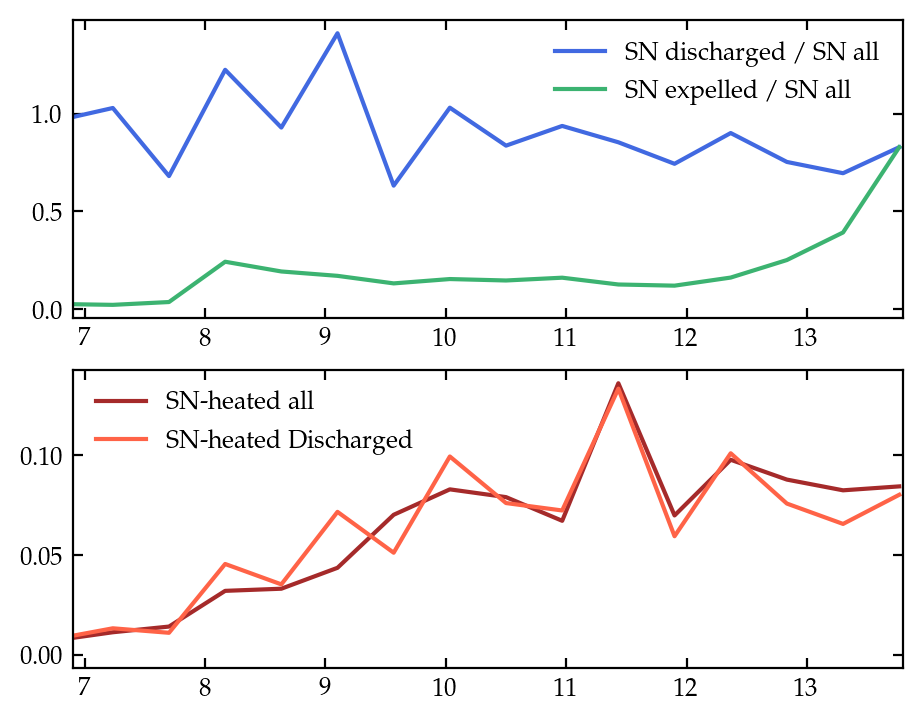

In [12]:
#fraction of discharged/expelled gas over all sn-heated gas, as a function of time and stellar mass size

bins = 30
rangeMax = 14
dist, x = np.histogram(discharged.time, bins=bins, range=(0,rangeMax))

# all expelled gas
expt, x = np.histogram(expelled.time, bins=bins, range=(0,rangeMax))

# all snheated gas
snt, x = np.histogram(heated.time, bins=bins, range=(0,rangeMax))

# computing fraction dist/snt at each radial position.
fracDis = np.array([])
fracExp = np.array([])

for i in range(0, bins):
    ratioDis = dist[i]/snt[i]
    ratioExp = expt[i]/snt[i]
    fracDis = np.append(fracDis,ratioDis)
    fracExp = np.append(fracExp,ratioExp)
    i += 1


fig, ax = plt.subplots(2,1,figsize = (4.5,3.5))
# fraction sne/all:
bincenters = 0.5*(x[1:] + x[:-1])
ax[0].plot(bincenters, fracDis, c = 'royalblue', label='SN discharged / SN all')
bincenters = 0.5*(x[1:] + x[:-1])
ax[0].plot(bincenters, fracExp, c = 'mediumseagreen', label='SN expelled / SN all')
ax[0].set_xlim(np.min(heated.time), np.max(heated.time))
ax[0].legend()

# mass distributions:
# all snheated gas
snt, x = np.histogram(heated.time, bins=bins, weights=wt(heated), range=(0,rangeMax))

sndischarged, x = np.histogram(discharged.time, bins=bins, weights=wt(discharged),range=(0,rangeMax))

bincenters = 0.5*(x[1:] + x[:-1])
ax[1].plot(bincenters, snt, label='SN-heated all', c='brown')
ax[1].plot(bincenters, sndischarged, label='SN-heated Discharged', c='tomato')
ax[1].set_xlim(np.min(heated.time), np.max(heated.time))
ax[1].legend()

On ```snheating.ipynb```, I calculated the same fraction of gas loss using a simplified method, which is coolontime > time without using for loops. It seems like this methd is accurate in calculating the fraction as well as a nice and fast computation. However, the sample size of this is way smaller than the method above. I go over with binning this in a function and seek any foundings for other satellites.

In [18]:
filepath = f'{rootPath}SNe-heated_Gas_Flow/SNeData/heated_all_particles.hdf5'
import h5py
with h5py.File(filepath) as data:
    print(len(data.keys()), 'Available keys:', *data.keys())

28 Available keys: h148_10 h148_12 h148_2 h148_249 h148_251 h148_27 h148_282 h148_3 h148_34 h148_38 h148_4 h148_55 h148_6 h148_65 h229_14 h229_18 h229_20 h229_22 h229_49 h242_10 h242_21 h242_30 h242_38 h242_69 h242_8 h329_117 h329_29 h329_7
